In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy. stats import mode
import numpy as np
from scipy import stats

In [228]:
# 한글깨짐 방지
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [3]:
path = "C:/Users/User/Tobigs/week1/EDA/data/"
data = pd.read_csv(path + "WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 결측치, 이상치 검토
##  1-1.결측치 확인

In [4]:
pd.DataFrame(data.isna().sum(), columns=['결측치 개수'])

결측치 개수
Age                            0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0

코드 상 결측치는 없음을 확인

In [5]:
# 1. 데이터프레임 head 확인
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Data Description 
Uncover the factors that lead to **employee attrition** and explore important questions such as ‘show me a breakdown of **distance from home** by **job role** and attrition’ or ‘**compare average monthly income by education and attrition**’. This is a fictional data set created by IBM data scientists.

**직원 감소**로 이어지는 요인을 파악하고 '**직업 역할** 및 **감소별 집과의 거리** 분석을 보여주십시오' 또는 '**교육 및 감소별 월평균 소득 비교**'와 같은 중요한 질문을 탐색합니다. 이것은 IBM 데이터 과학자들이 만든 가상의 데이터 세트입니다.


## 1-2. 이상치 검토

In [7]:
# 2. feature 종류
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 수치형변수 확인

In [80]:
category_feature = [ col for col in data.columns if data[col].dtypes == "object"]
#category_feature
numerical_feature = list(set(data.columns) - set(category_feature) - set(['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance','EmployeeNumber','PerformanceRating']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='<U23')

In [81]:
len(numerical_feature)

12

#### 1. 수치형변수 histogram 

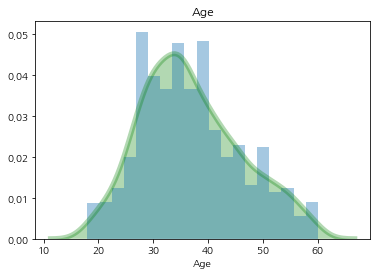

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


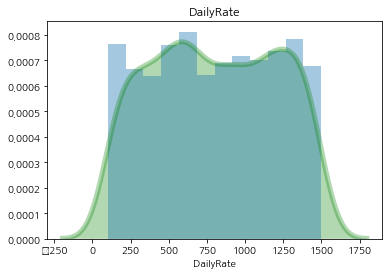

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


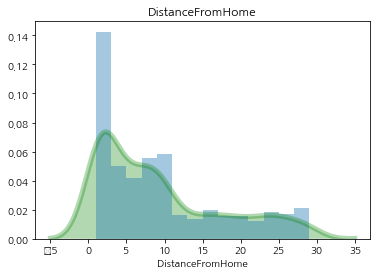

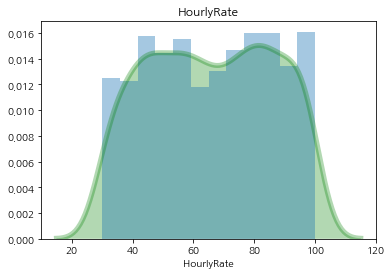

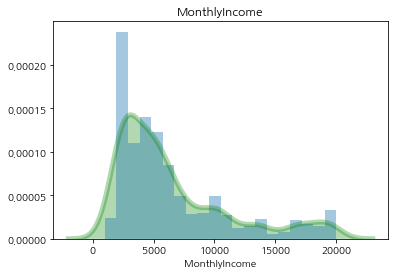

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


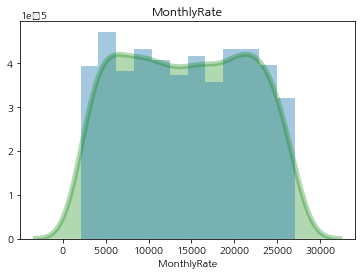

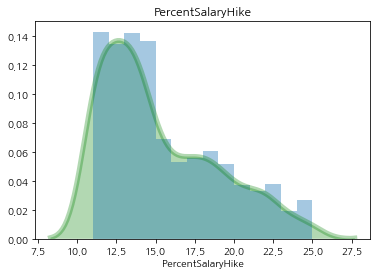

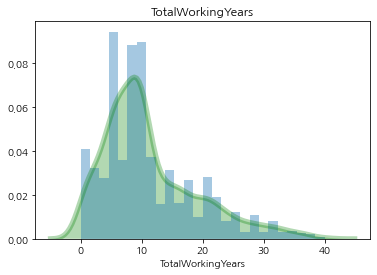

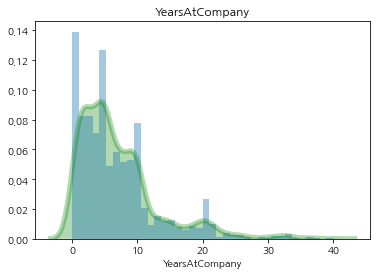

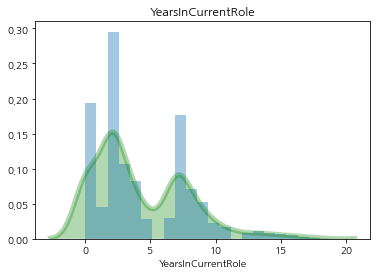

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


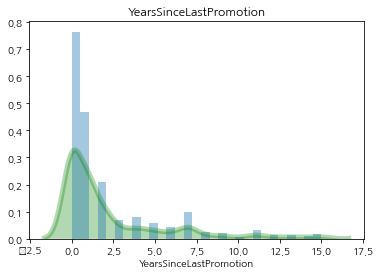

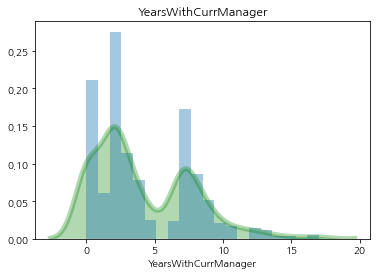

In [82]:
for i,col in enumerate(numerical_feature):
    sns.distplot(data.loc[data[col].notnull(), col], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("%s histogram"%col, fontsize=20)
    plt.title(col)
    plt.show()

#### 2. 수치형 변수 boxplot

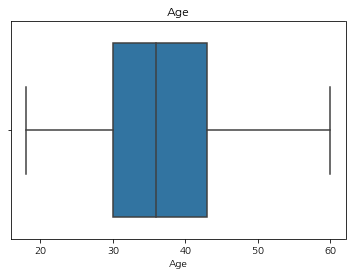

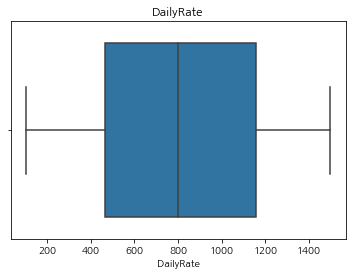

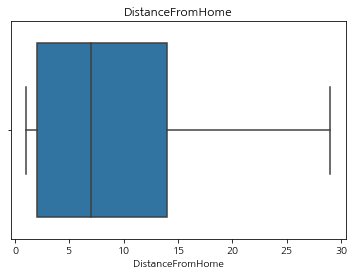

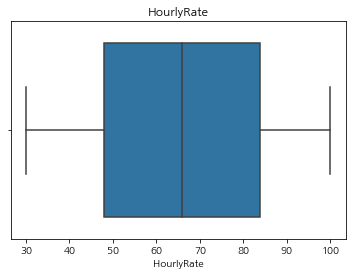

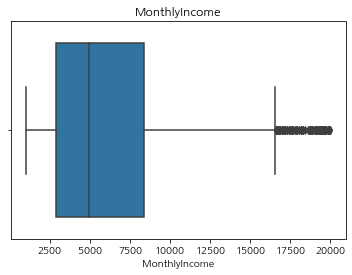

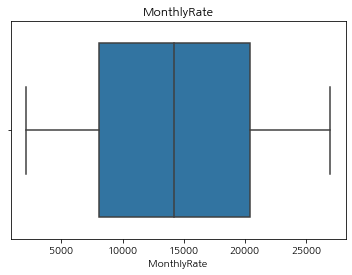

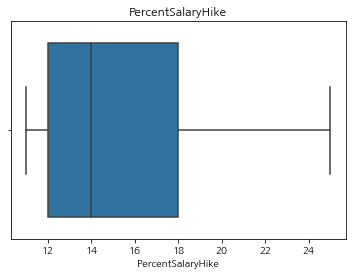

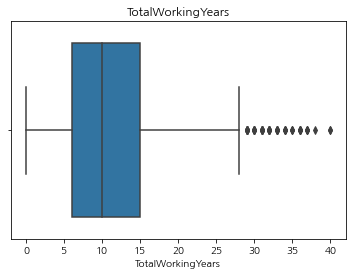

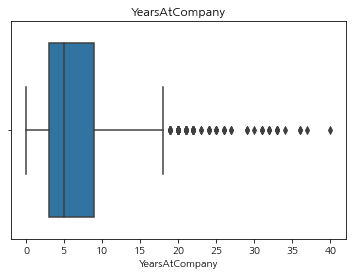

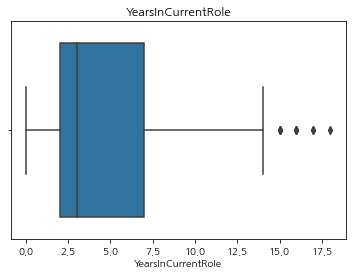

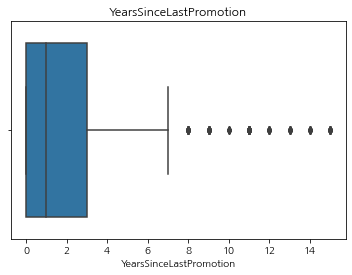

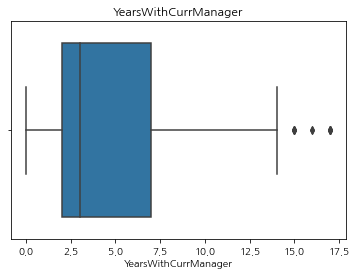

In [83]:
for i,col in enumerate(numerical_feature):
    sns.boxplot(data.loc[data[col].notnull(), col])
    plt.title("%s boxplot"%col, fontsize=20)
    plt.title(col)
    plt.show()

#### 3. 수치형 변수 이상치 검토
1. describe확인
2. 최빈값 확인
3. IQR 방식으로 이상치 확인
4. 표준점수로 변환 후 -3이하 +3 이상 확인
5. 기타(도메인) 지식을 적용하여 이상치 판단

##### 1) Age

In [21]:
# 1. describe 확인
pd.DataFrame(data['Age'].describe())

Age
count  1470.000000
mean     36.923810
std       9.135373
min      18.000000
25%      30.000000
50%      36.000000
75%      43.000000
max      60.000000

In [47]:
# 2. 최빈값 확인
pd.DataFrame(data['Age'].value_counts()).head(10)

Age
35   78
34   77
31   69
36   69
29   68
32   61
30   60
33   58
38   58
40   57

평균은 36.923810
중위수는 36
최빈값은 35임을 알 수 있었음.
range는 18~60세

In [51]:
data['Age'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    43.00
0.80    45.00
0.90    50.00
0.95    54.00
0.99    58.31
Name: Age, dtype: float64

In [54]:
# 3. IQR 방식으로 이상치 확인
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  13.0
Q1 - 1.5*IQR =  10.5
Q3 + 1.5*IQR =  62.5


Q3인 75%에 해당하는 값이 43이고, max가 60일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 45, 50, 54, 58.31이었다.

MAX 값마저 이상치 판단 기준 Q3 + 1.5*IQR 보다 작기 때문에 이상치는 존재하지 않음.
(나이 변수이니까 당연..)

결론 : 나이 범위가 18~60세인건 옳은 값이다.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


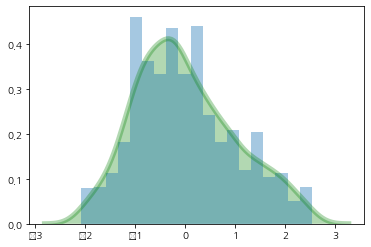

In [30]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['Age']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식과 표준점수 방식을 사용했을 때, 모두 이상치로 판단되는 값은 존재하지 않았다.<br>
또한 나이이기 때문에 18~60세의 값은 옳은 값이다.<br>
∴ 이상치 없음<br>

##### 2) DailyRate

In [32]:
# 1. describe 확인
pd.DataFrame(data['DailyRate'].describe())

DailyRate
count  1470.000000
mean    802.485714
std     403.509100
min     102.000000
25%     465.000000
50%     802.000000
75%    1157.000000
max    1499.000000

In [33]:
# 2. 최빈값 확인
pd.DataFrame(data['DailyRate'].value_counts()).head(10)

DailyRate
691           6
1082          5
329           5
1329          5
530           5
408           5
715           4
589           4
906           4
350           4

평균은 802.4857
중위수는 802
최빈값은 691임을 알 수 있었음(그러나 큰 의미는 X)
range는 102~1499

In [34]:
data['DailyRate'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    1157.0
0.80    1224.2
0.90    1356.0
0.95    1424.1
0.99    1485.0
Name: DailyRate, dtype: float64

In [35]:
# 3. IQR 방식으로 이상치 확인
q1 = data['DailyRate'].quantile(0.25)
q3 = data['DailyRate'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  692.0
Q1 - 1.5*IQR =  -573.0
Q3 + 1.5*IQR =  2195.0


Q3인 75%에 해당하는 값이 1157이고, max가 149일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 1224.2, 1356, 1424.1, 1485이었다.

MAX 값마저 이상치 판단 기준 Q3 + 1.5*IQR 보다 작기 때문에 이상치는 존재하지 않음.

DailyRate의 이상치는 존재하지 않음.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


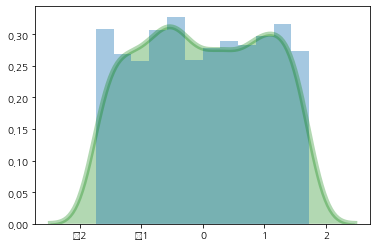

In [36]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['DailyRate']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식과 표준점수 방식을 사용했을 때, 모두 이상치로 판단되는 값은 존재하지 않았다.<br>
∴ 이상치 없음<br>

##### 3) DistanceFromHome

In [37]:
# 1. describe 확인
pd.DataFrame(data['DistanceFromHome'].describe())

DistanceFromHome
count       1470.000000
mean           9.192517
std            8.106864
min            1.000000
25%            2.000000
50%            7.000000
75%           14.000000
max           29.000000

In [38]:
# 2. 최빈값 확인
pd.DataFrame(data['DistanceFromHome'].value_counts()).head(10)

DistanceFromHome
2                211
1                208
10                86
9                 85
3                 84
7                 84
8                 80
5                 65
4                 64
6                 59

평균은 9.1925
중위수는 7
최빈값은 2임을 알 수 있었음(2와 1이 다른 값들보다 눈에띄게 많음.)
range는 1~29

In [39]:
data['DistanceFromHome'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    14.0
0.80    17.0
0.90    23.0
0.95    26.0
0.99    29.0
Name: DistanceFromHome, dtype: float64

In [40]:
# 3. IQR 방식으로 이상치 확인
q1 = data['DistanceFromHome'].quantile(0.25)
q3 = data['DistanceFromHome'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  12.0
Q1 - 1.5*IQR =  -16.0
Q3 + 1.5*IQR =  32.0


Q3인 75%에 해당하는 값이 14이고, max가 29일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 17, 23, 26, 29이었다.

MAX 값마저 이상치 판단 기준 Q3 + 1.5*IQR 보다 작기 때문에 이상치는 존재하지 않음.
MIN값도 이하 같음.

DistanceFromHome의 이상치는 존재하지 않음.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


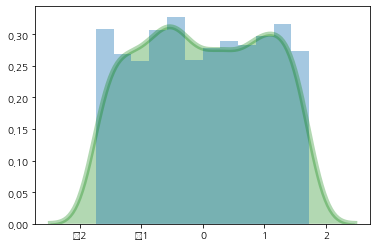

In [36]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['DailyRate']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식과 표준점수 방식을 사용했을 때, 모두 이상치로 판단되는 값은 존재하지 않았다.<br>
∴ 이상치 없음<br>

##### 4) HourlyRate

In [46]:
# 1. describe 확인
pd.DataFrame(data['HourlyRate'].describe())

HourlyRate
count  1470.000000
mean     65.891156
std      20.329428
min      30.000000
25%      48.000000
50%      66.000000
75%      83.750000
max     100.000000

In [47]:
# 2. 최빈값 확인
pd.DataFrame(data['HourlyRate'].value_counts()).head(10)

HourlyRate
66          29
42          28
98          28
48          28
84          28
79          27
96          27
57          27
52          26
87          26

평균은 65.8912
중위수는 66
최빈값은 66임을 알 수 있었음
range는 30~100

In [49]:
data['HourlyRate'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     83.75
0.80     87.00
0.90     94.00
0.95     97.00
0.99    100.00
Name: HourlyRate, dtype: float64

In [50]:
# 3. IQR 방식으로 이상치 확인
q1 = data['HourlyRate'].quantile(0.25)
q3 = data['HourlyRate'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  35.75
Q1 - 1.5*IQR =  -5.625
Q3 + 1.5*IQR =  137.375


Q3인 75%에 해당하는 값이 83.75이고, max가 100일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 87,94,97,100이었다.

MAX 값마저 이상치 판단 기준 Q3 + 1.5*IQR 보다 작기 때문에 이상치는 존재하지 않음.
MIN값도 이하 같음.

HourlyRate의 이상치는 존재하지 않음.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


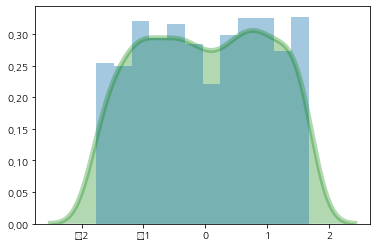

In [51]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['HourlyRate']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식과 표준점수 방식을 사용했을 때, 모두 이상치로 판단되는 값은 존재하지 않았다.<br>
∴ 이상치 없음<br>

##### 5) MonthlyIncome

In [52]:
# 1. describe 확인
pd.DataFrame(data['MonthlyIncome'].describe())

MonthlyIncome
count    1470.000000
mean     6502.931293
std      4707.956783
min      1009.000000
25%      2911.000000
50%      4919.000000
75%      8379.000000
max     19999.000000

In [53]:
# 2. 최빈값 확인
pd.DataFrame(data['MonthlyIncome'].value_counts()).head(10)

MonthlyIncome
2342              4
5562              3
2741              3
2451              3
2610              3
2380              3
6142              3
6347              3
2559              3
2404              3

평균은 6502.9313
중위수는 4919
최빈값은 2342임을 알 수 있었음(근데 크게 의미는 X)
range는 1009~19999

In [56]:
data['MonthlyIncome'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     8379.00
0.80     9860.00
0.90    13775.60
0.95    17821.35
0.99    19626.31
Name: MonthlyIncome, dtype: float64

In [57]:
# 3. IQR 방식으로 이상치 확인
q1 = data['MonthlyIncome'].quantile(0.25)
q3 = data['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  5468.0
Q1 - 1.5*IQR =  -5291.0
Q3 + 1.5*IQR =  16581.0


Q3인 75%에 해당하는 값이 8379이고, max가 19999일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 9860, 13775, 17821, 19626이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.

MonthlyIncome의 이상치는 존재한다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


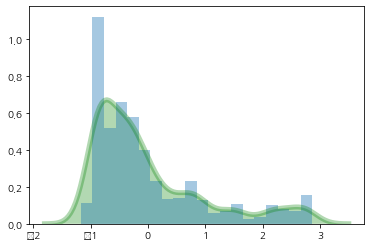

In [58]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['MonthlyIncome']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [61]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['MonthlyIncome'] > (q3 + 1.5*iqr))])

114

In [66]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['MonthlyIncome'])>=3)

0

IQR 방식과 표준점수 방식을 사용했을 때, IQR 방식에서 이상치가 있다고 판단되었다.
Q3 + 1.5*IQR보다 큰 이상치는 114개, 표준점수가 3보다 큰 이상치는 0개 존재했다.<br>
∴ 이상치 존재 가능성 있음<br>

##### 6) MonthlyRate

In [67]:
# 1. describe 확인
pd.DataFrame(data['MonthlyRate'].describe())

MonthlyRate
count   1470.000000
mean   14313.103401
std     7117.786044
min     2094.000000
25%     8047.000000
50%    14235.500000
75%    20461.500000
max    26999.000000

In [68]:
# 2. 최빈값 확인
pd.DataFrame(data['MonthlyRate'].value_counts()).head(10)

MonthlyRate
4223             3
9150             3
6670             2
7324             2
4658             2
21534            2
16154            2
13008            2
12355            2
6069             2

평균은 14313.1034
중위수는 14235.5
최빈값은 4223임을 알 수 있었음(의미는 X)
range는 2094~26999

In [69]:
data['MonthlyRate'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    20461.50
0.80    21712.00
0.90    24001.70
0.95    25431.90
0.99    26704.24
Name: MonthlyRate, dtype: float64

In [70]:
# 3. IQR 방식으로 이상치 확인
q1 = data['MonthlyRate'].quantile(0.25)
q3 = data['MonthlyRate'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  12414.5
Q1 - 1.5*IQR =  -10574.75
Q3 + 1.5*IQR =  39083.25


Q3인 75%에 해당하는 값이 20461.5이고, max가 26999일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 21712, 24001.7, 25431.9, 26704.24이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재하지 않음.
MIN일 경우도 이하 동일.

MonthlyRate의 이상치는 존재하지 않다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


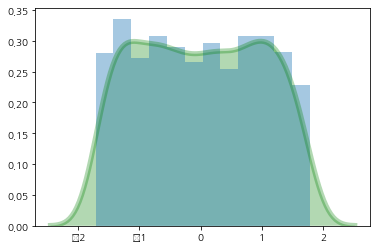

In [71]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['MonthlyRate']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식과 표준점수 방식을 사용했을 때, 모두 이상치로 판단되는 값은 존재하지 않았다.<br>
∴ 이상치 없음<br>

##### 7) PercentSalaryHike

In [72]:
# 1. describe 확인
pd.DataFrame(data['PercentSalaryHike'].describe())

PercentSalaryHike
count        1470.000000
mean           15.209524
std             3.659938
min            11.000000
25%            12.000000
50%            14.000000
75%            18.000000
max            25.000000

In [73]:
# 2. 최빈값 확인
pd.DataFrame(data['PercentSalaryHike'].value_counts()).head(10)

PercentSalaryHike
11                210
13                209
14                201
12                198
15                101
18                 89
17                 82
16                 78
19                 76
22                 56

평균은 15.2095
중위수는 14
최빈값은 11임을 알 수 있었음(그 다음으로 높은게 13,14,12로 차이는 별로 안남)
range는 11~25

In [74]:
data['PercentSalaryHike'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    18.0
0.80    19.0
0.90    21.0
0.95    22.0
0.99    25.0
Name: PercentSalaryHike, dtype: float64

In [75]:
# 3. IQR 방식으로 이상치 확인
q1 = data['PercentSalaryHike'].quantile(0.25)
q3 = data['PercentSalaryHike'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  6.0
Q1 - 1.5*IQR =  3.0
Q3 + 1.5*IQR =  27.0


Q3인 75%에 해당하는 값이 18이고, max가 25일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 19,21,22,25이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재하지 않음.
MIN일 경우도 이하 동일.

PercentSalaryHike의 이상치는 존재하지 않다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


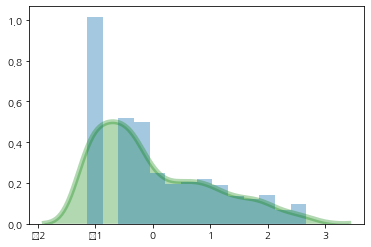

In [76]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['PercentSalaryHike']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

IQR 방식과 표준점수 방식을 사용했을 때, 모두 이상치로 판단되는 값은 존재하지 않았다.<br>
∴ 이상치 없음<br>

##### 8) TotalWorkingYears

In [84]:
# 1. describe 확인
pd.DataFrame(data['TotalWorkingYears'].describe())

TotalWorkingYears
count        1470.000000
mean           11.279592
std             7.780782
min             0.000000
25%             6.000000
50%            10.000000
75%            15.000000
max            40.000000

In [85]:
# 2. 최빈값 확인
pd.DataFrame(data['TotalWorkingYears'].value_counts()).head(10)

TotalWorkingYears
10                202
6                 125
8                 103
9                  96
5                  88
1                  81
7                  81
4                  63
12                 48
3                  42

평균은 11.2796
중위수는 10
최빈값은 10임을 알 수 있었음
range는 0~40

In [86]:
data['TotalWorkingYears'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    15.0
0.80    17.0
0.90    23.0
0.95    28.0
0.99    35.0
Name: TotalWorkingYears, dtype: float64

In [87]:
# 3. IQR 방식으로 이상치 확인
q1 = data['TotalWorkingYears'].quantile(0.25)
q3 = data['TotalWorkingYears'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  9.0
Q1 - 1.5*IQR =  -7.5
Q3 + 1.5*IQR =  28.5


Q3인 75%에 해당하는 값이 15이고, max가 40일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 17, 23, 28, 35이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.

TotalWorkingYears의 이상치는 존재한다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


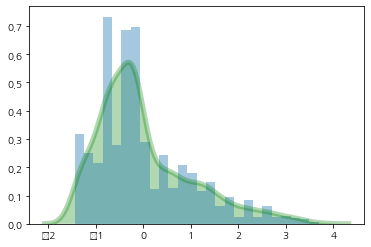

In [88]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['TotalWorkingYears']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [89]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['TotalWorkingYears'] > (q3 + 1.5*iqr))])

63

In [91]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['TotalWorkingYears'])>=3)

16

IQR 방식과 표준점수 방식을 사용했을 때, IQR, 표준점수 방식에서 이상치가 있다고 판단되었다.
Q3 + 1.5*IQR보다 큰 이상치는 63개, 표준점수가 3보다 큰 이상치는 16개 존재했다.<br>
∴ 이상치 존재함<br>

##### 9) YearsAtCompany

In [92]:
# 1. describe 확인
pd.DataFrame(data['YearsAtCompany'].describe())

YearsAtCompany
count     1470.000000
mean         7.008163
std          6.126525
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         40.000000

In [93]:
# 2. 최빈값 확인
pd.DataFrame(data['YearsAtCompany'].value_counts()).head(10)

YearsAtCompany
5              196
1              171
3              128
2              127
10             120
4              110
7               90
9               82
8               80
6               76

평균은 7.0082
중위수는 5
최빈값은 5임을 알 수 있었음
range는 0~40

In [94]:
data['YearsAtCompany'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     9.0
0.80    10.0
0.90    15.0
0.95    20.0
0.99    31.0
Name: YearsAtCompany, dtype: float64

In [95]:
# 3. IQR 방식으로 이상치 확인
q1 = data['YearsAtCompany'].quantile(0.25)
q3 = data['YearsAtCompany'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  6.0
Q1 - 1.5*IQR =  -6.0
Q3 + 1.5*IQR =  18.0


Q3인 75%에 해당하는 값이 9이고, max가 40일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 10, 15, 20, 31이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.

YearsAtCompany의 이상치는 존재한다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


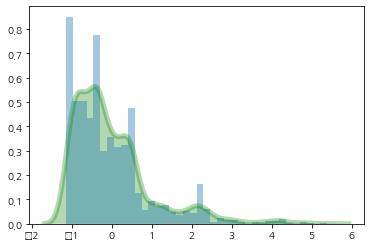

In [96]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['YearsAtCompany']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [97]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['YearsAtCompany'] > (q3 + 1.5*iqr))])

104

In [98]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['YearsAtCompany'])>=3)

25

IQR 방식과 표준점수 방식을 사용했을 때, IQR, 표준점수 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 104개, 표준점수가 3보다 큰 이상치는 25개 존재했다.<br>
∴ 이상치 존재함<br>

##### 10) YearsInCurrentRole

In [99]:
# 1. describe 확인
pd.DataFrame(data['YearsInCurrentRole'].describe())

YearsInCurrentRole
count         1470.000000
mean             4.229252
std              3.623137
min              0.000000
25%              2.000000
50%              3.000000
75%              7.000000
max             18.000000

In [100]:
# 2. 최빈값 확인
pd.DataFrame(data['YearsInCurrentRole'].value_counts()).head(10)

YearsInCurrentRole
2                 372
0                 244
7                 222
3                 135
4                 104
8                  89
9                  67
1                  57
6                  37
5                  36

평균은 4.2293
중위수는 3
최빈값은 2임을 알 수 있었음
range는 0~18

In [103]:
data['YearsInCurrentRole'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     7.0
0.80     7.0
0.90     9.0
0.95    11.0
0.99    15.0
Name: YearsInCurrentRole, dtype: float64

In [104]:
# 3. IQR 방식으로 이상치 확인
q1 = data['YearsInCurrentRole'].quantile(0.25)
q3 = data['YearsInCurrentRole'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  5.0
Q1 - 1.5*IQR =  -5.5
Q3 + 1.5*IQR =  14.5


Q3인 75%에 해당하는 값이 7이고, max가 18일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 7, 9, 11, 15이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.
(99% 값이 Q3 + 1.5*IQR 보다 큼)

YearsInCurrentRole의 이상치는 존재한다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


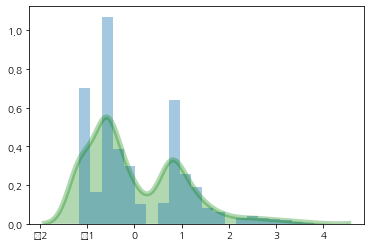

In [105]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['YearsInCurrentRole']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [106]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['YearsInCurrentRole'] > (q3 + 1.5*iqr))])

21

In [107]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['YearsInCurrentRole'])>=3)

13

IQR 방식과 표준점수 방식을 사용했을 때, IQR,표준점수 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 21개, 표준점수가 3보다 큰 이상치는 13개 존재했다.<br>
∴ 이상치 존재함<br>

##### 11) YearsSinceLastPromotion

In [108]:
# 1. describe 확인
pd.DataFrame(data['YearsSinceLastPromotion'].describe())

YearsSinceLastPromotion
count              1470.000000
mean                  2.187755
std                   3.222430
min                   0.000000
25%                   0.000000
50%                   1.000000
75%                   3.000000
max                  15.000000

In [109]:
# 2. 최빈값 확인
pd.DataFrame(data['YearsSinceLastPromotion'].value_counts()).head(10)

YearsSinceLastPromotion
0                       581
1                       357
2                       159
7                        76
4                        61
3                        52
5                        45
6                        32
11                       24
8                        18

평균은 2.1878
중위수는 1
최빈값은 0임을 알 수 있었음
range는 0~15

In [110]:
data['YearsSinceLastPromotion'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     3.0
0.80     4.0
0.90     7.0
0.95     9.0
0.99    14.0
Name: YearsSinceLastPromotion, dtype: float64

In [111]:
# 3. IQR 방식으로 이상치 확인
q1 = data['YearsSinceLastPromotion'].quantile(0.25)
q3 = data['YearsSinceLastPromotion'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  3.0
Q1 - 1.5*IQR =  -4.5
Q3 + 1.5*IQR =  7.5


Q3인 75%에 해당하는 값이 3이고, max가 15일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 4, 7, 9, 14이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.
(95% 값이 Q3 + 1.5*IQR 보다 큼)

YearsSinceLastPromotion의 이상치는 존재한다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


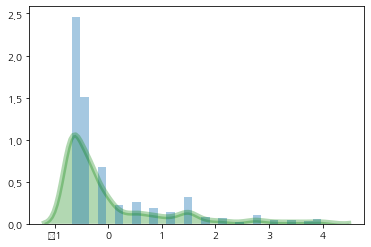

In [112]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['YearsSinceLastPromotion']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [113]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['YearsSinceLastPromotion'] > (q3 + 1.5*iqr))])

107

In [114]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['YearsSinceLastPromotion'])>=3)

42

IQR 방식과 표준점수 방식을 사용했을 때, IQR, 표준점수 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 107개, 표준점수가 3보다 큰 이상치는 42개 존재했다.<br>
∴ 이상치 존재함<br>

##### 12) YearsWithCurrManager

In [115]:
# 1. describe 확인
pd.DataFrame(data['YearsWithCurrManager'].describe())

YearsWithCurrManager
count           1470.000000
mean               4.123129
std                3.568136
min                0.000000
25%                2.000000
50%                3.000000
75%                7.000000
max               17.000000

In [116]:
# 2. 최빈값 확인
pd.DataFrame(data['YearsWithCurrManager'].value_counts()).head(10)

YearsWithCurrManager
2                   344
0                   263
7                   216
3                   142
8                   107
4                    98
1                    76
9                    64
5                    31
6                    29

평균은 4.1231
중위수는 3
최빈값은 2임을 알 수 있었음
range는 0~17

In [117]:
data['YearsWithCurrManager'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75     7.0
0.80     7.0
0.90     9.0
0.95    10.0
0.99    14.0
Name: YearsWithCurrManager, dtype: float64

In [118]:
# 3. IQR 방식으로 이상치 확인
q1 = data['YearsWithCurrManager'].quantile(0.25)
q3 = data['YearsWithCurrManager'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  5.0
Q1 - 1.5*IQR =  -5.5
Q3 + 1.5*IQR =  14.5


Q3인 75%에 해당하는 값이 7이고, max가 17일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 7, 9, 10, 14이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.

YearsWithCurrManager의 이상치는 존재한다고 판단됨.

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


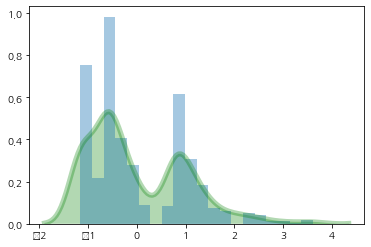

In [119]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['YearsWithCurrManager']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [120]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['YearsWithCurrManager'] > (q3 + 1.5*iqr))])

14

In [121]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['YearsWithCurrManager'])>=3)

14

IQR 방식과 표준점수 방식을 사용했을 때, IQR, 표준점수 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 14개, 표준점수가 3보다 큰 이상치는 14개 존재했다.<br>
∴ 이상치 존재함<br>

### **이상치 존재하는 수치형 변수들**
MonthlyIncome, TotalWorkingYears, YearsAtCompany, 
YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

### 이산형변수 확인

In [122]:
discrete_feature = set(['Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance'])
discrete_feature

{'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance'}

#### 1. 이산형 변수 histogram

In [132]:
sns.set()

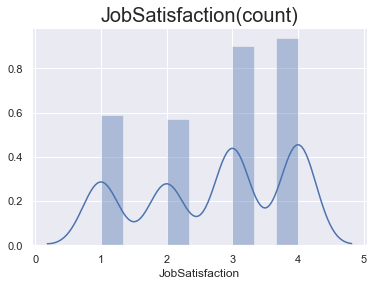

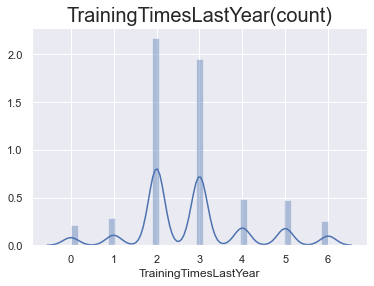

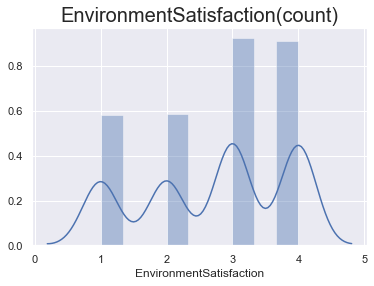

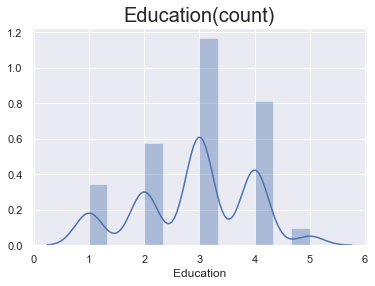

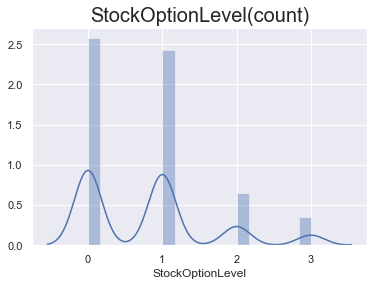

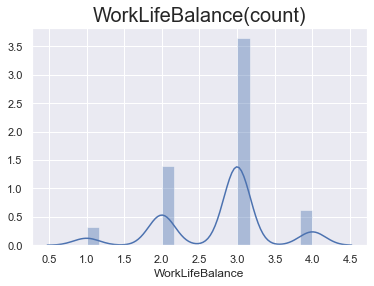

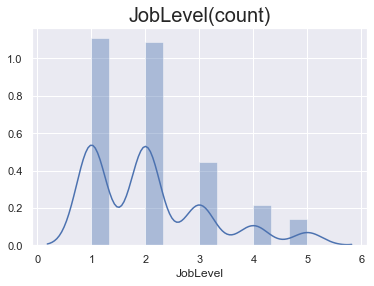

C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


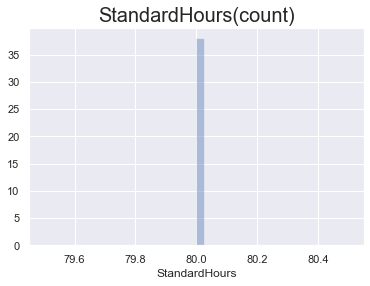

C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\DataScience\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


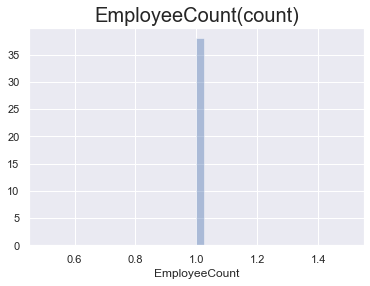

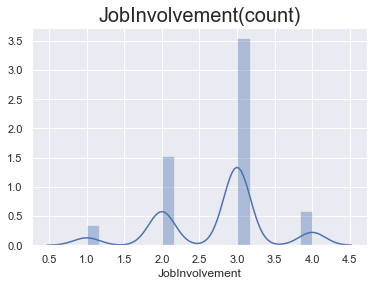

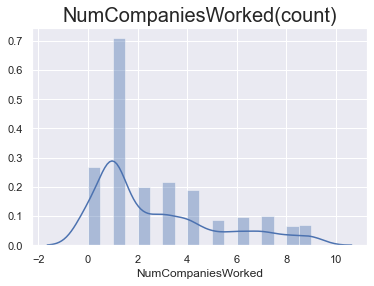

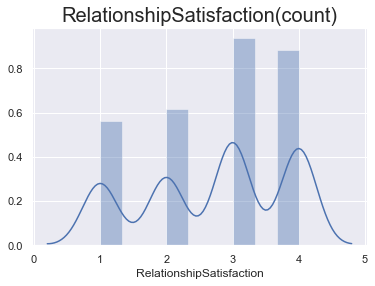

In [135]:
for i,col in enumerate(discrete_feature):
    sns.distplot(data.loc[data[col].notnull(), col])
    plt.title("%s(count)"%col, fontsize=20)
    plt.show()

#### 2. 이산형 변수 barplot

In [126]:
sns.set(font_scale = 5)

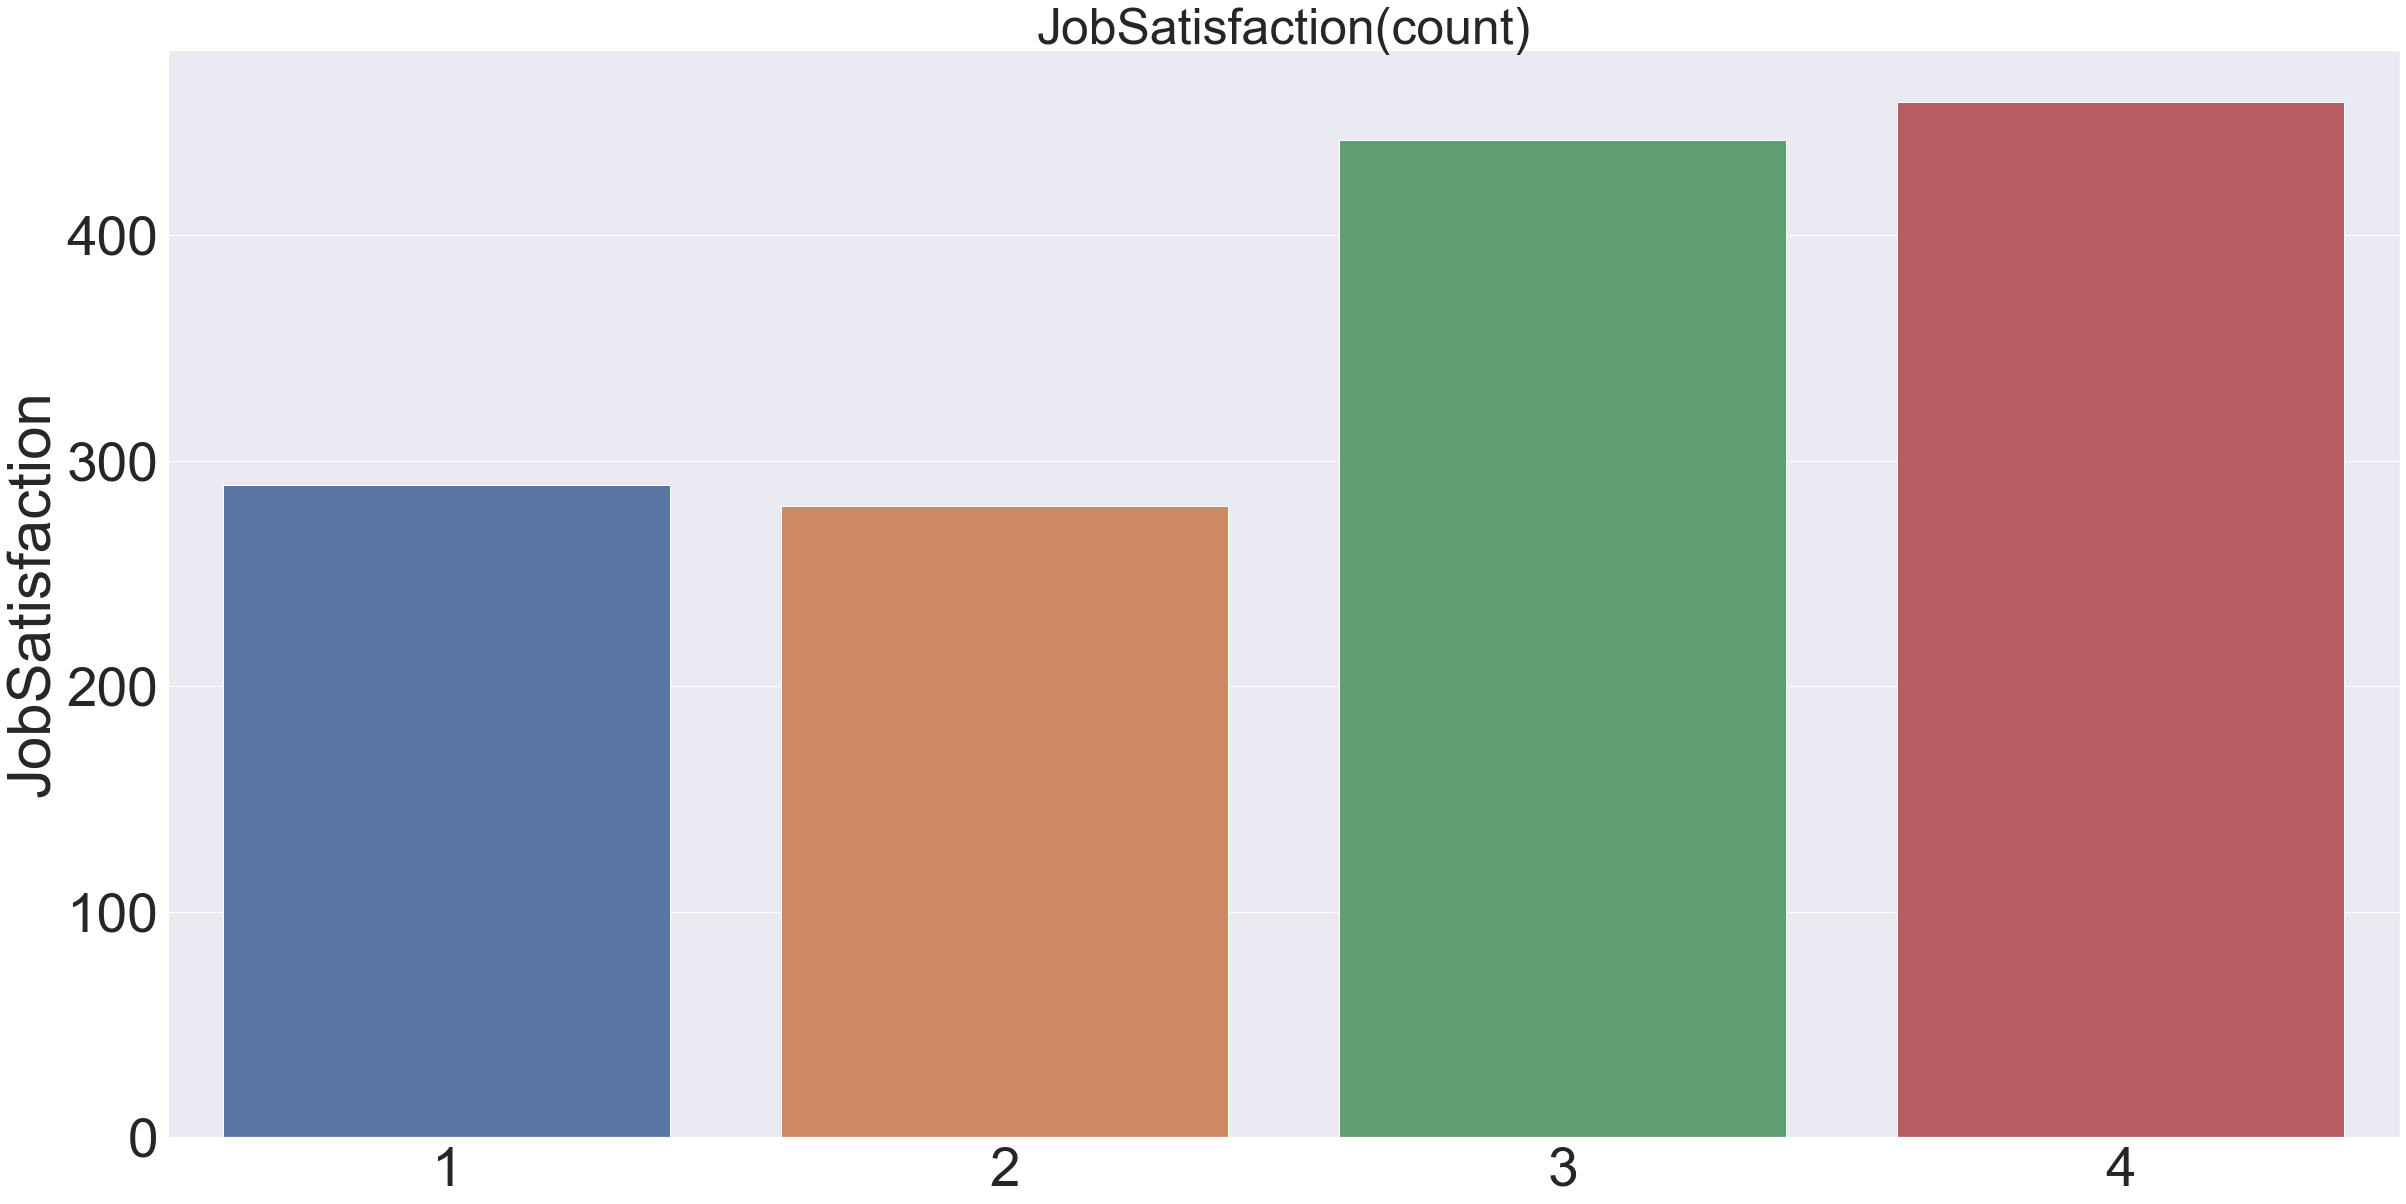

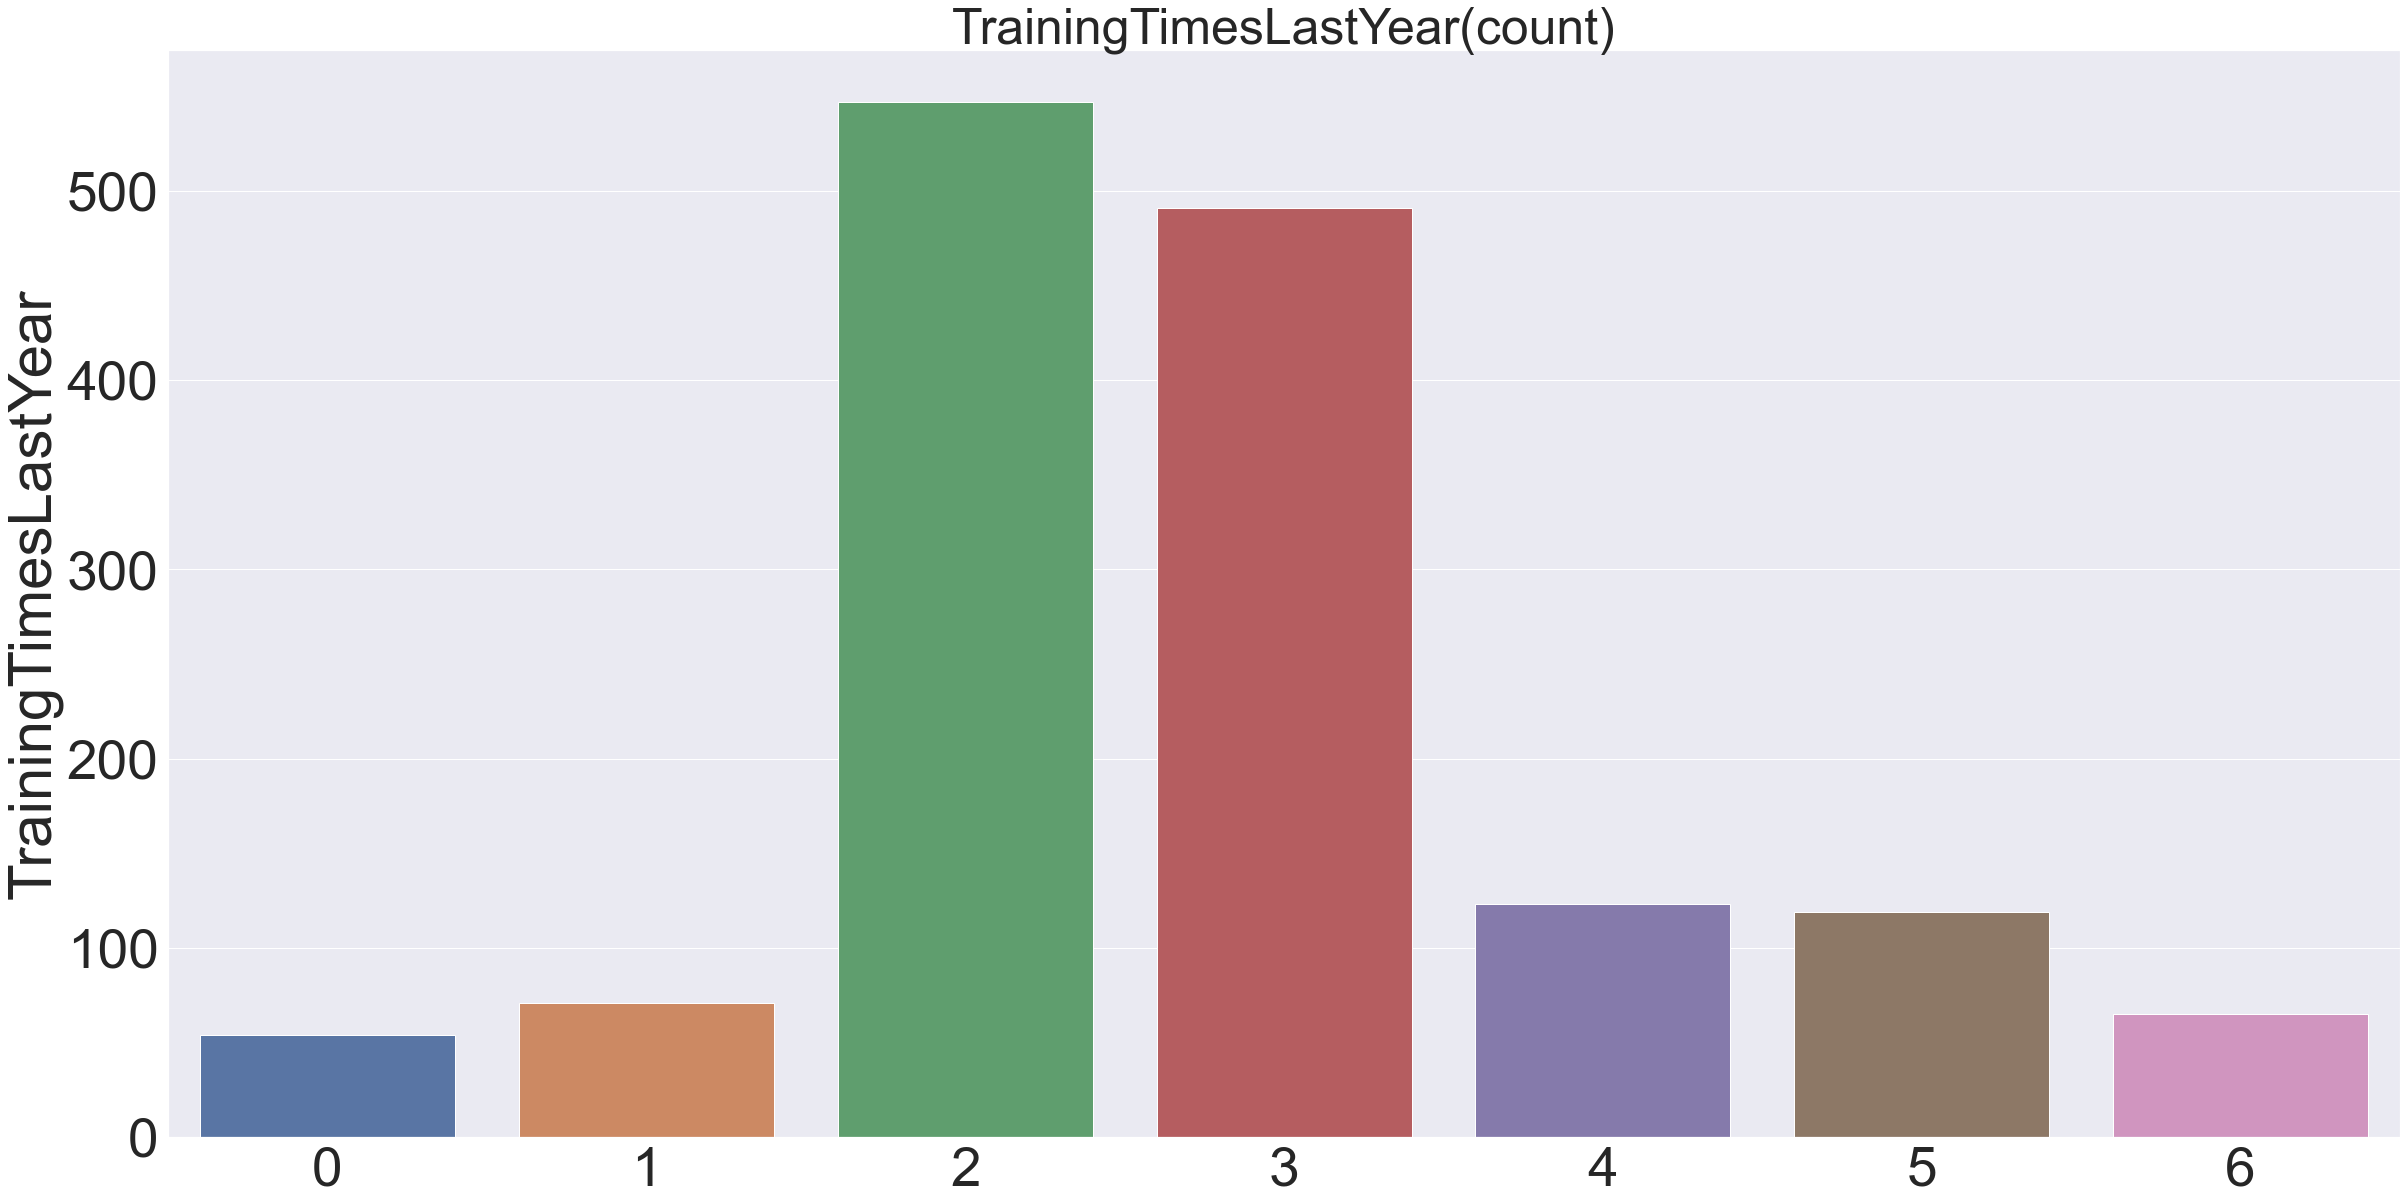

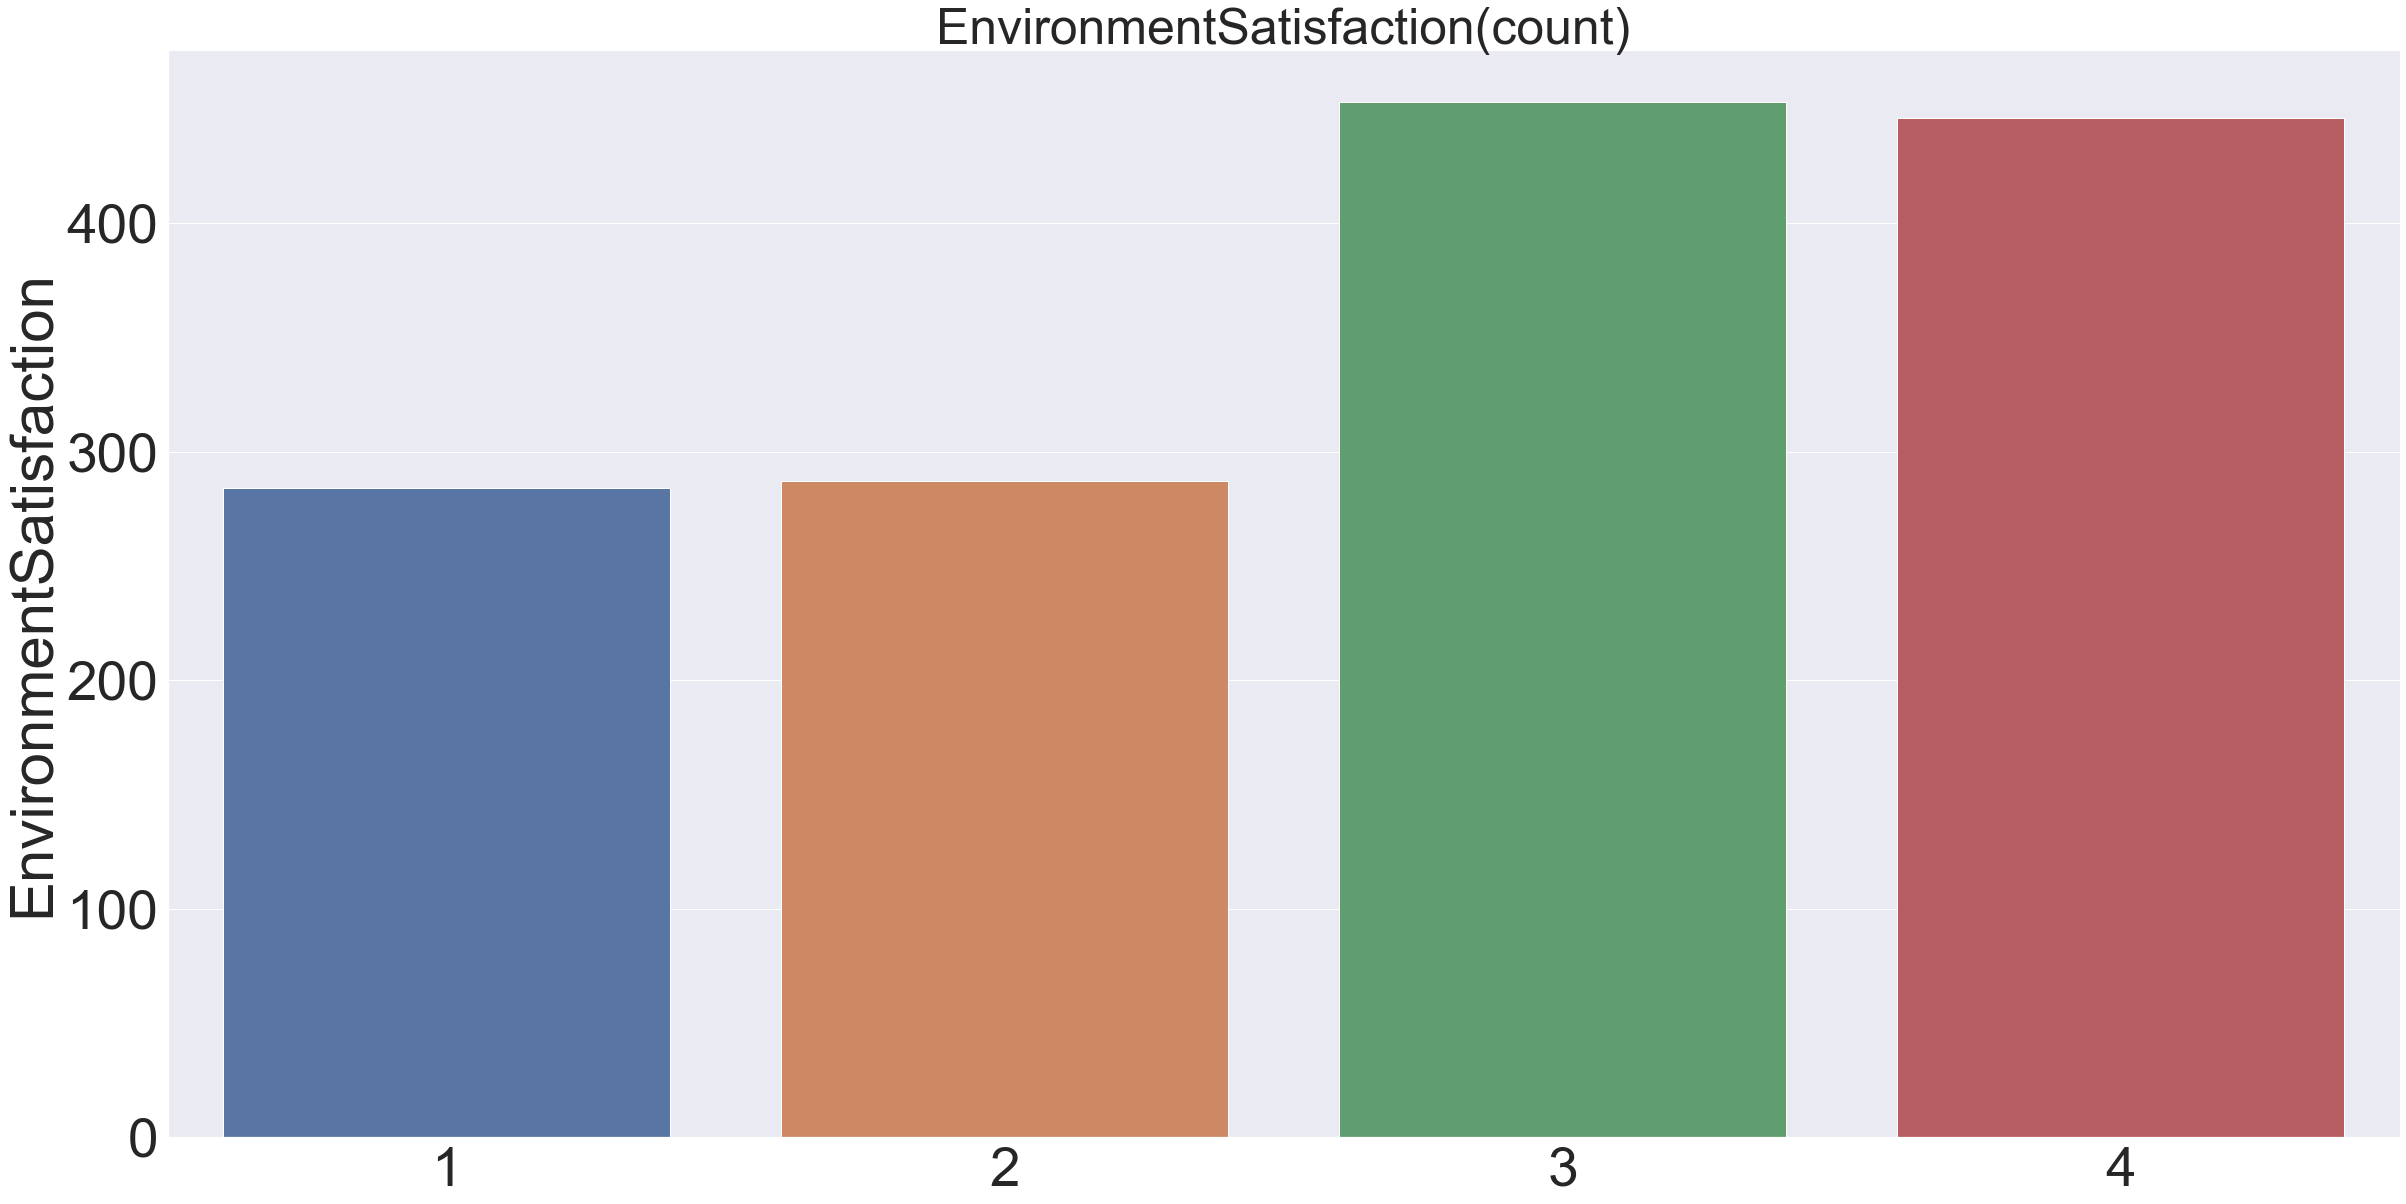

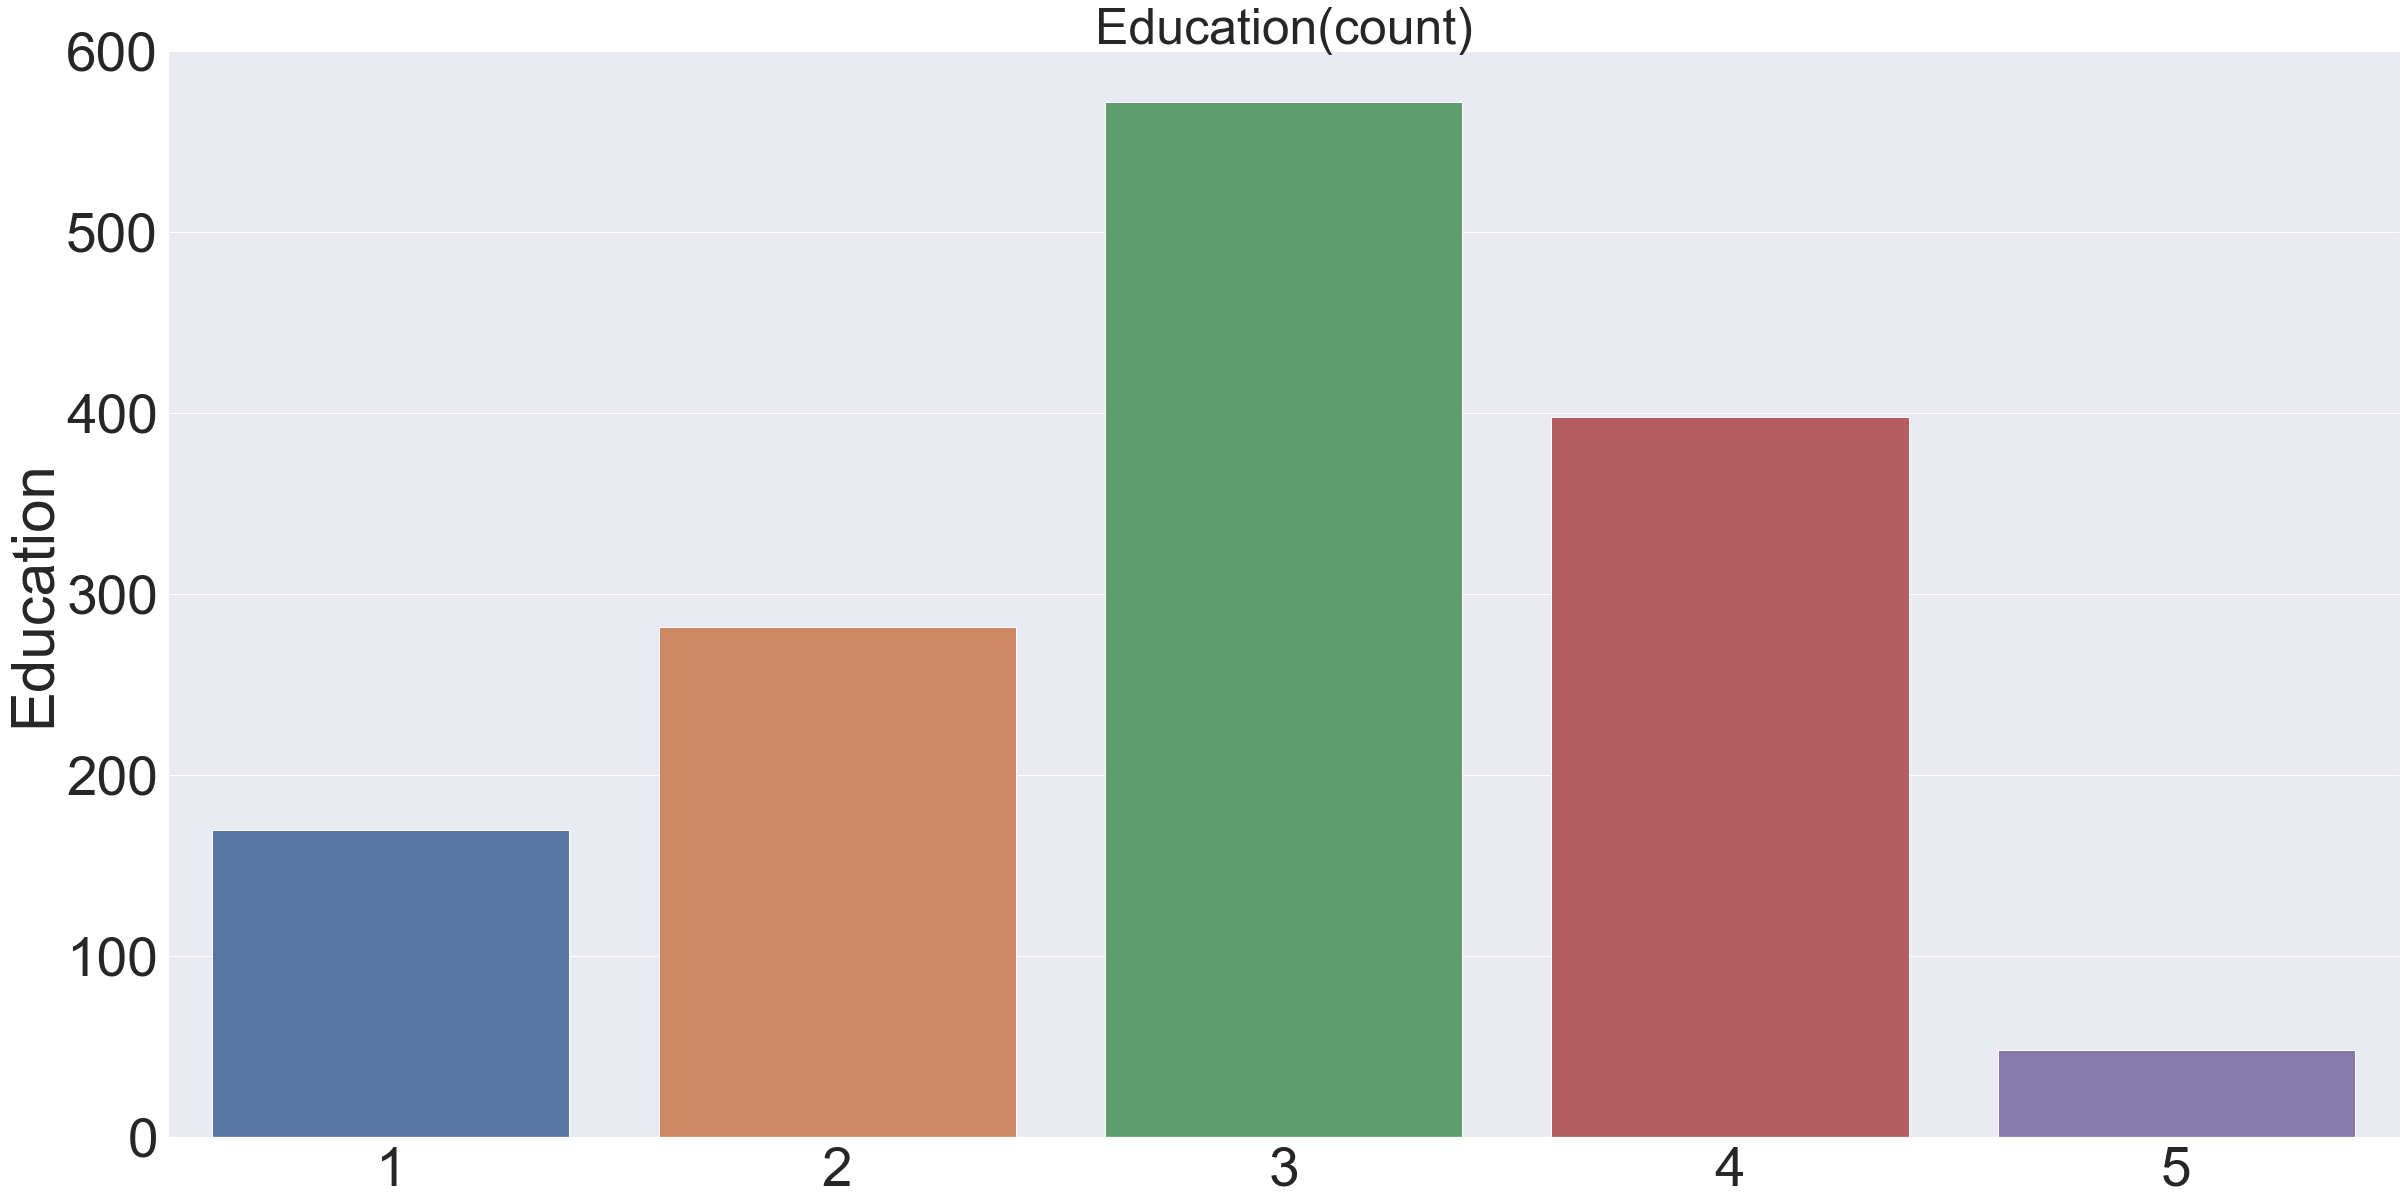

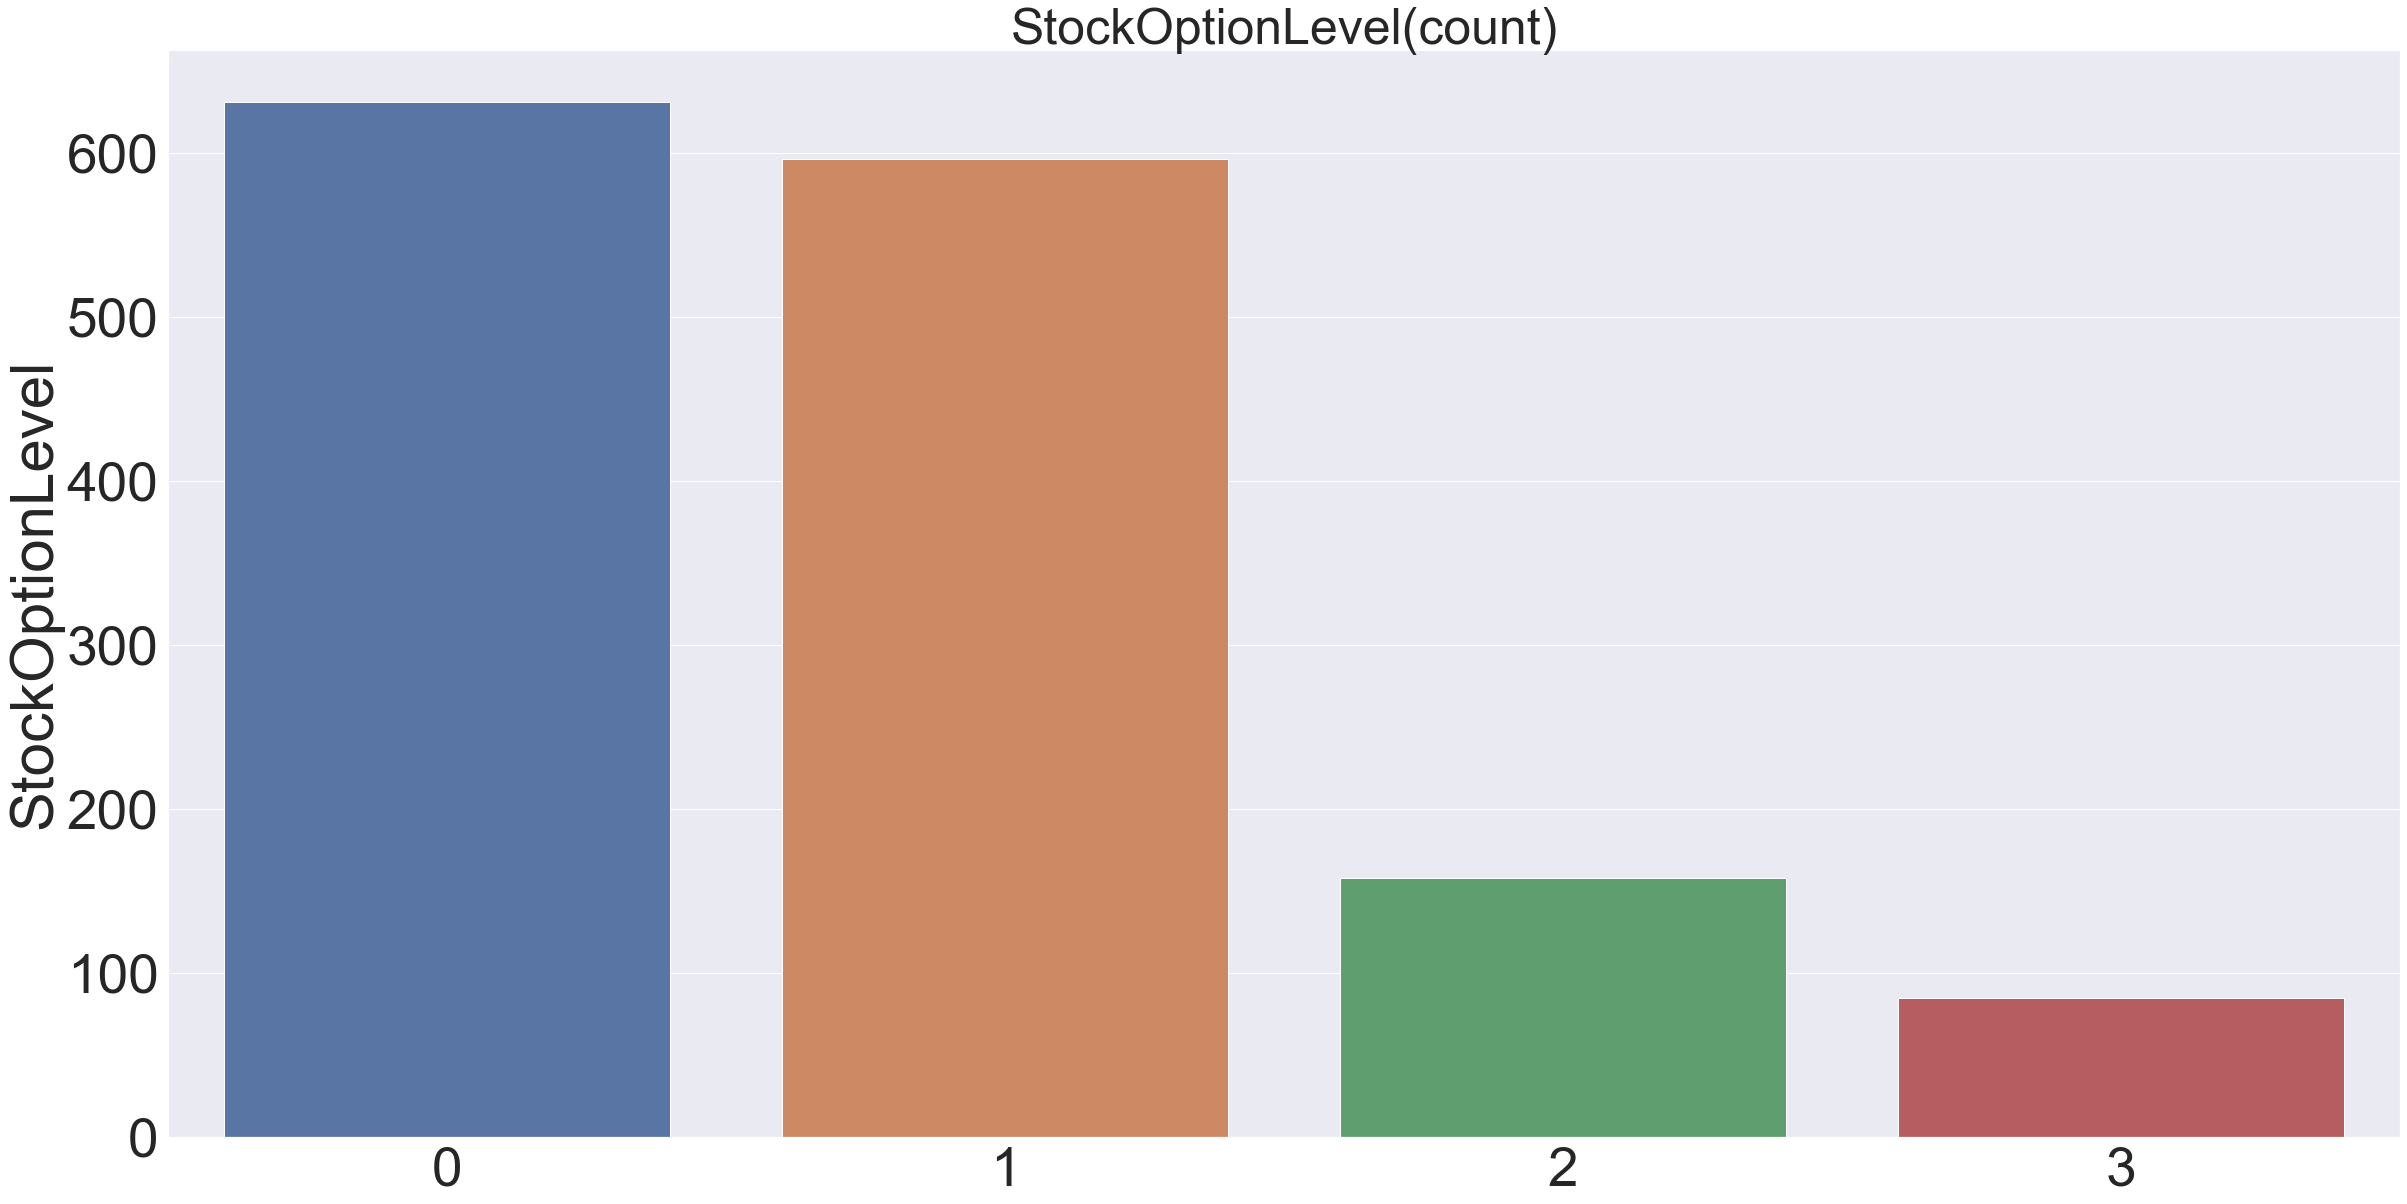

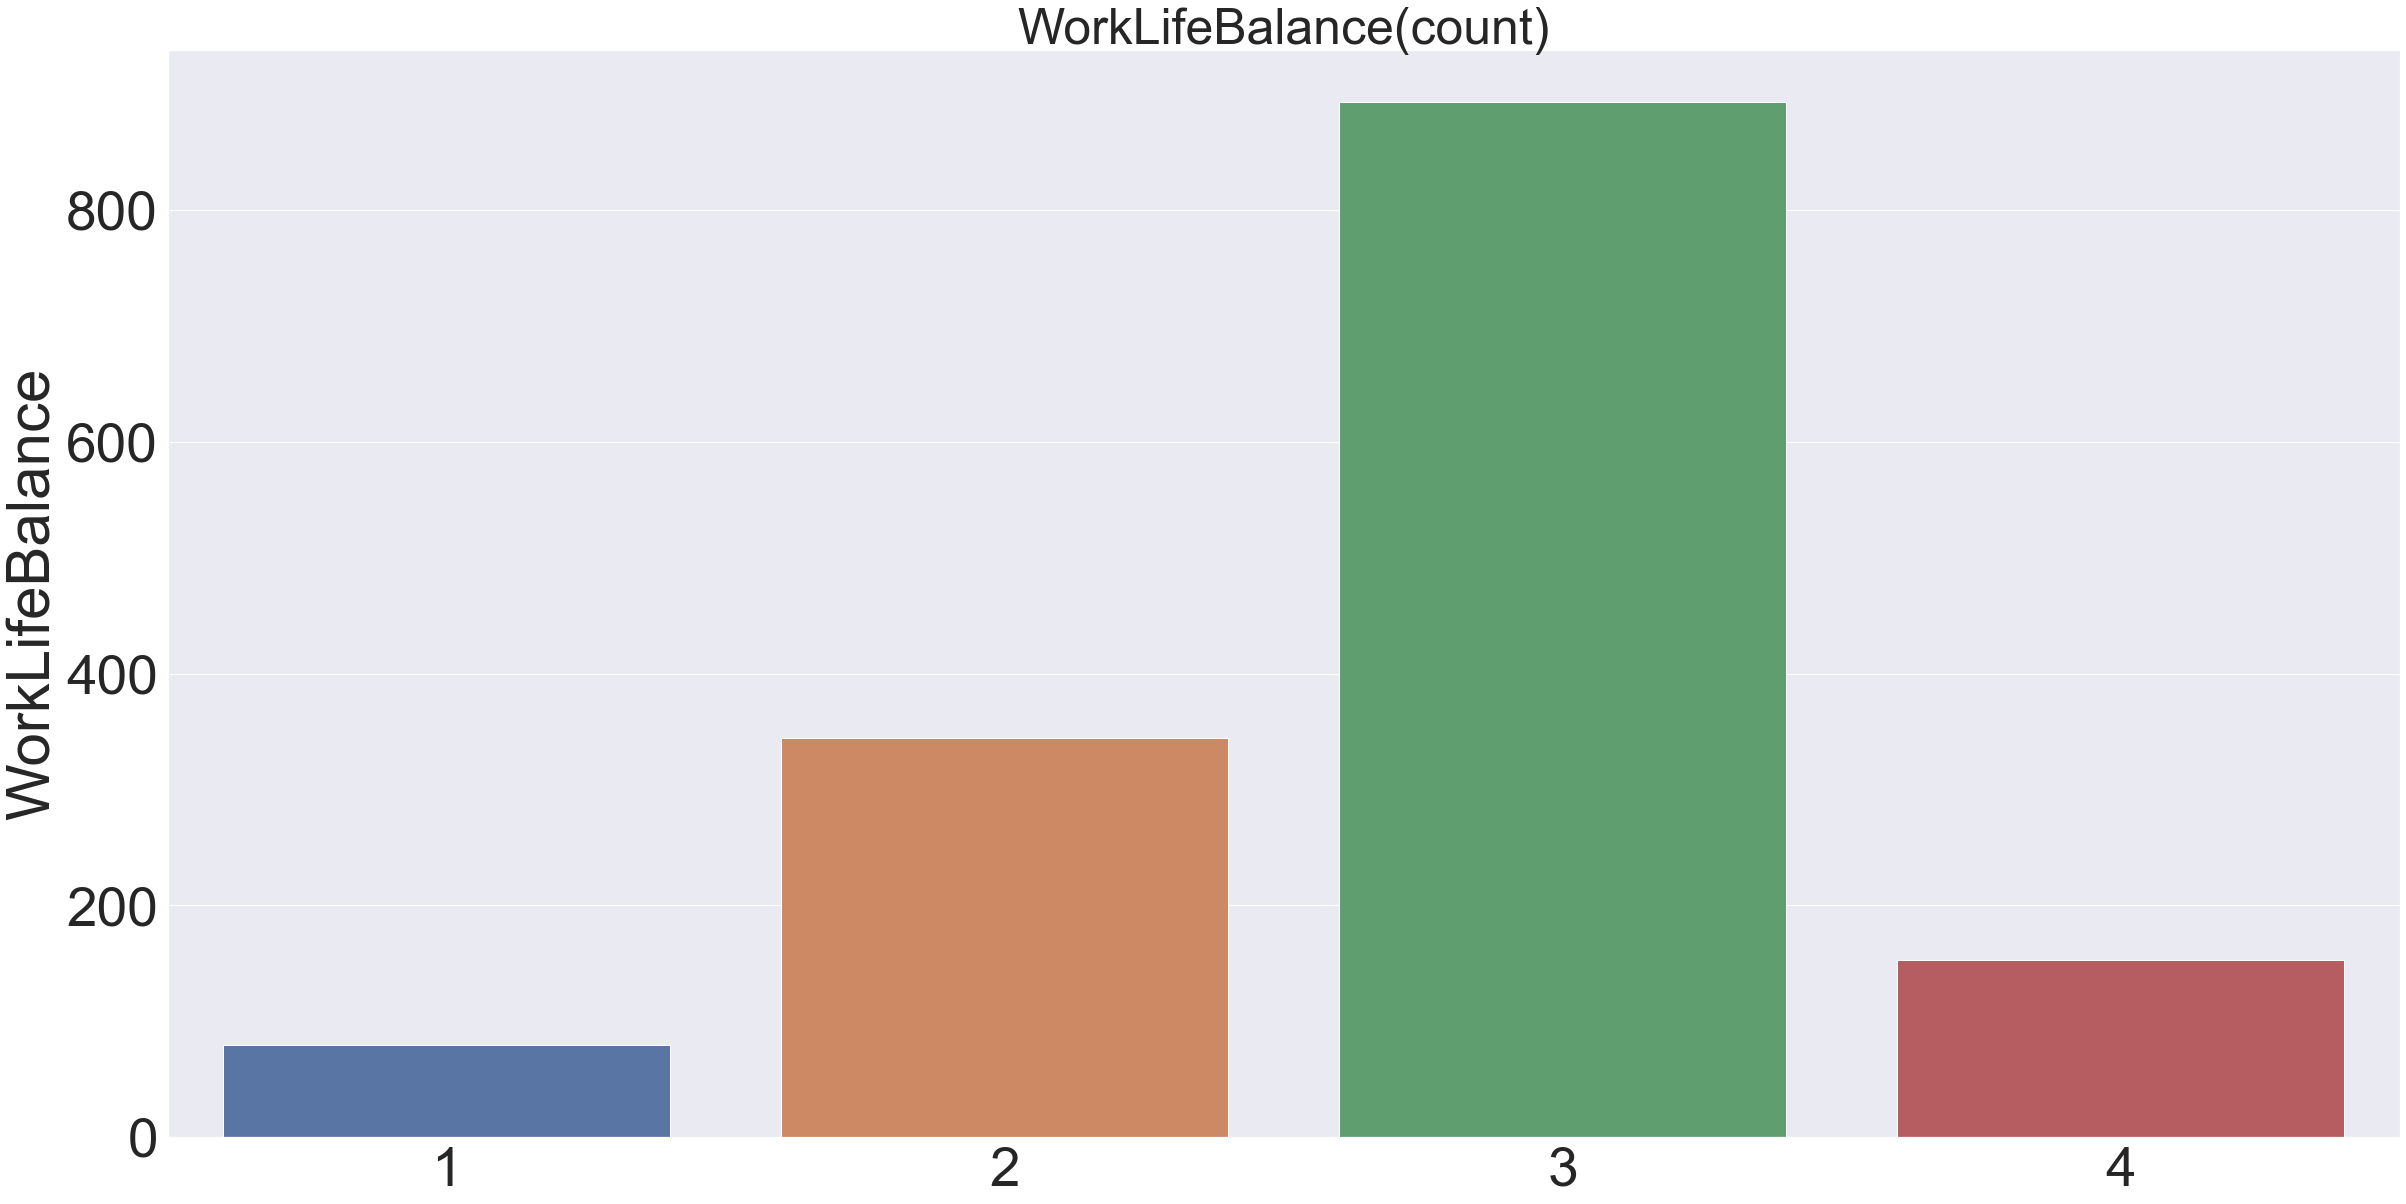

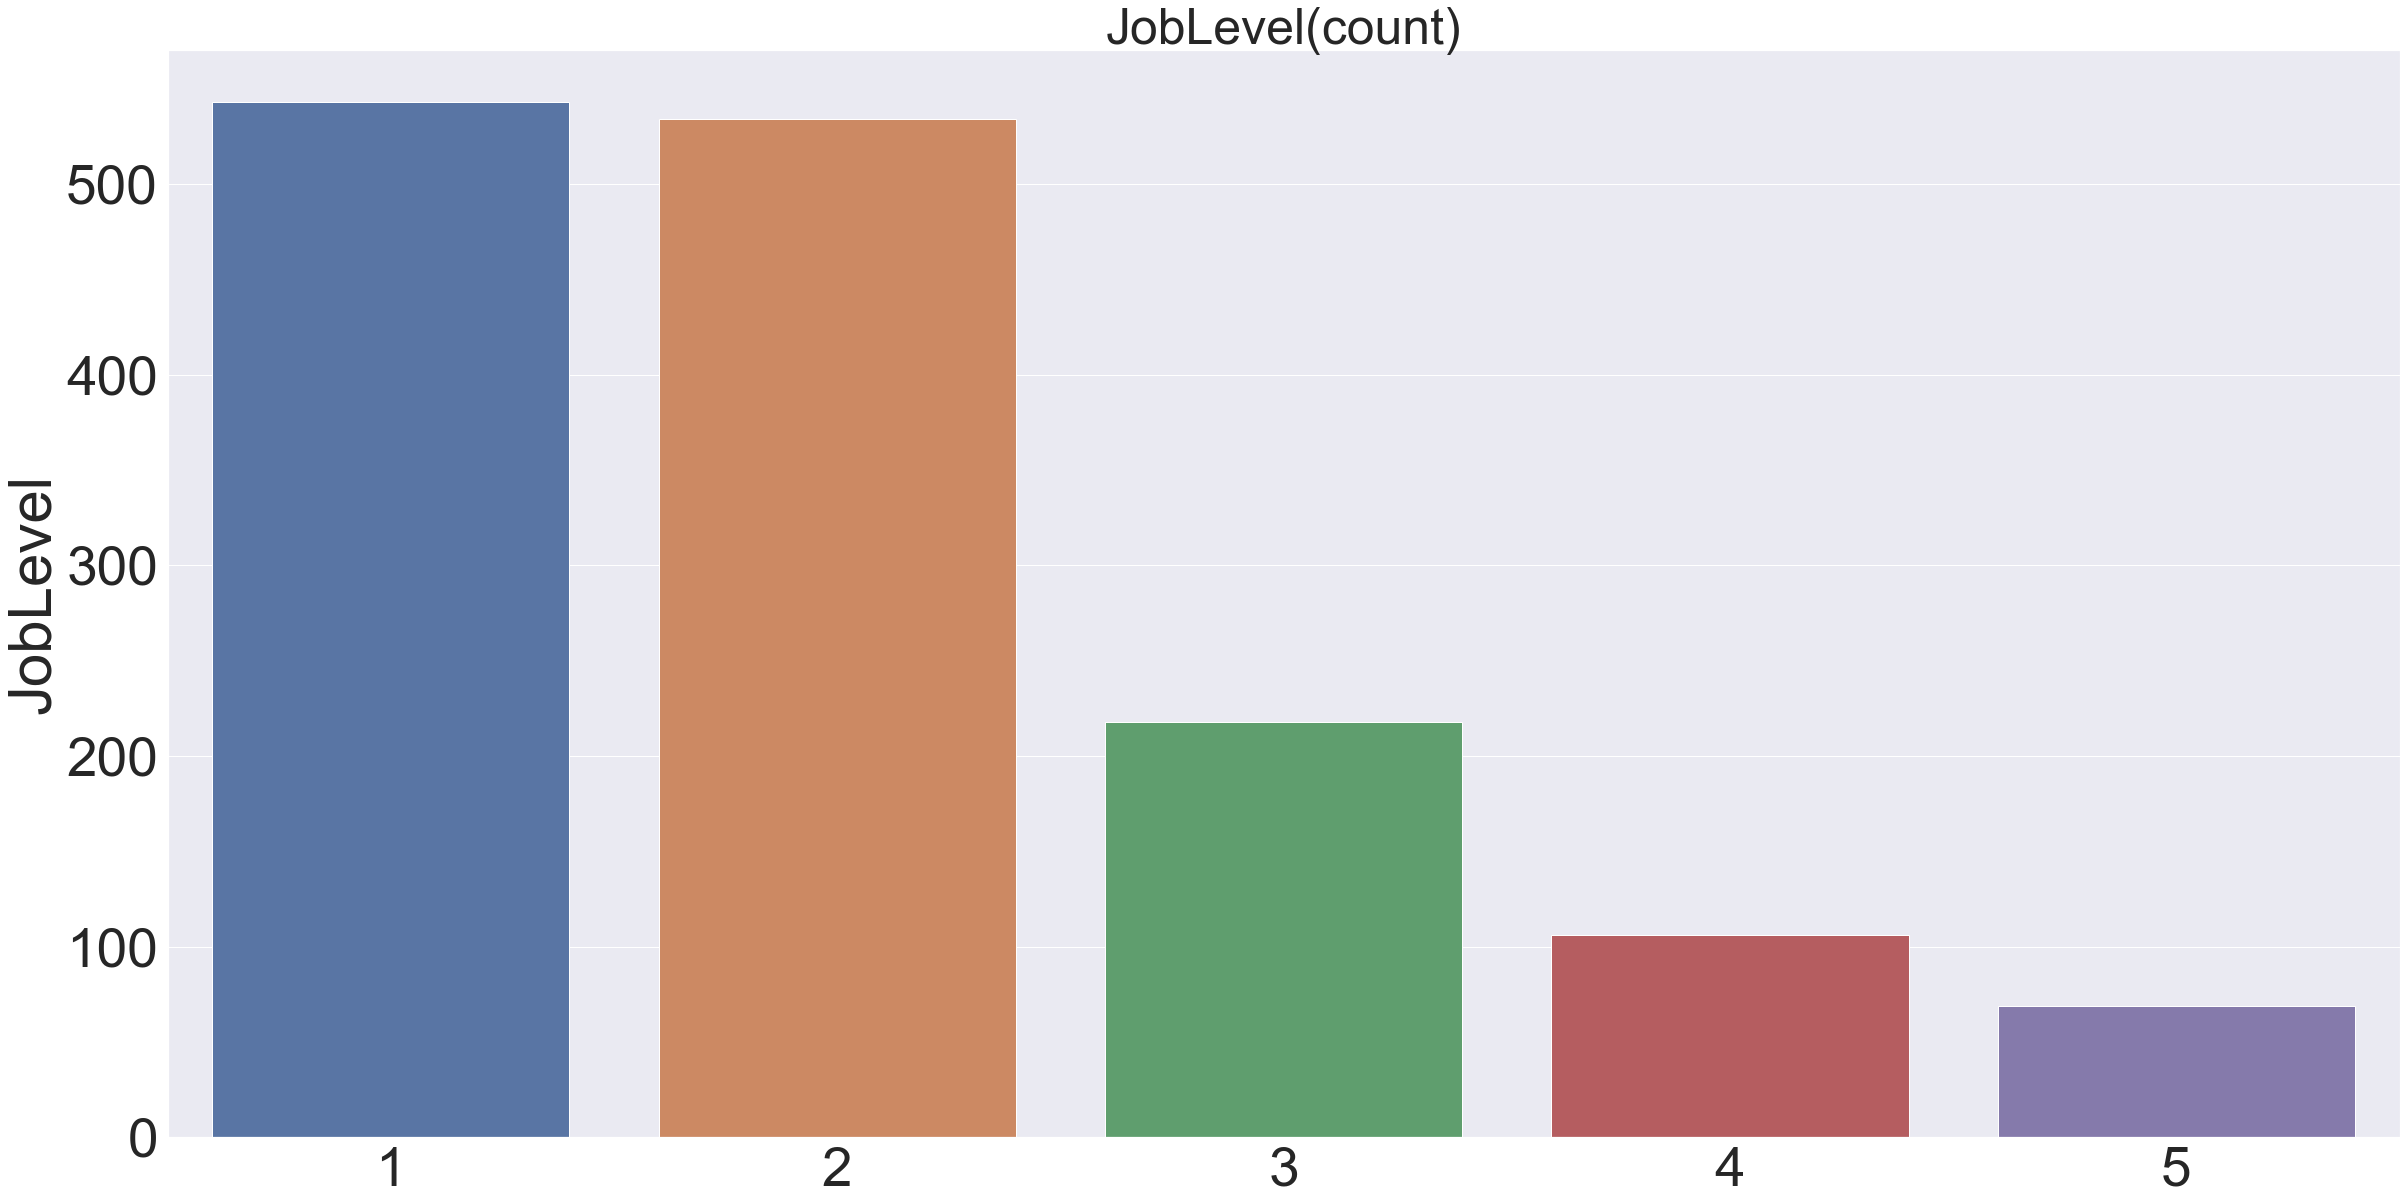

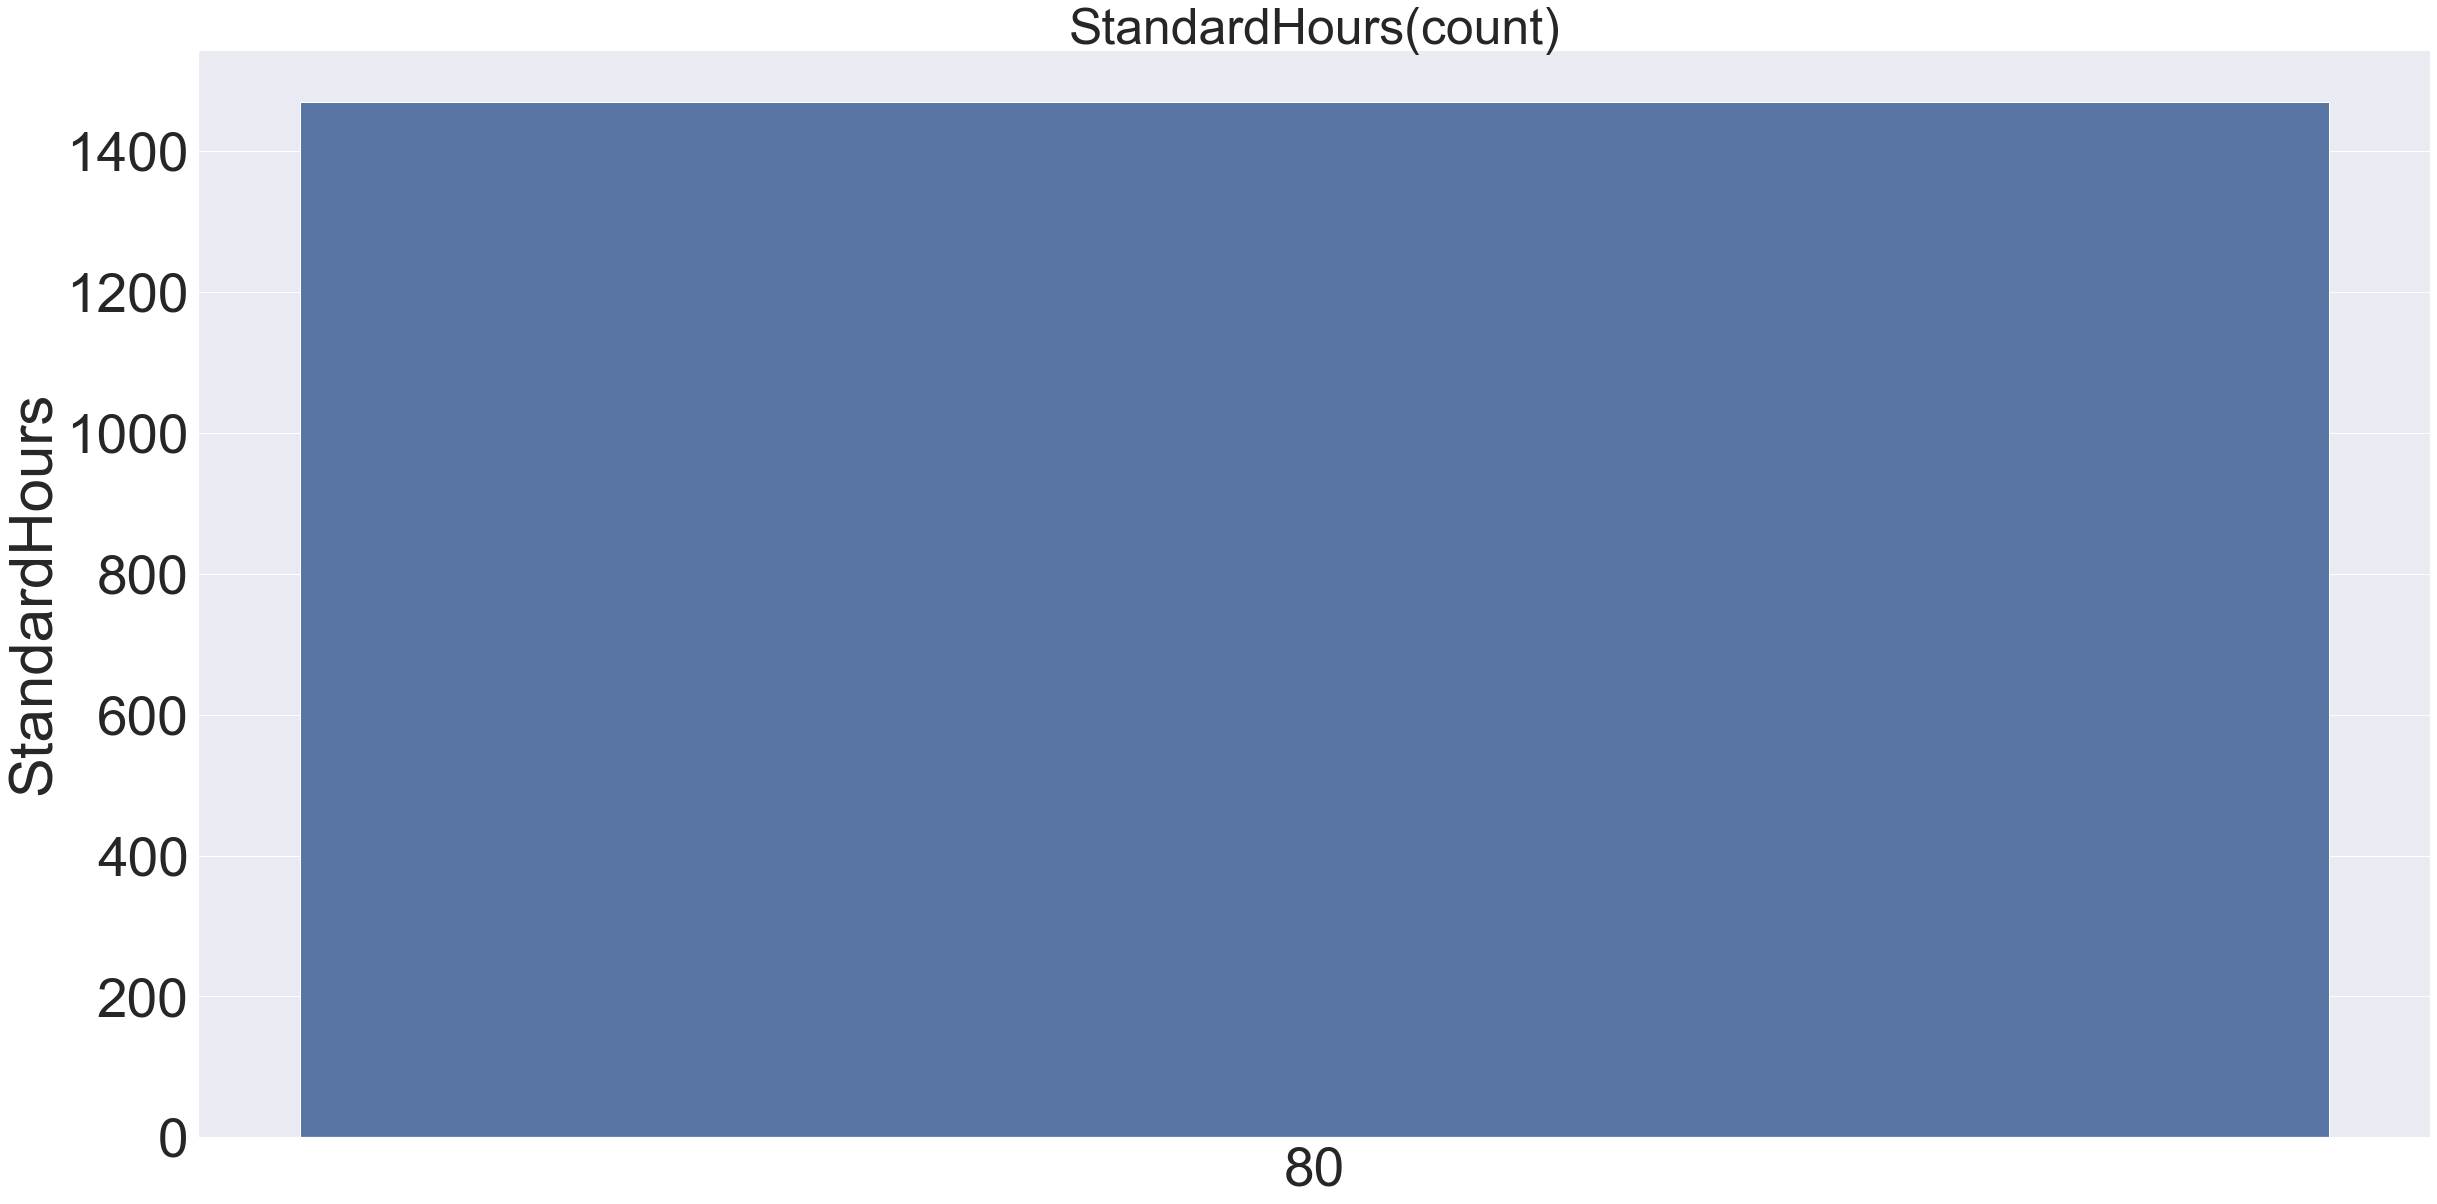

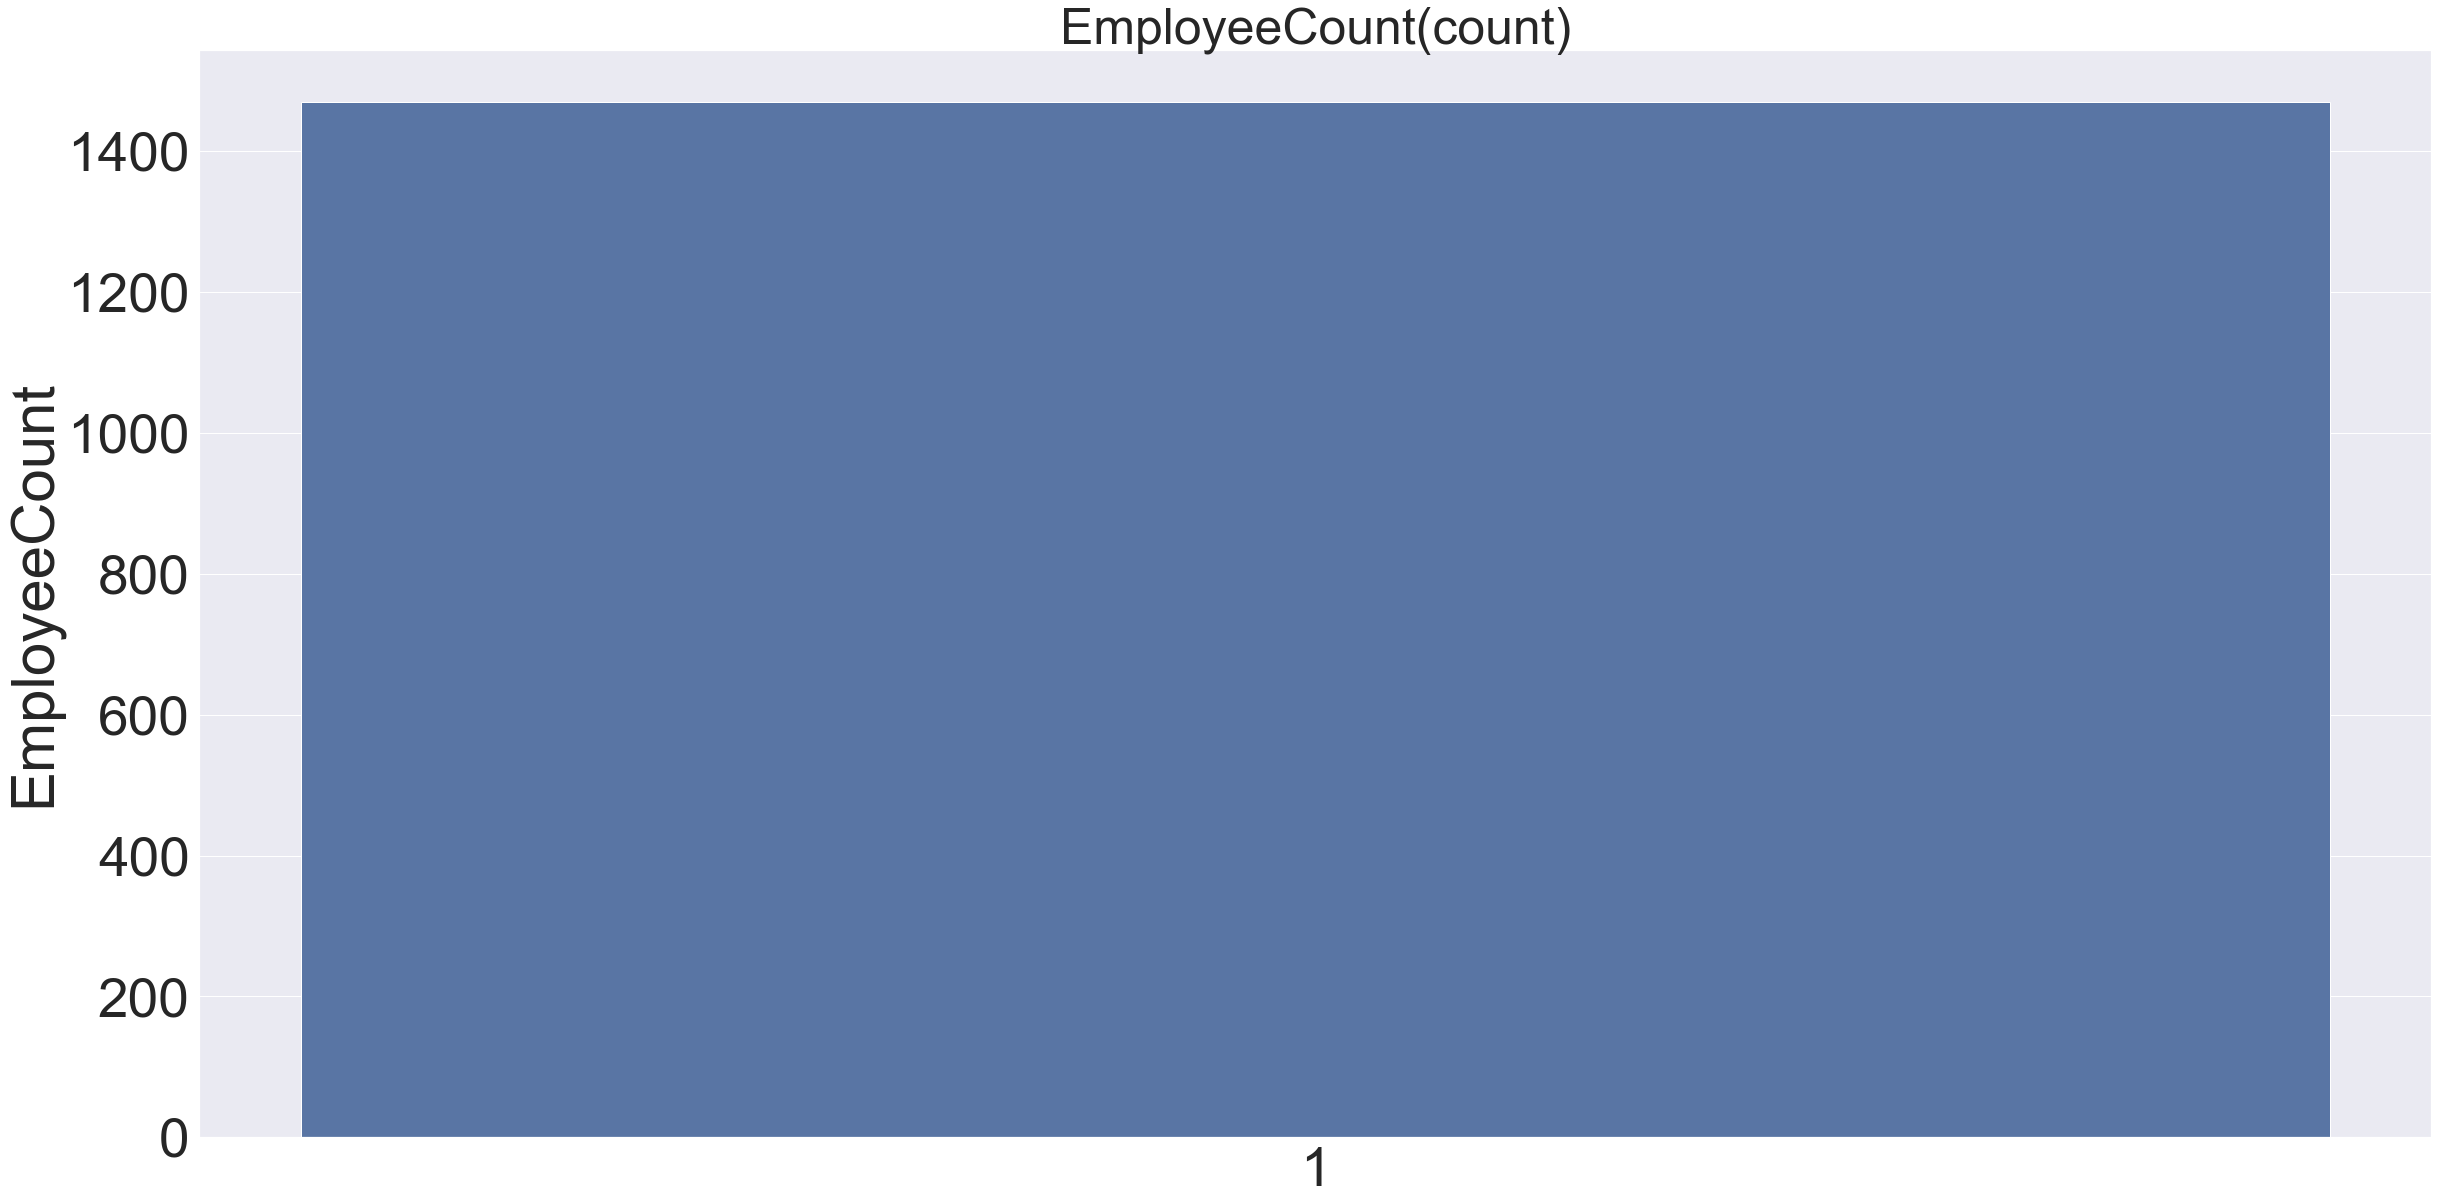

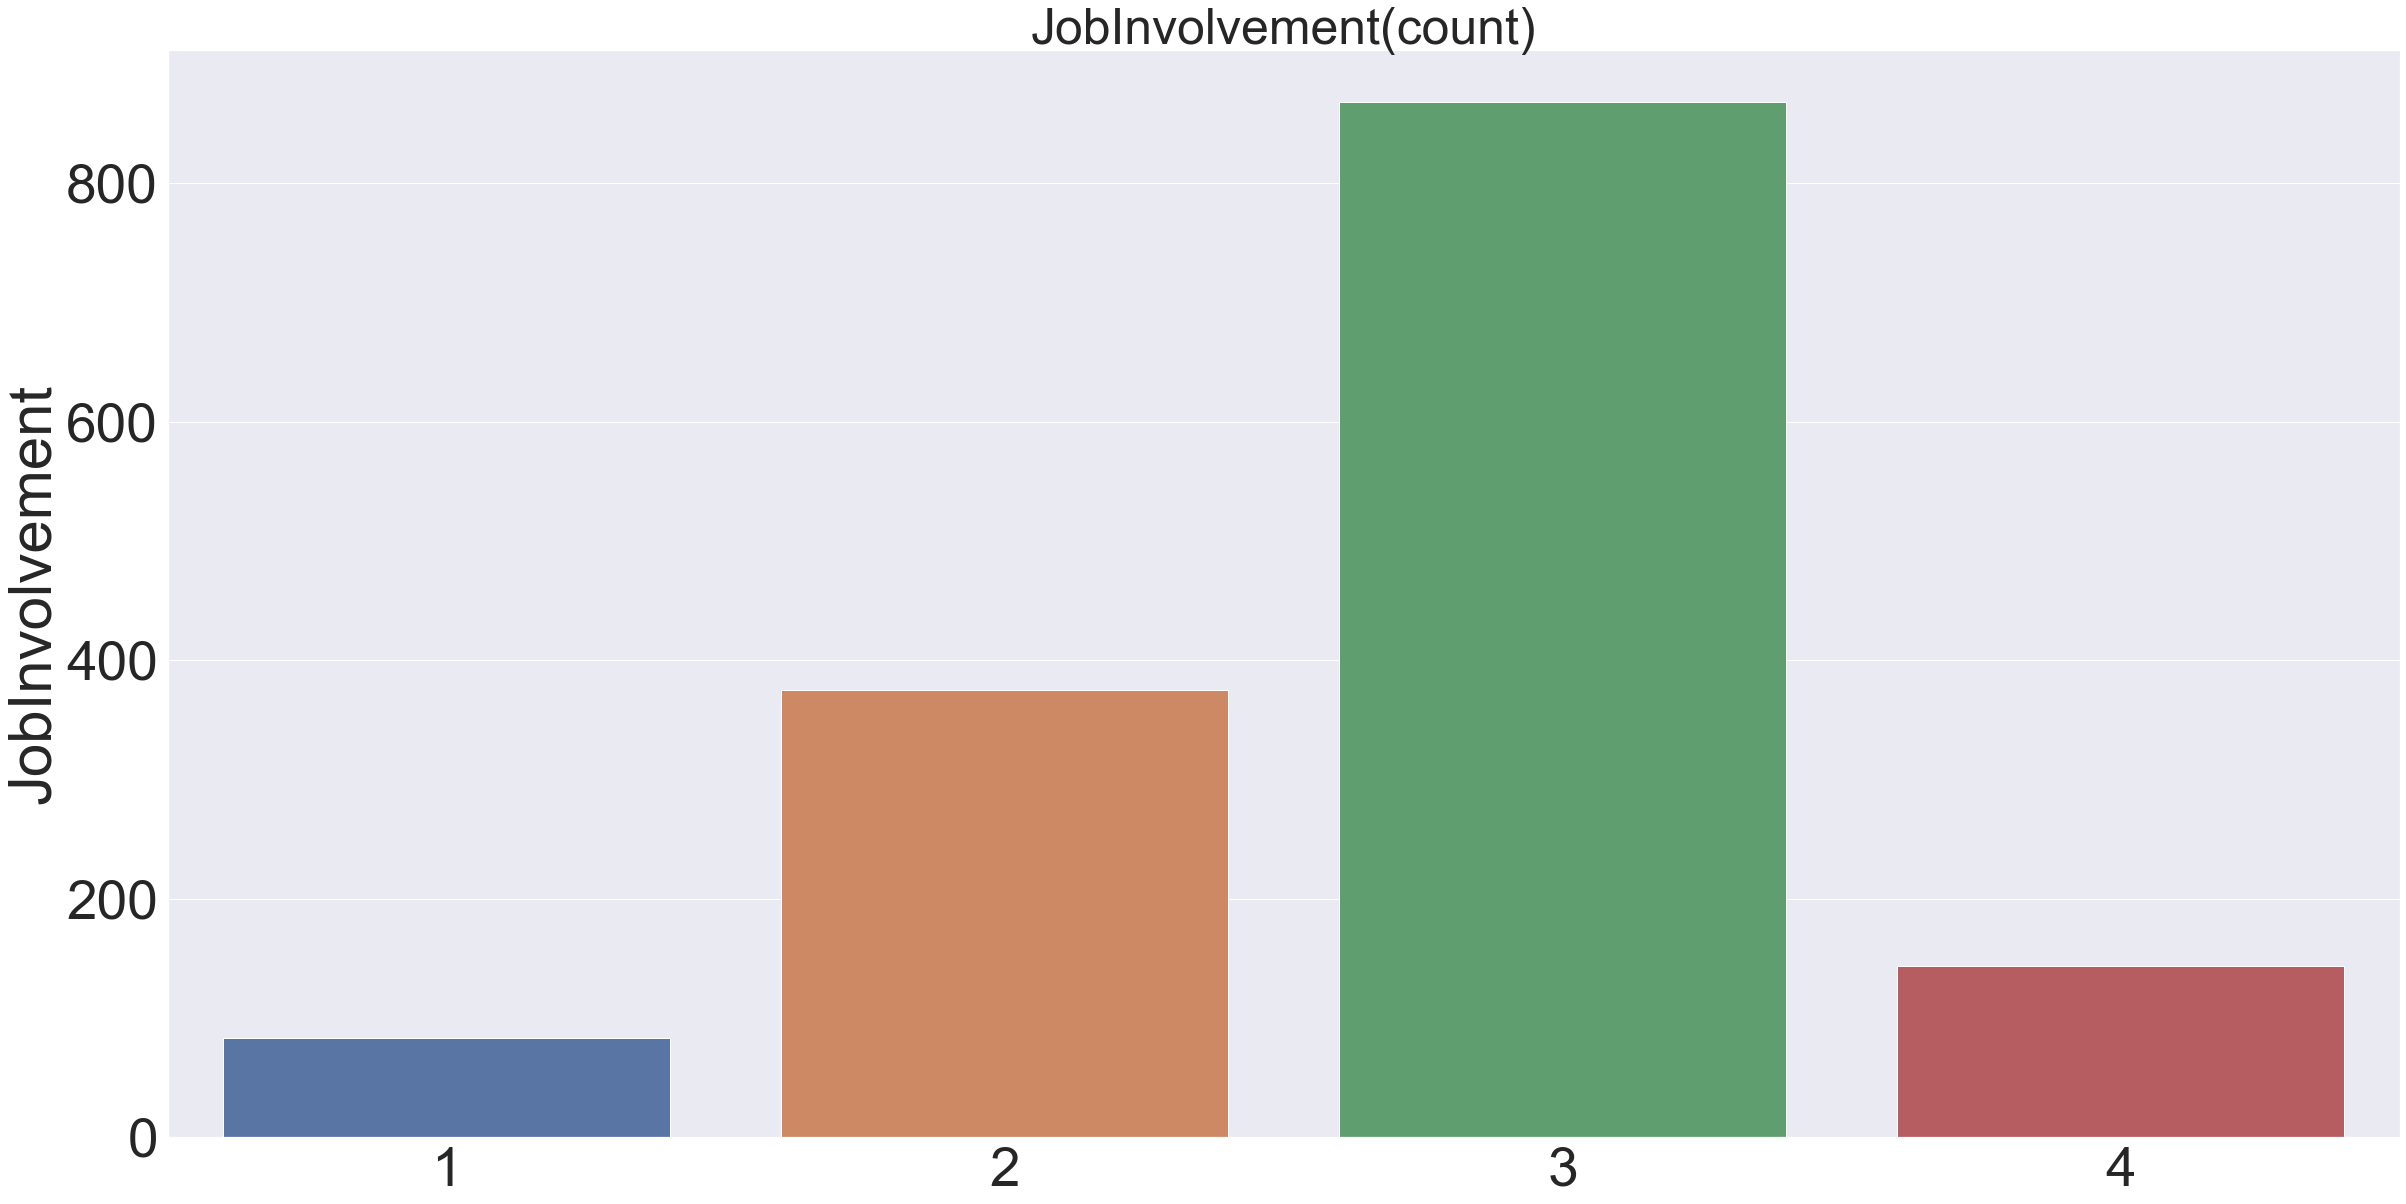

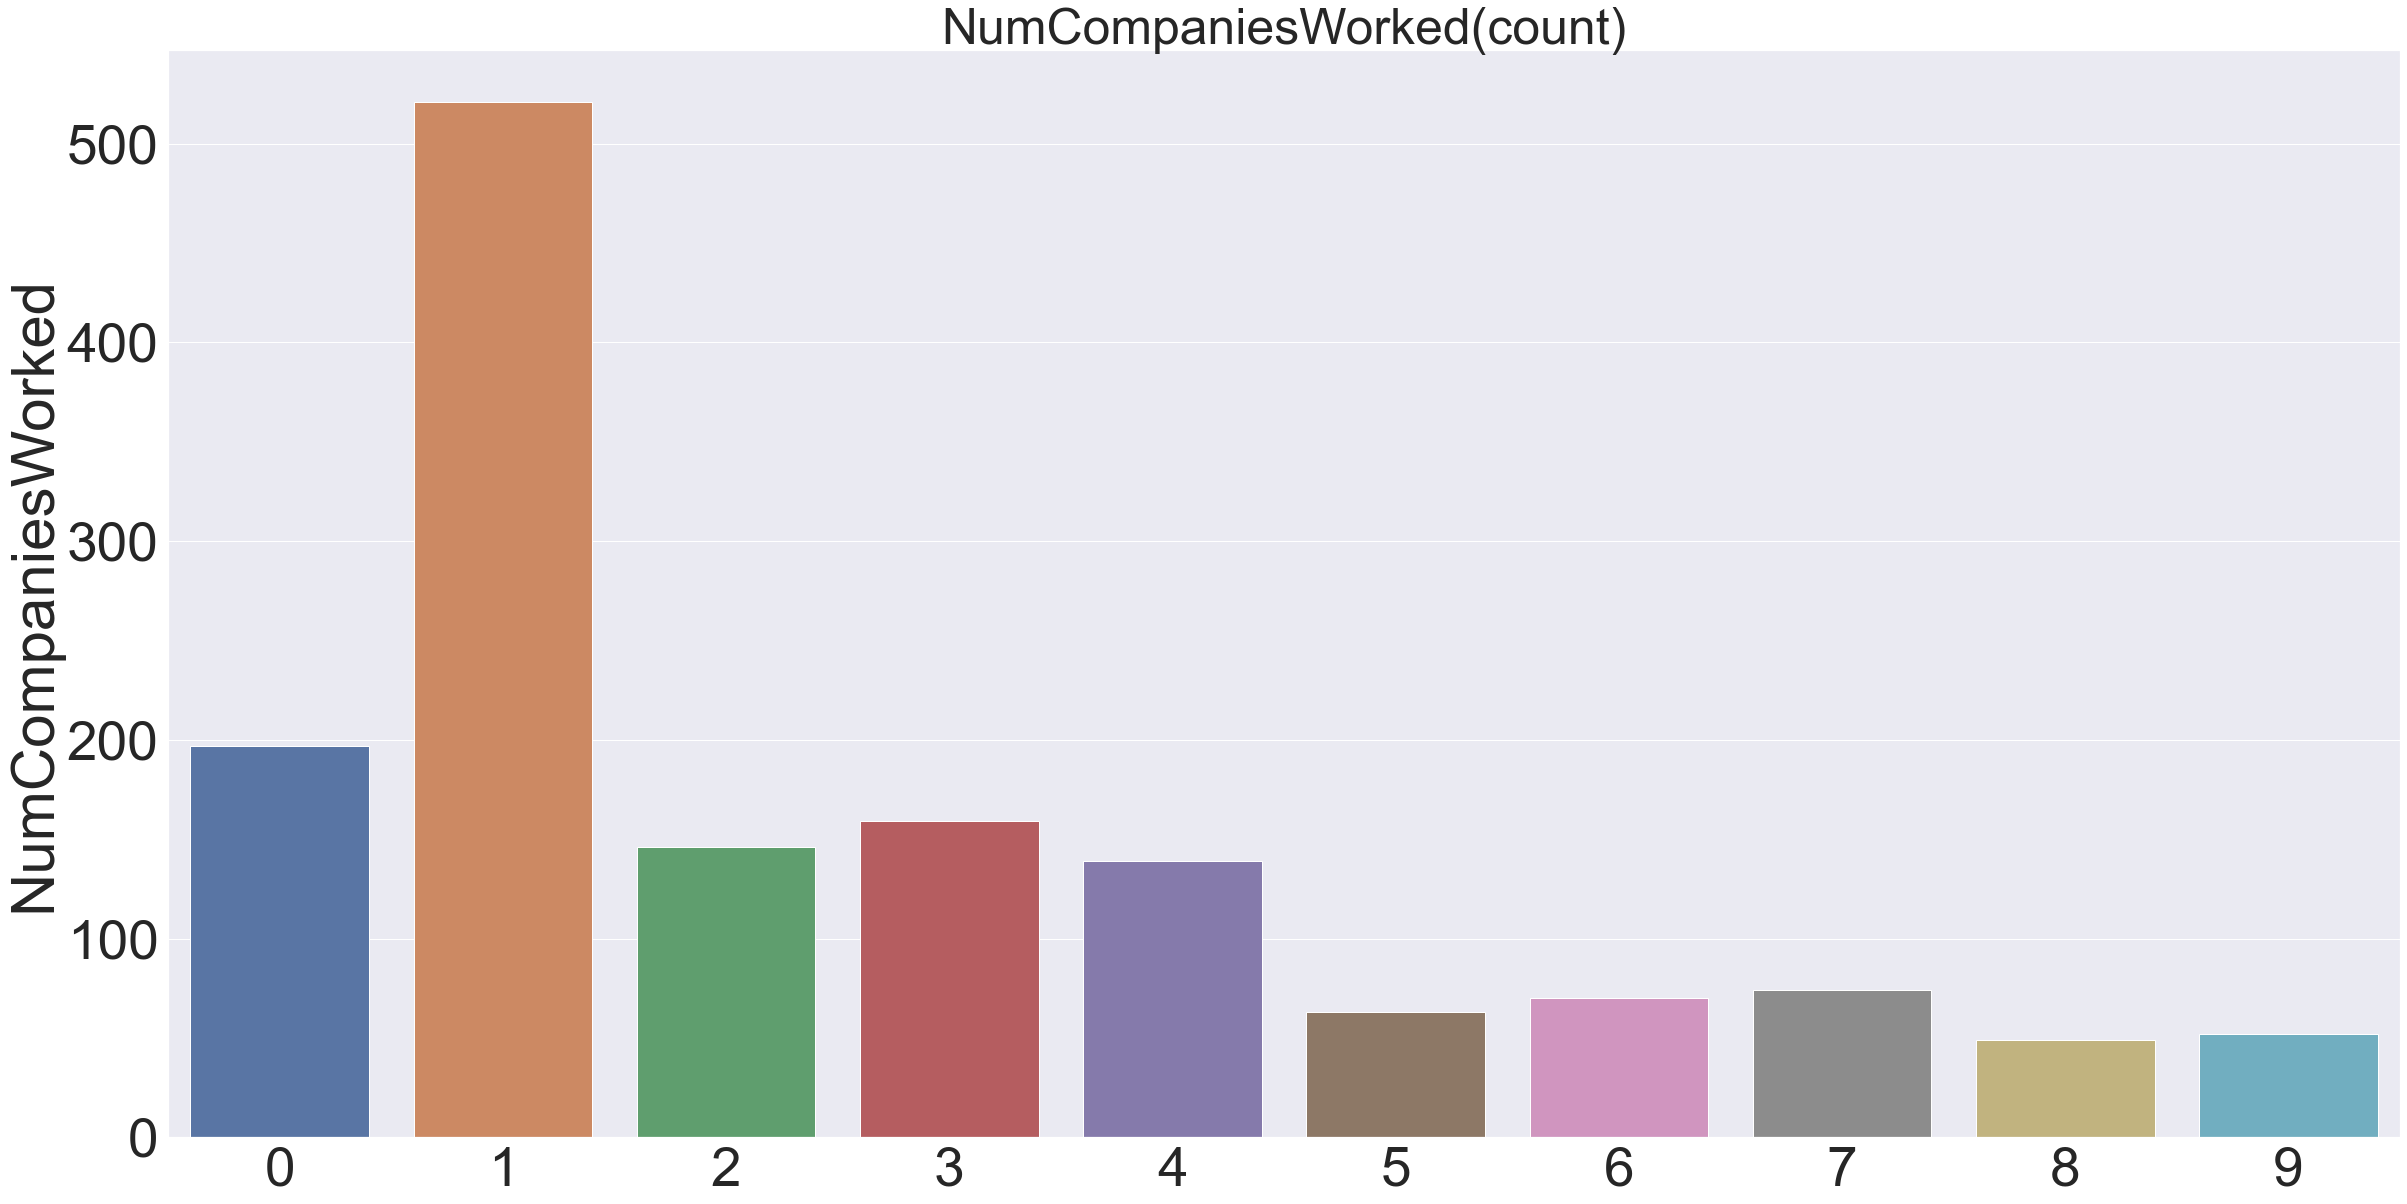

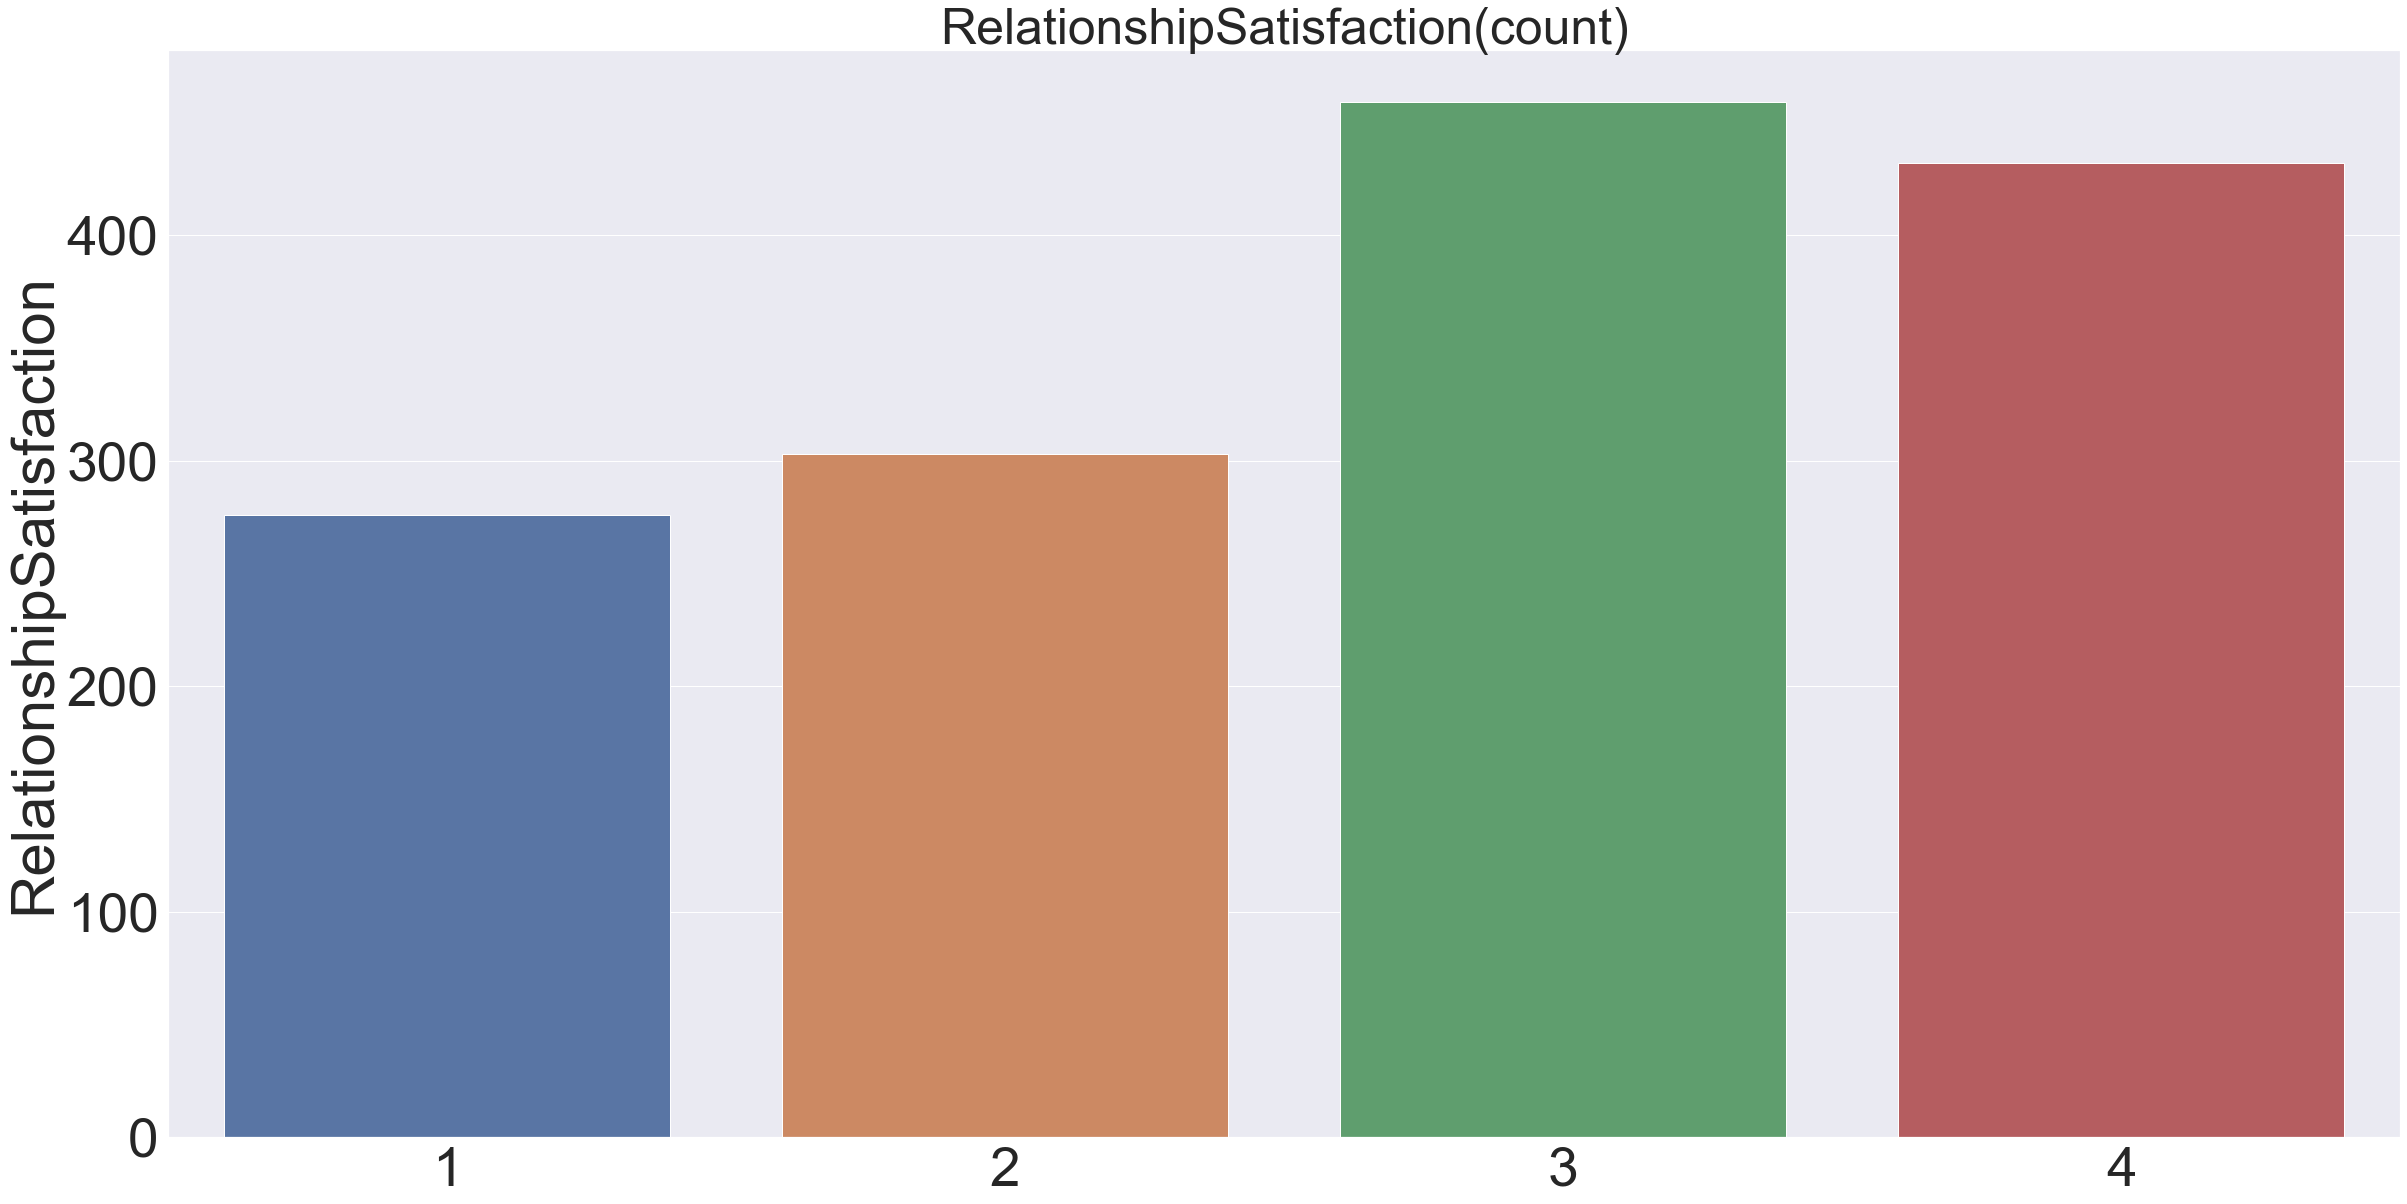

In [130]:
for i,col in enumerate(discrete_feature):
    vc_tmp = pd.DataFrame(data[col].value_counts())
    plt.figure(figsize=(40, 20), facecolor='white')
    sns.barplot(x= vc_tmp.index, y=vc_tmp[col])
    plt.title("%s(count)"%col, fontsize=50)
    plt.show()

#### 3. 이산형 변수 boxplot

In [132]:
sns.set()

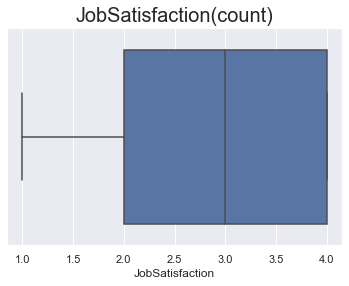

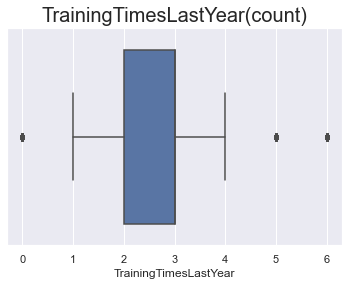

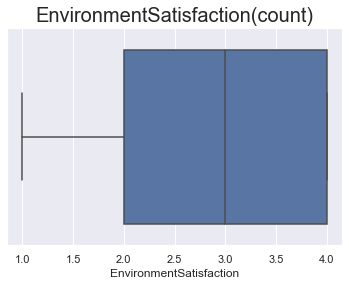

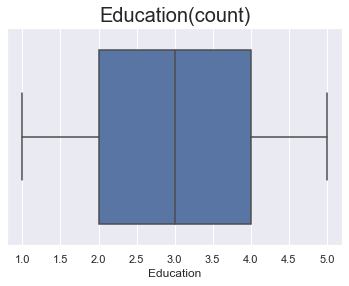

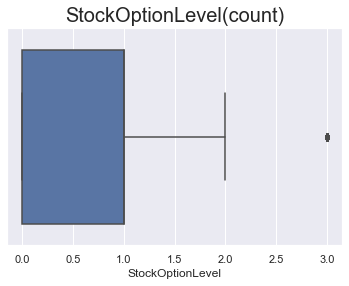

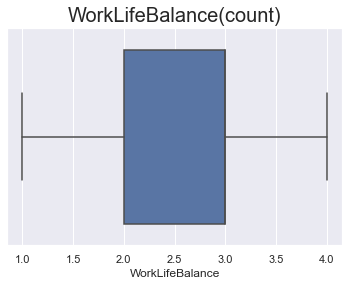

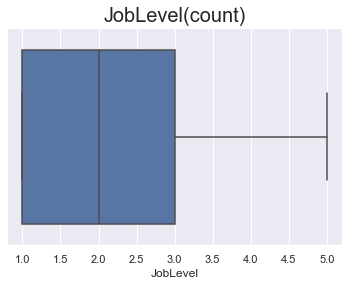

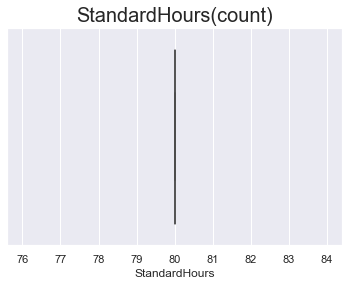

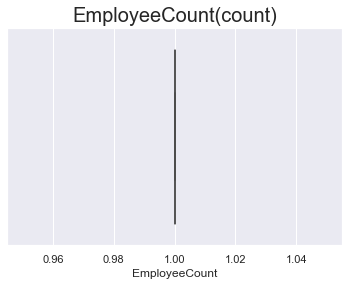

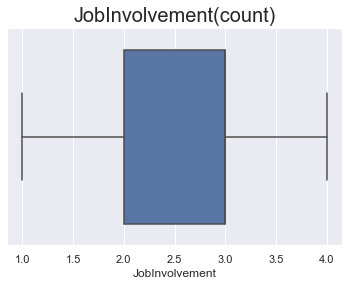

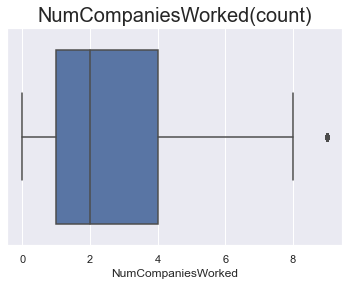

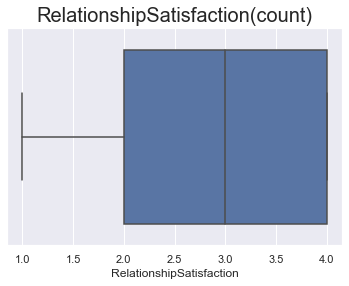

In [136]:
for i,col in enumerate(discrete_feature):
    sns.boxplot(data.loc[data[col].notnull(), col])
    plt.title("%s(count)"%col, fontsize=20)
    plt.show()

#### 3. 수치형 변수 이상치 검토
1. describe확인
2. 최빈값 확인
3. IQR 방식으로 이상치 확인
4. 표준점수로 변환 후 -3이하 +3 이상 확인
5. 기타(도메인) 지식을 적용하여 이상치 판단

##### 1) TrainingTimesLastYear

In [137]:
# 1. describe 확인
pd.DataFrame(data['TrainingTimesLastYear'].describe())

TrainingTimesLastYear
count            1470.000000
mean                2.799320
std                 1.289271
min                 0.000000
25%                 2.000000
50%                 3.000000
75%                 3.000000
max                 6.000000

In [138]:
# 2. 최빈값 확인
pd.DataFrame(data['TrainingTimesLastYear'].value_counts()).head(10)

TrainingTimesLastYear
2                    547
3                    491
4                    123
5                    119
1                     71
6                     65
0                     54

평균은 2.7993
중위수는 3
최빈값은 2임을 알 수 있었음
range는 0~6

In [139]:
data['TrainingTimesLastYear'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    3.0
0.80    4.0
0.90    5.0
0.95    5.0
0.99    6.0
Name: TrainingTimesLastYear, dtype: float64

In [140]:
# 3. IQR 방식으로 이상치 확인
q1 = data['TrainingTimesLastYear'].quantile(0.25)
q3 = data['TrainingTimesLastYear'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  1.0
Q1 - 1.5*IQR =  0.5
Q3 + 1.5*IQR =  4.5


Q3인 75%에 해당하는 값이 3이고, max가 6일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 4, 5, 5, 6이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.
(90% 값이 Q3 + 1.5*IQR 보다 큼)

TrainingTimesLastYear의 이상치는 존재한다고 판단됨.

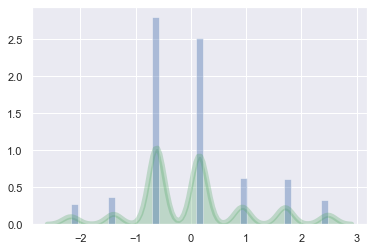

In [141]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['TrainingTimesLastYear']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [142]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['TrainingTimesLastYear'] > (q3 + 1.5*iqr))])

184

In [143]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['TrainingTimesLastYear'])>=3)

0

IQR 방식과 표준점수 방식을 사용했을 때, IQR 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 184개, 표준점수가 3보다 큰 이상치는 0개 존재했다.<br>
그러나 의미 측면에서 교육시간이 6일 수 있기 때문에 이상치라고 판단하지 않음.<br>
∴ 이상치 존재하지 않음<br>

##### 2) StockOptionLevel

In [144]:
# 1. describe 확인
pd.DataFrame(data['StockOptionLevel'].describe())

StockOptionLevel
count       1470.000000
mean           0.793878
std            0.852077
min            0.000000
25%            0.000000
50%            1.000000
75%            1.000000
max            3.000000

In [145]:
# 2. 최빈값 확인
pd.DataFrame(data['StockOptionLevel'].value_counts()).head(10)

StockOptionLevel
0               631
1               596
2               158
3                85

평균은 0.7939
중위수는 1
최빈값은 0임을 알 수 있었음
range는 0~3

In [146]:
data['StockOptionLevel'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    1.0
0.80    1.0
0.90    2.0
0.95    3.0
0.99    3.0
Name: StockOptionLevel, dtype: float64

In [147]:
# 3. IQR 방식으로 이상치 확인
q1 = data['StockOptionLevel'].quantile(0.25)
q3 = data['StockOptionLevel'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  1.0
Q1 - 1.5*IQR =  -1.5
Q3 + 1.5*IQR =  2.5


Q3인 75%에 해당하는 값이 1이고, max가 3일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 1, 2, 3, 3이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.
(95% 값이 Q3 + 1.5*IQR 보다 큼)

StockOptionLevel의 이상치는 존재한다고 판단됨.

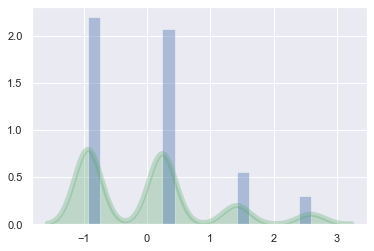

In [148]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['StockOptionLevel']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [149]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['StockOptionLevel'] > (q3 + 1.5*iqr))])

85

In [150]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['StockOptionLevel'])>=3)

0

IQR 방식과 표준점수 방식을 사용했을 때, IQR 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 85개, 표준점수가 3보다 큰 이상치는 0개 존재했다.<br>
∴ 이상치 존재할 가능성이 있음<br>

##### 3) NumCompaniesWorked

In [151]:
# 1. describe 확인
pd.DataFrame(data['NumCompaniesWorked'].describe())

NumCompaniesWorked
count         1470.000000
mean             2.693197
std              2.498009
min              0.000000
25%              1.000000
50%              2.000000
75%              4.000000
max              9.000000

In [152]:
# 2. 최빈값 확인
pd.DataFrame(data['NumCompaniesWorked'].value_counts()).head(10)

NumCompaniesWorked
1                 521
0                 197
3                 159
2                 146
4                 139
7                  74
6                  70
5                  63
9                  52
8                  49

평균은 2.6932
중위수는 2
최빈값은 1임을 알 수 있었음
range는 0~9

In [153]:
data['NumCompaniesWorked'].quantile([0.75,0.8,0.9,0.95,0.99])

0.75    4.0
0.80    5.0
0.90    7.0
0.95    8.0
0.99    9.0
Name: NumCompaniesWorked, dtype: float64

In [154]:
# 3. IQR 방식으로 이상치 확인
q1 = data['NumCompaniesWorked'].quantile(0.25)
q3 = data['NumCompaniesWorked'].quantile(0.75)
iqr = q3 - q1 # Q3 - Q1
print('IQR = ', iqr)

# 이상치 확인
print('Q1 - 1.5*IQR = ', q1 - 1.5*iqr)
print('Q3 + 1.5*IQR = ', q3 + 1.5*iqr)

IQR =  3.0
Q1 - 1.5*IQR =  -3.5
Q3 + 1.5*IQR =  8.5


Q3인 75%에 해당하는 값이 4이고, max가 9일 때, 80%, 90%, 95%, 99%에 해당하는 값은 각각 5, 7, 8, 9이었다.

이상치 판단 기준 Q3 + 1.5*IQR 보다 큰 이상치가 존재함.
(99% 값이 Q3 + 1.5*IQR 보다 큼)

NumCompaniesWorked의 이상치는 존재한다고 판단됨.

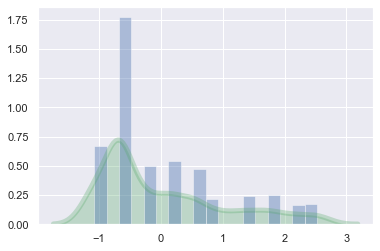

In [155]:
# 4. 표준점수로 변환 후 -3이하 +3 이상 확인
sns.distplot(stats.zscore(data['NumCompaniesWorked']), kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})

In [156]:
# IQR 방식으로 이상치 판단했을 때 이상치 개수
len(data[(data['NumCompaniesWorked'] > (q3 + 1.5*iqr))])

52

In [157]:
# 표준점수 방식으로 이상치 판단했을 때 이상치 개수
sum(stats.zscore(data['NumCompaniesWorked'])>=3)

0

In [160]:
pd.DataFrame(data.loc[(data['NumCompaniesWorked'] > (q3 + 1.5*iqr)),['Age','NumCompaniesWorked']])

Age  NumCompaniesWorked
4      27                   9
38     36                   9
50     48                   9
95     54                   9
105    59                   9
122    56                   9
194    45                   9
198    38                   9
208    40                   9
245    31                   9
287    38                   9
290    49                   9
334    45                   9
371    29                   9
372    35                   9
385    30                   9
393    34                   9
401    56                   9
440    34                   9
447    35                   9
456    31                   9
525    24                   9
541    36                   9
544    47                   9
551    39                   9
575    54                   9
597    42                   9
617    44                   9
623    30                   9
660    58                   9
714    50                   9
717    27                   9
756    32                   9
770    46                   9
779    51                   9
789    44                   9
816    39                   9
837    40                   9
927    36                   9
947    52                   9
957    40                   9
1000   52                   9
1035   31                   9
1117   34                   9
1145   36                   9
1162   35                   9
1172   29                   9
1219   29                   9
1262   43                   9
1296   30                   9
1357   42                   9
1442   29                   9

IQR 방식과 표준점수 방식을 사용했을 때, IQR 방식에서 이상치가 있다고 판단되었다.<br>
Q3 + 1.5*IQR보다 큰 이상치는 52개, 표준점수가 3보다 큰 이상치는 0개 존재했다.<br>
그러나, 의미상 (애매하긴 하지만) 일한 회사의 수가 9개가 넘을 수 있음.<br>
∴ 이상치 존재하지 않음<br>

### 범주형변수 확인

In [161]:
category_feature

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

#### 1. 범주형 변수 barplot - count

In [163]:
sns.set(font_scale = 5)

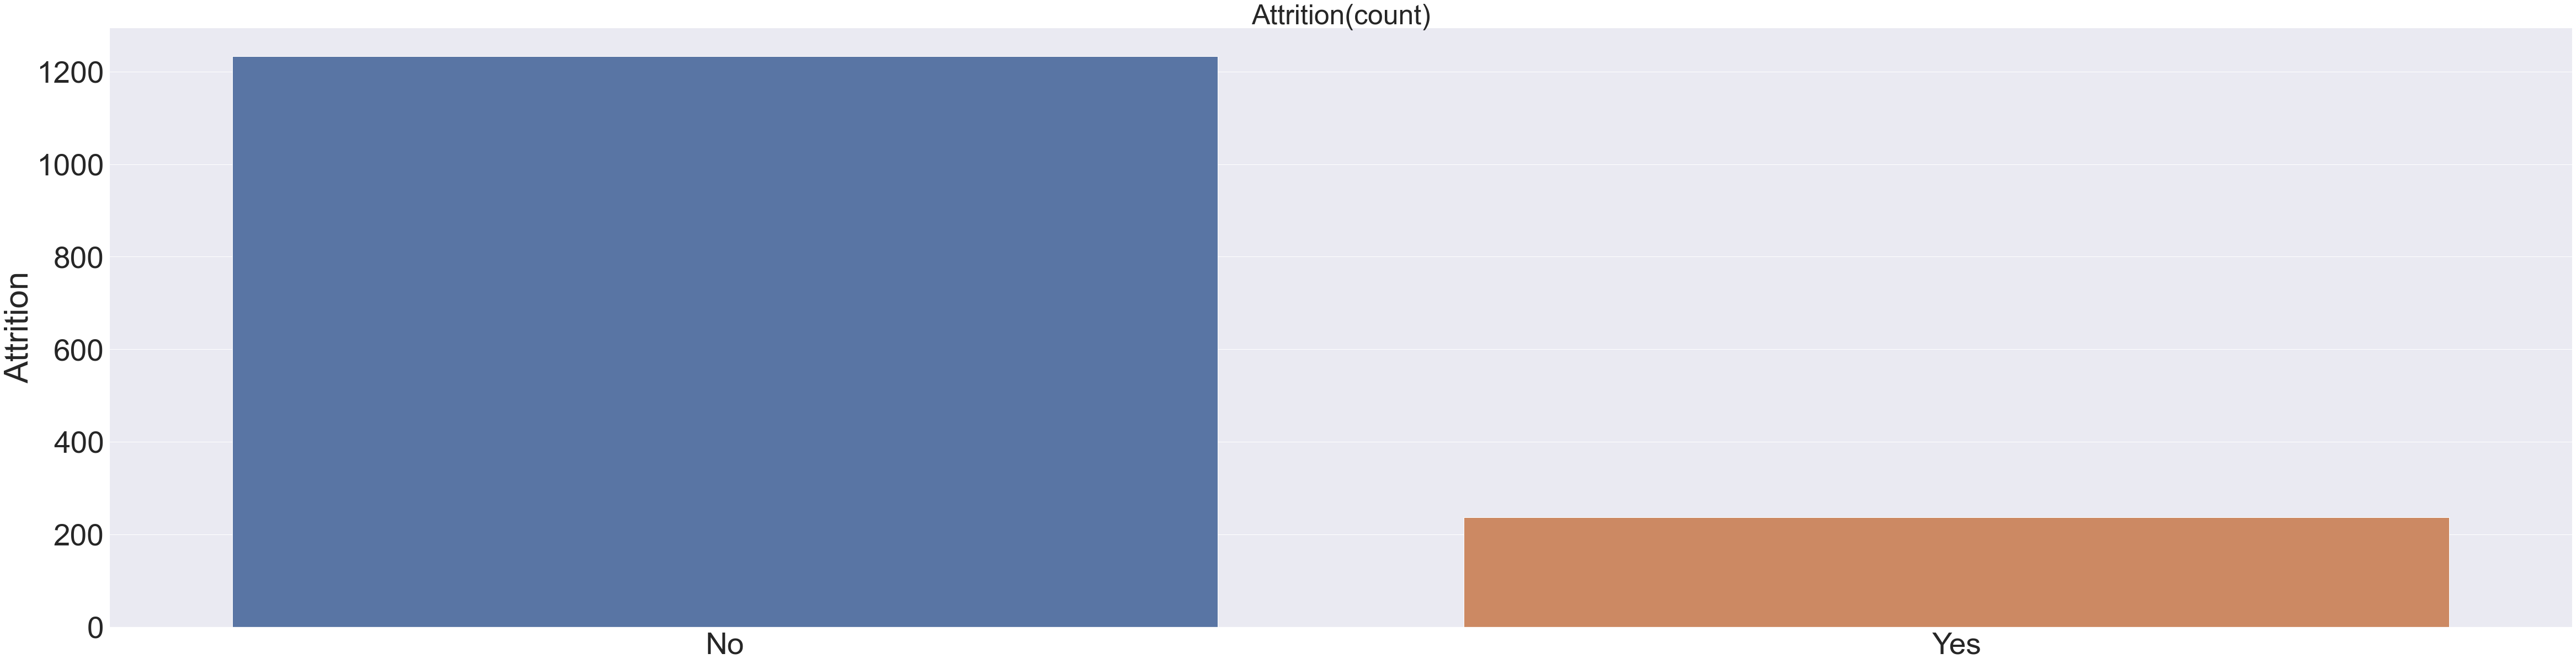

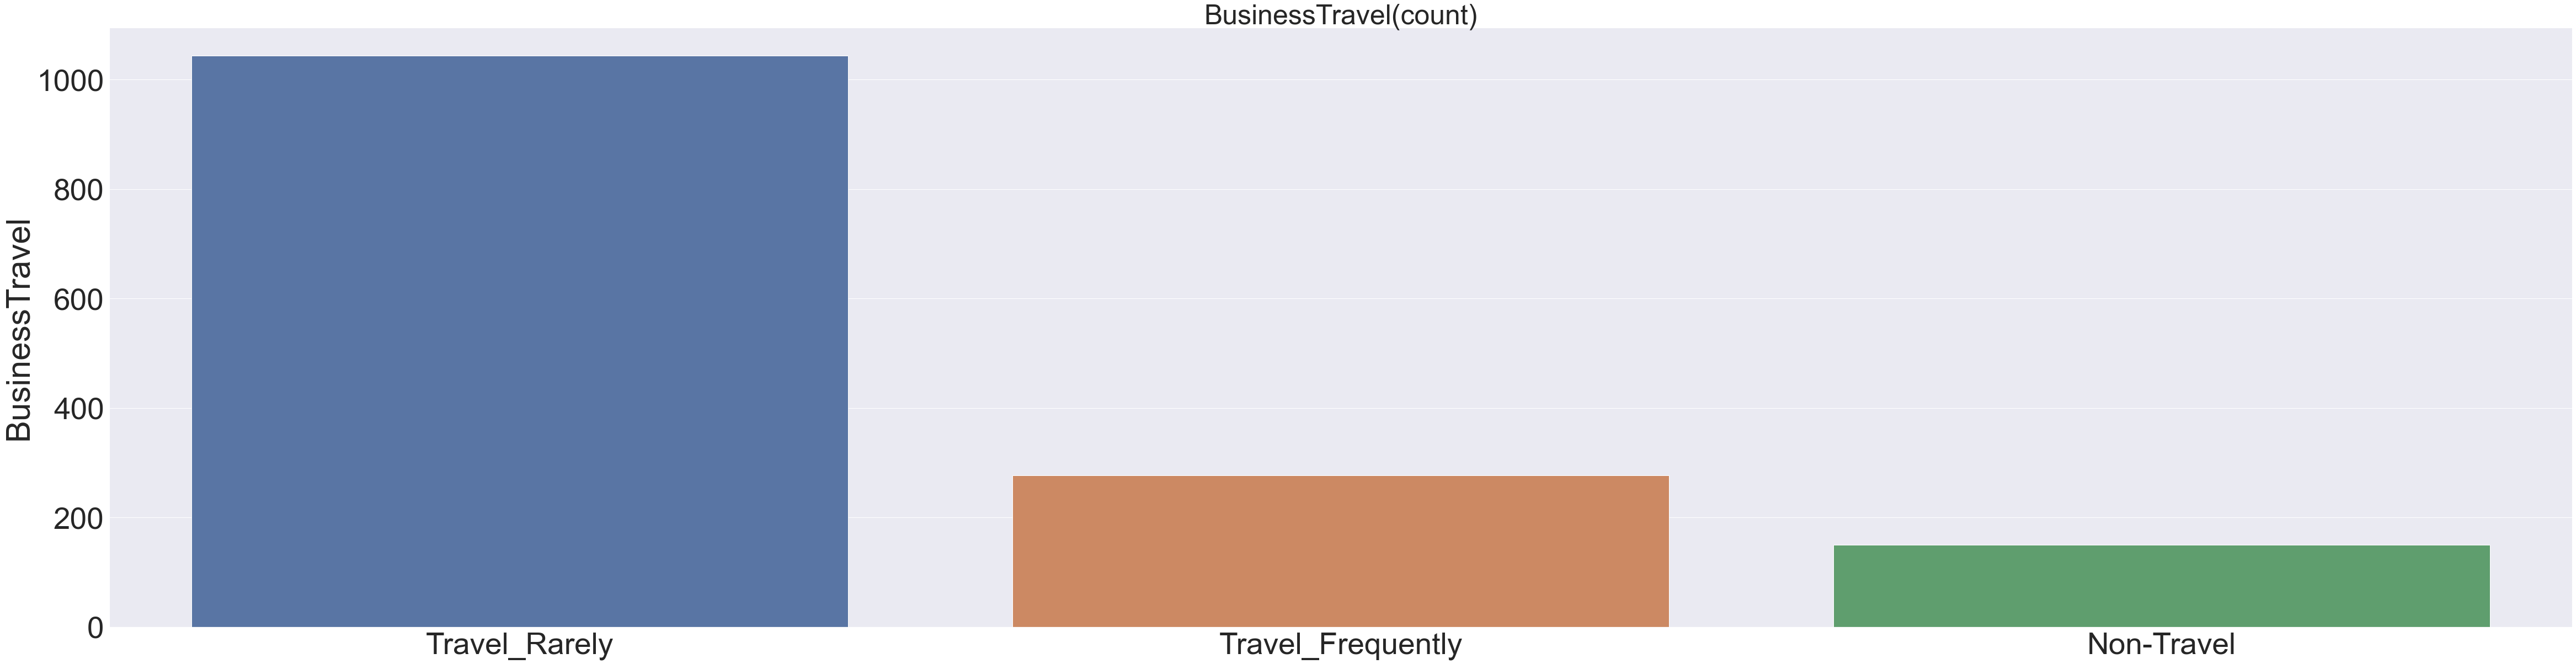

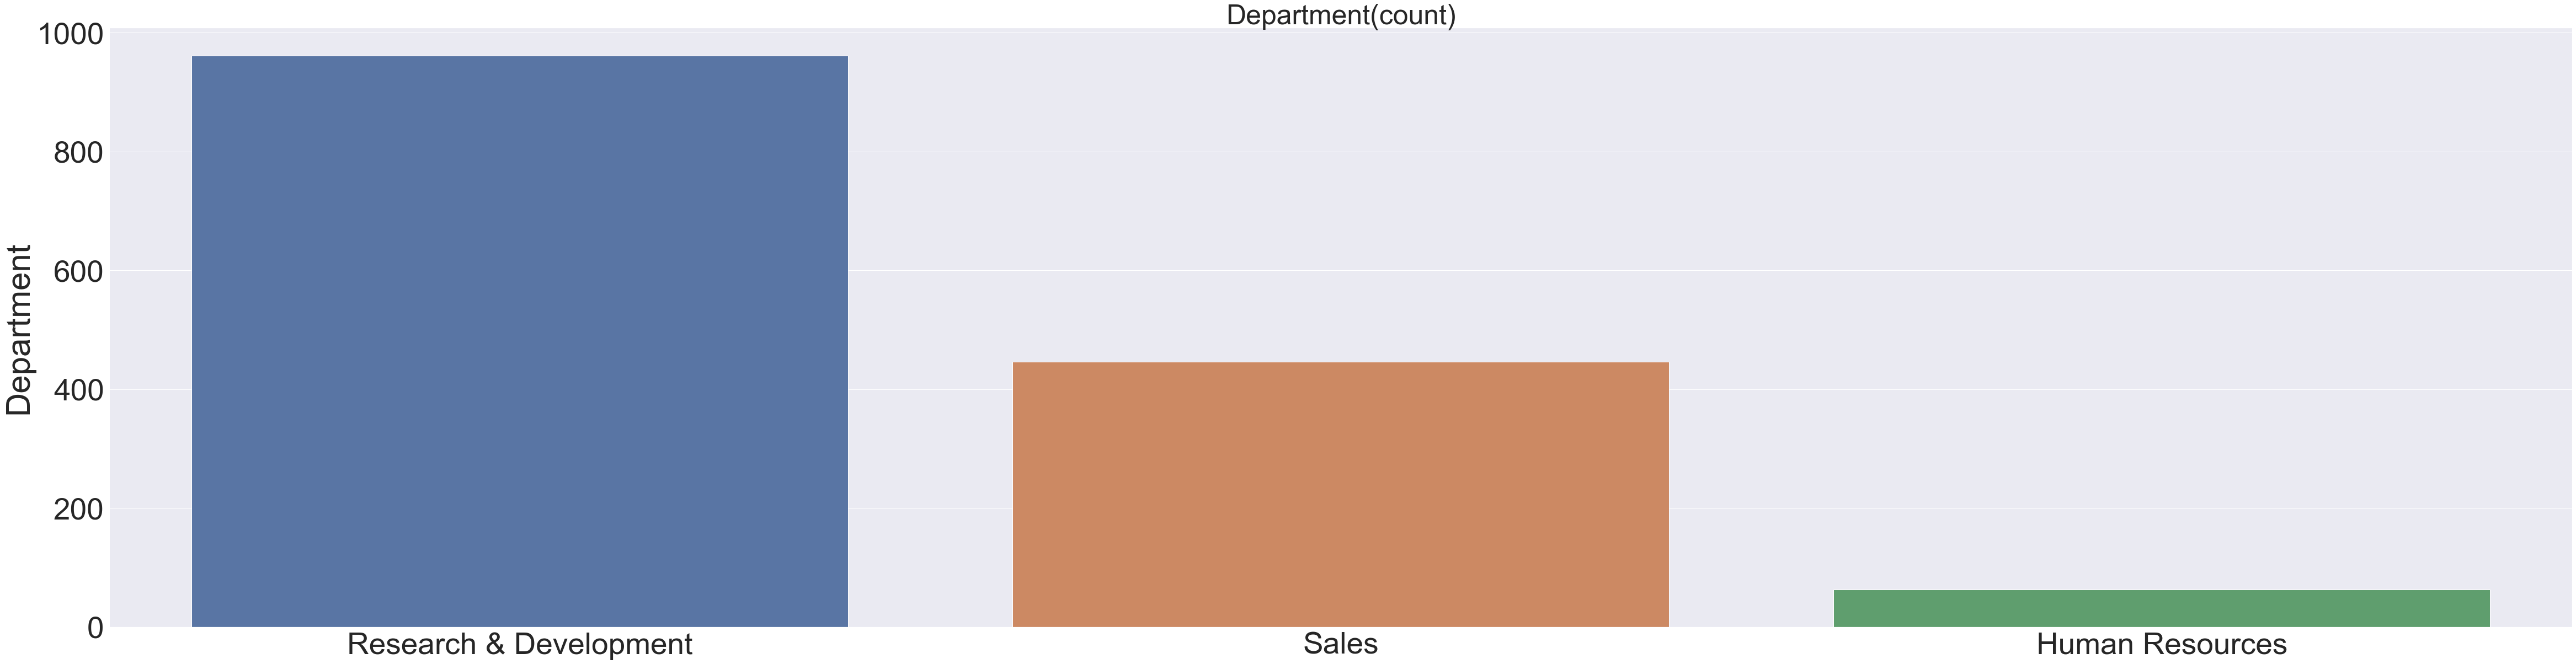

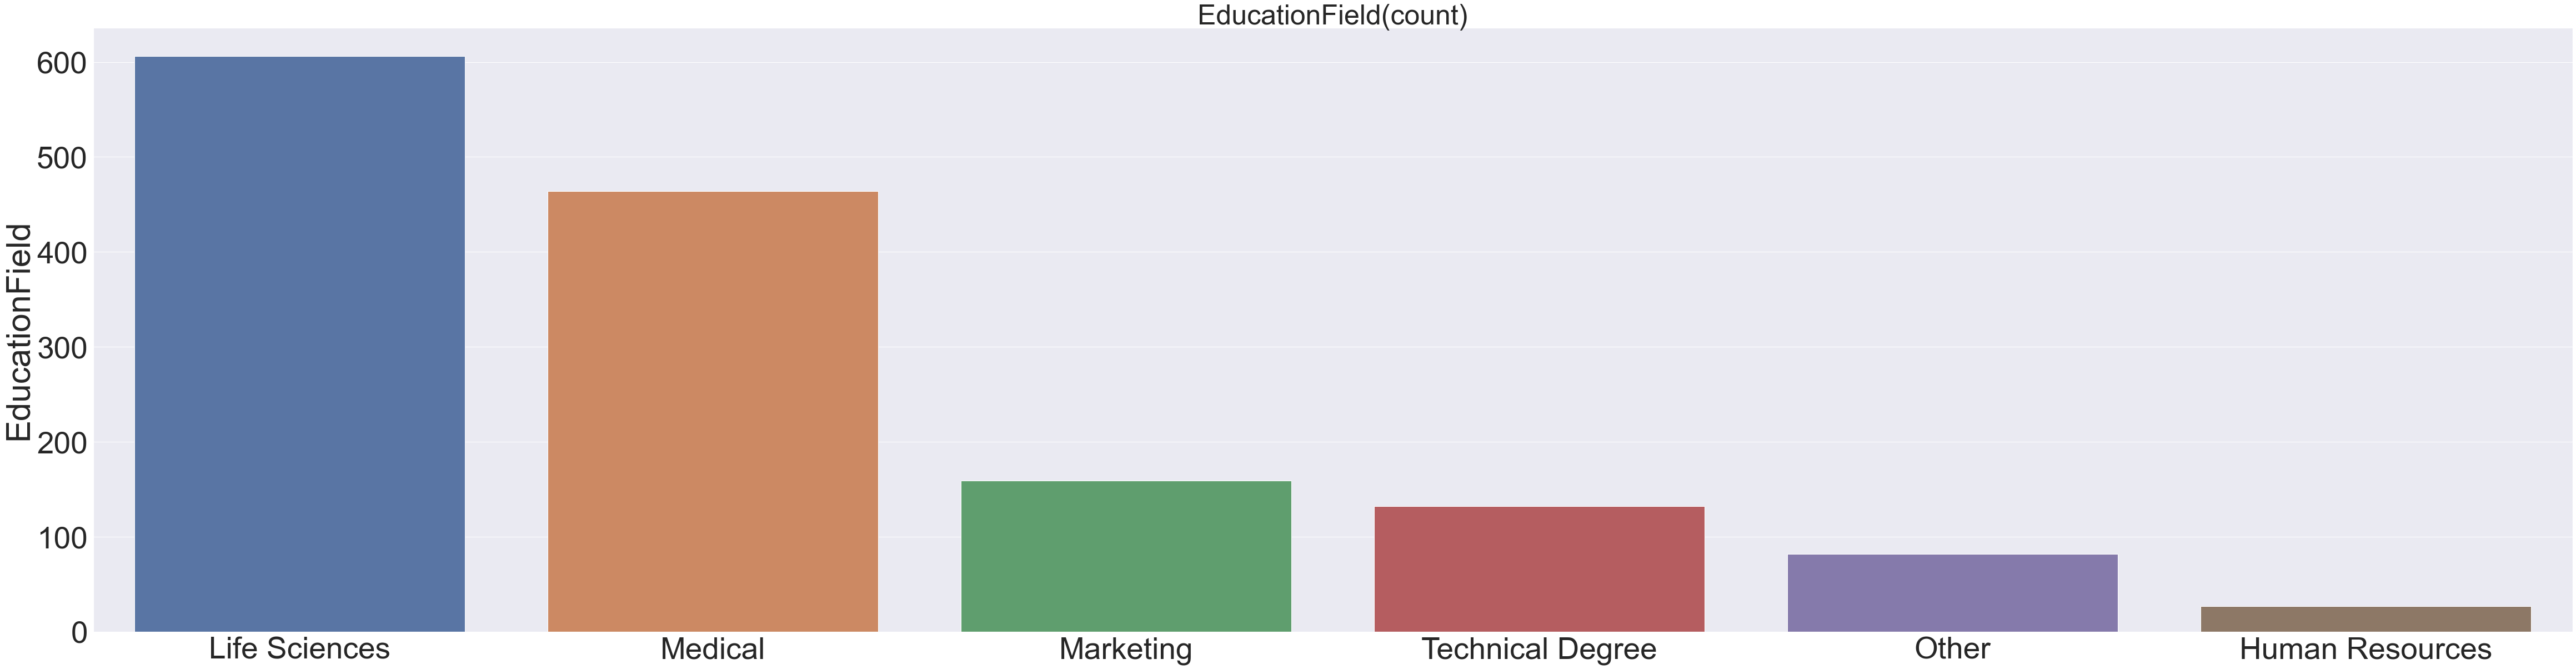

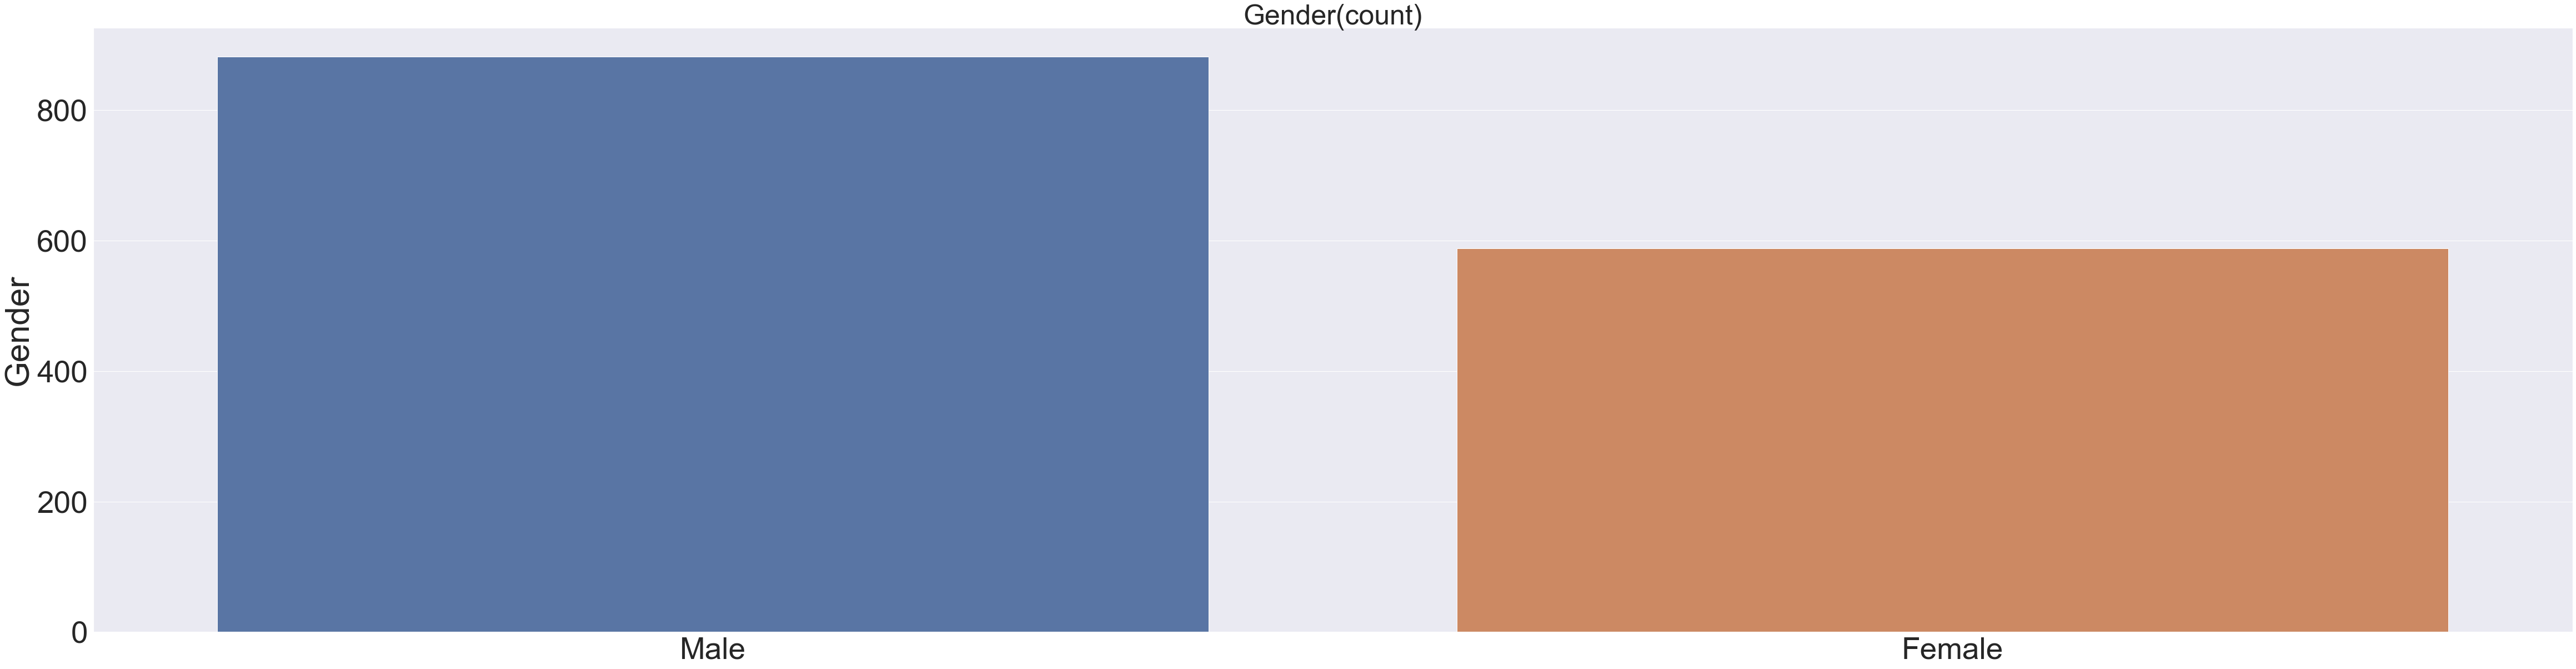

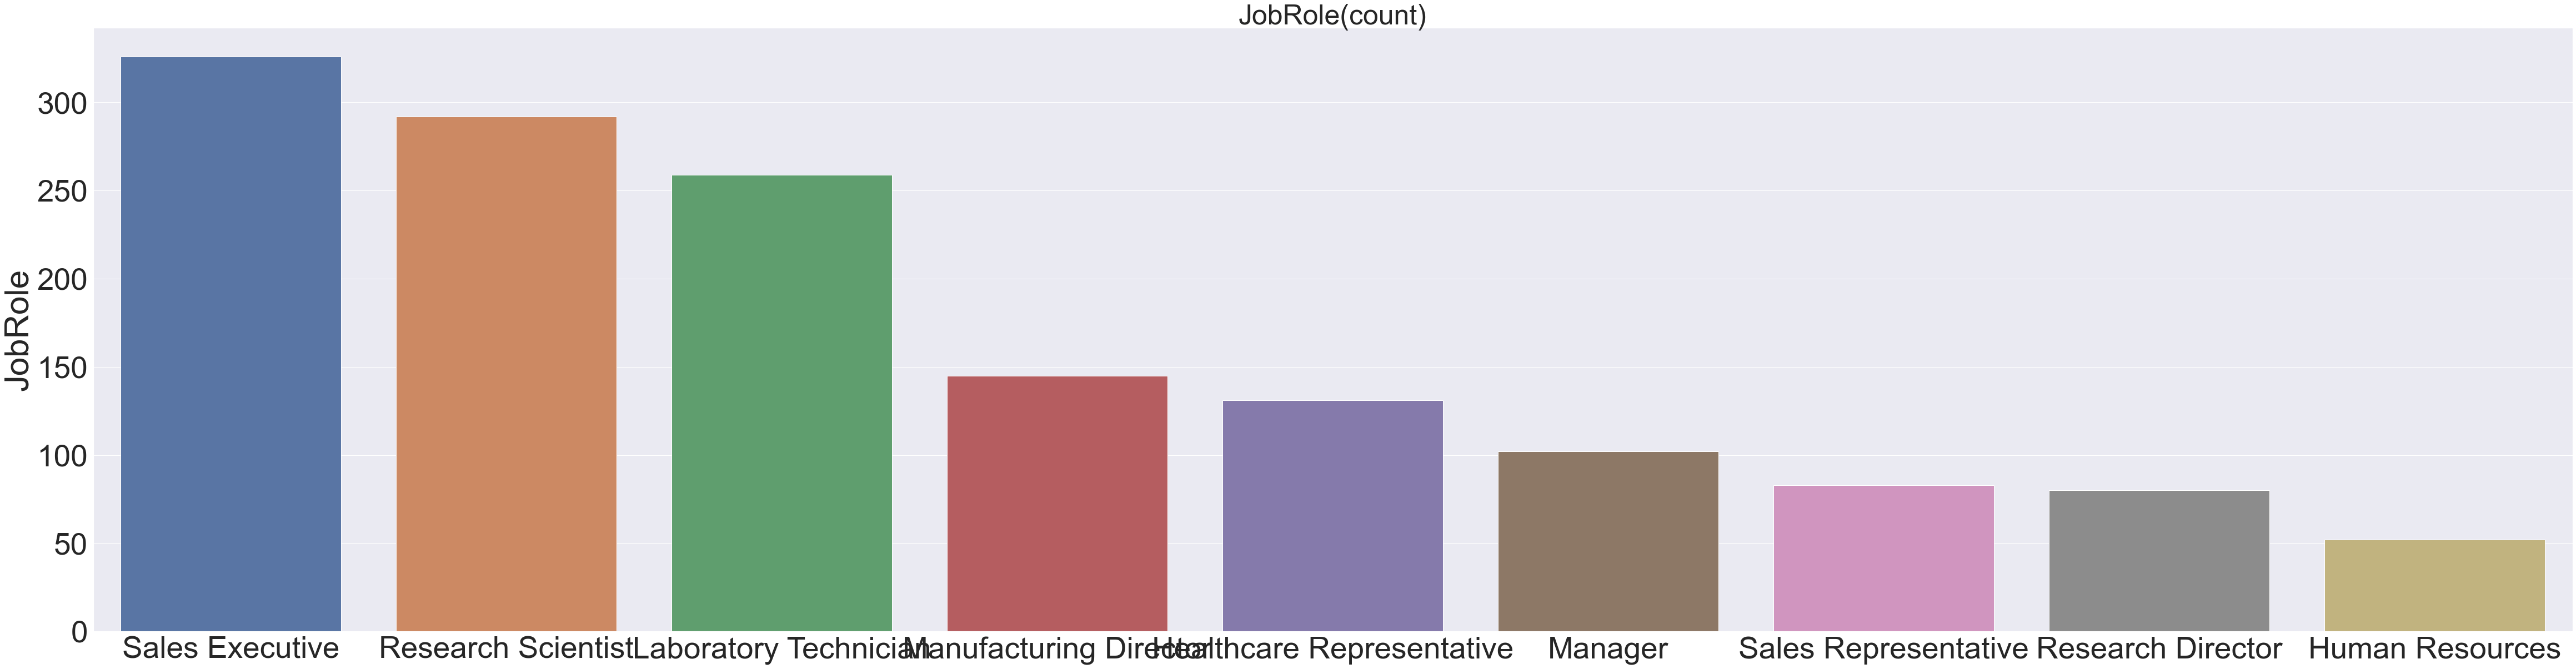

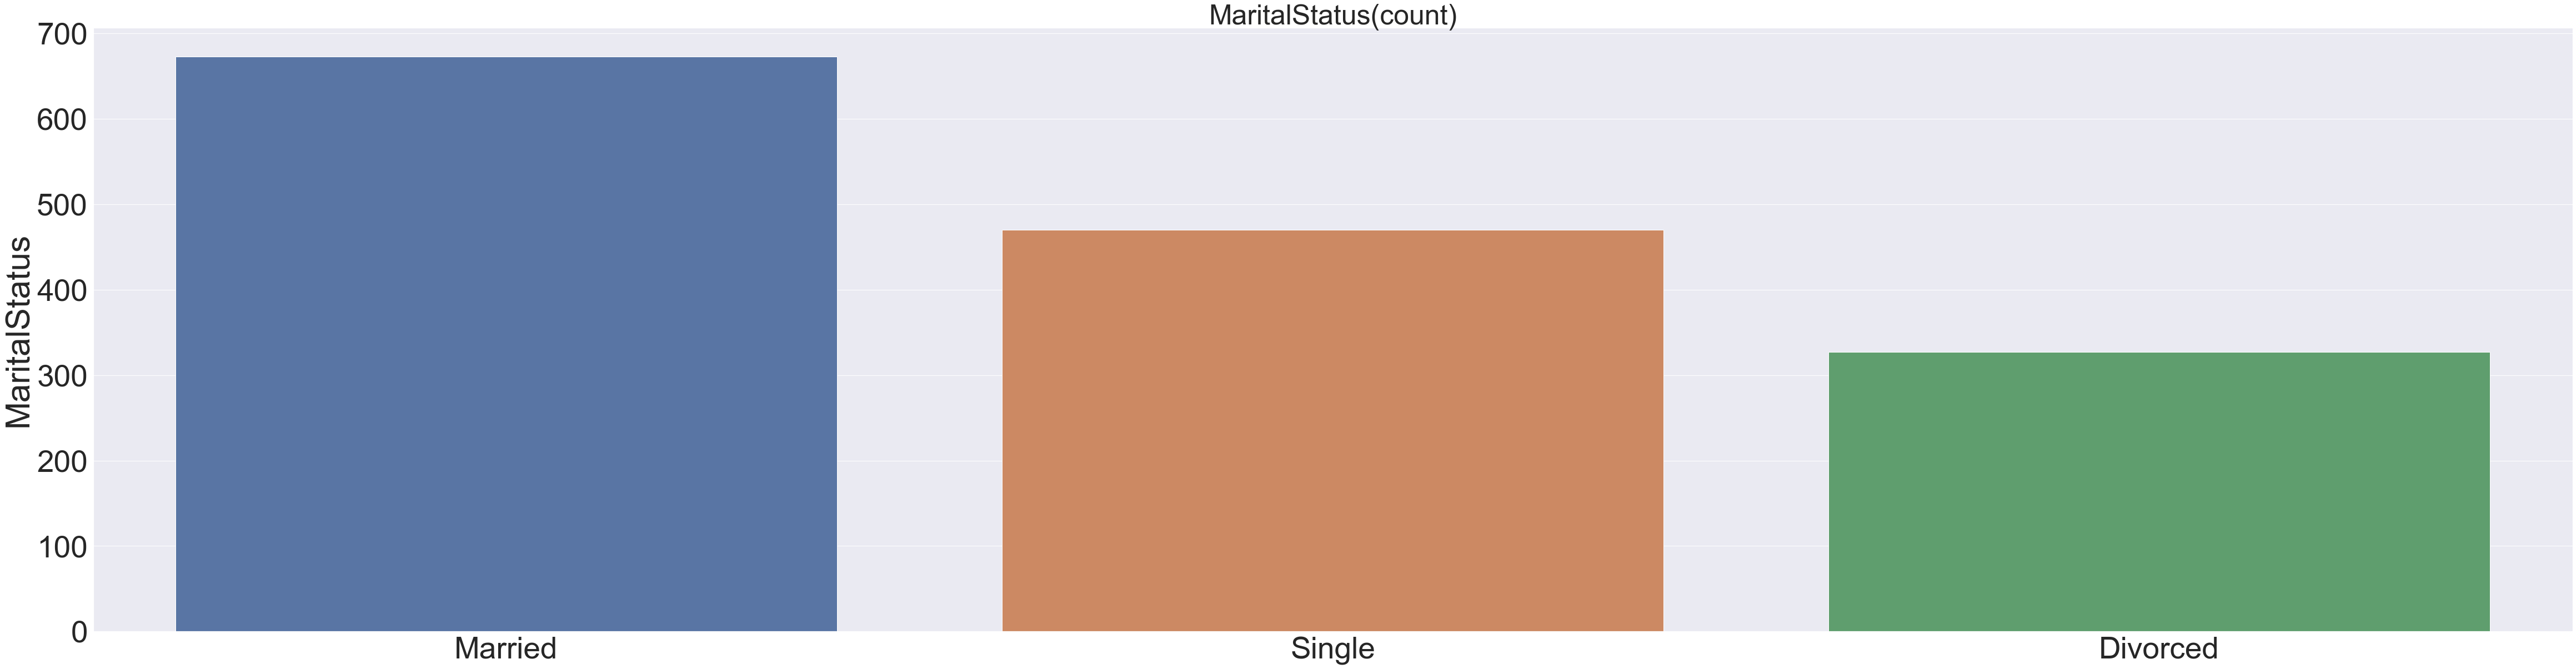

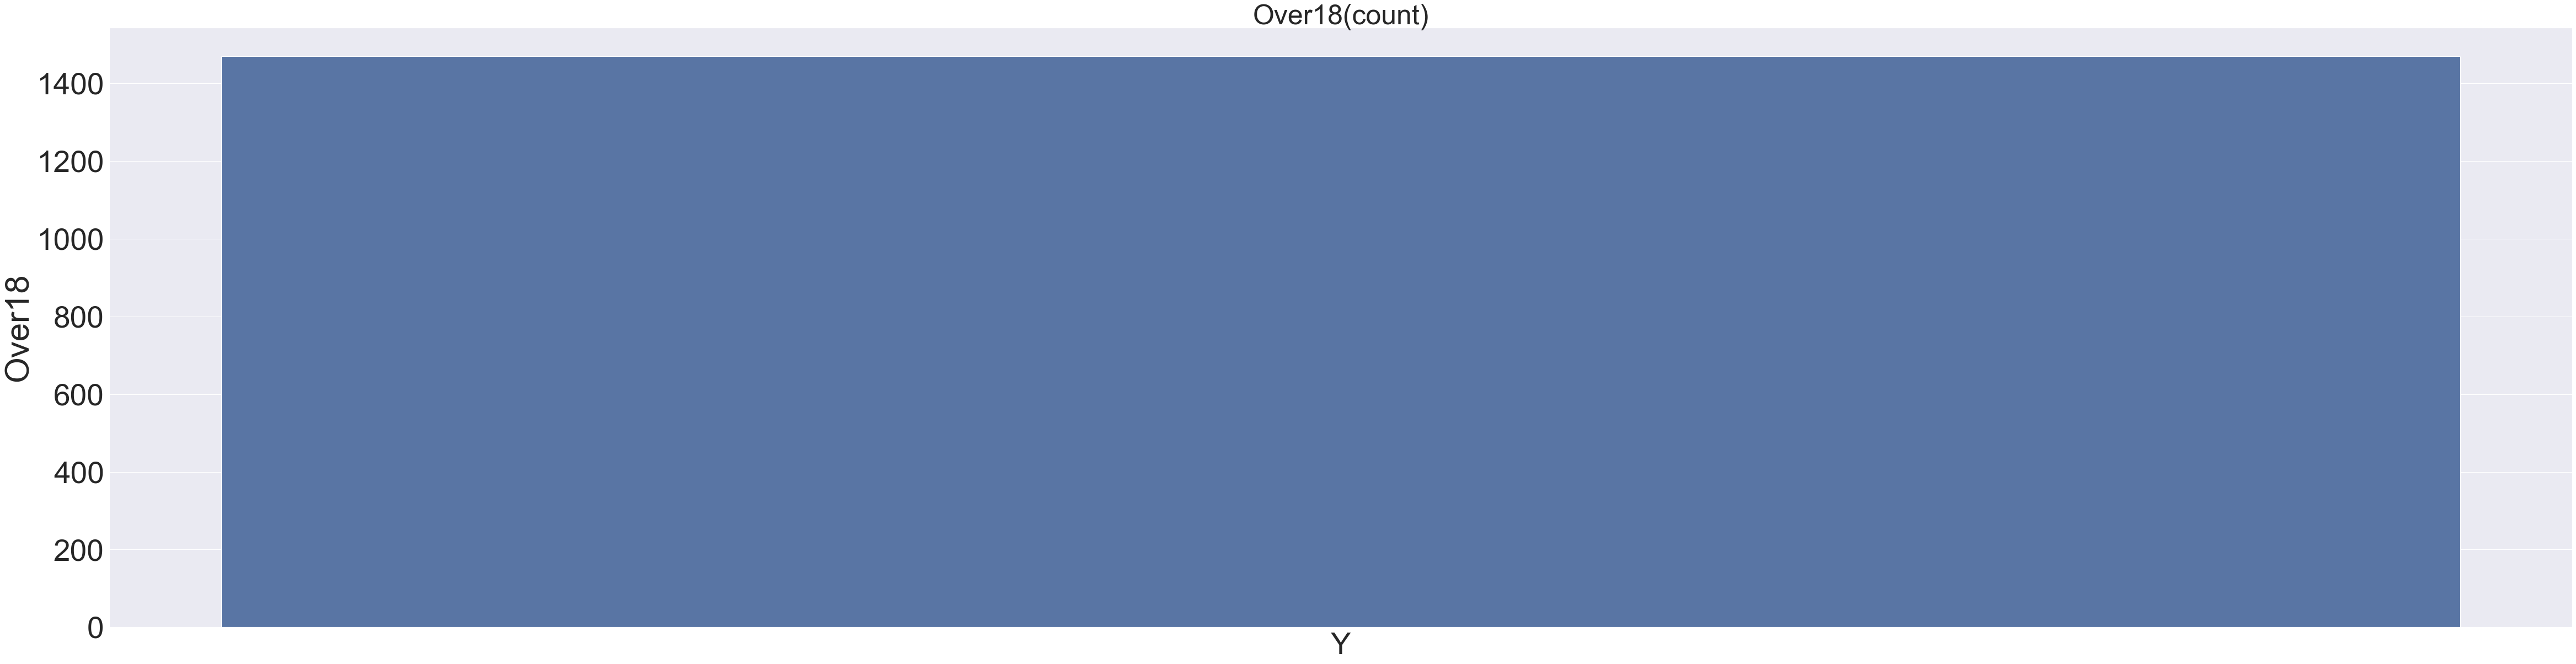

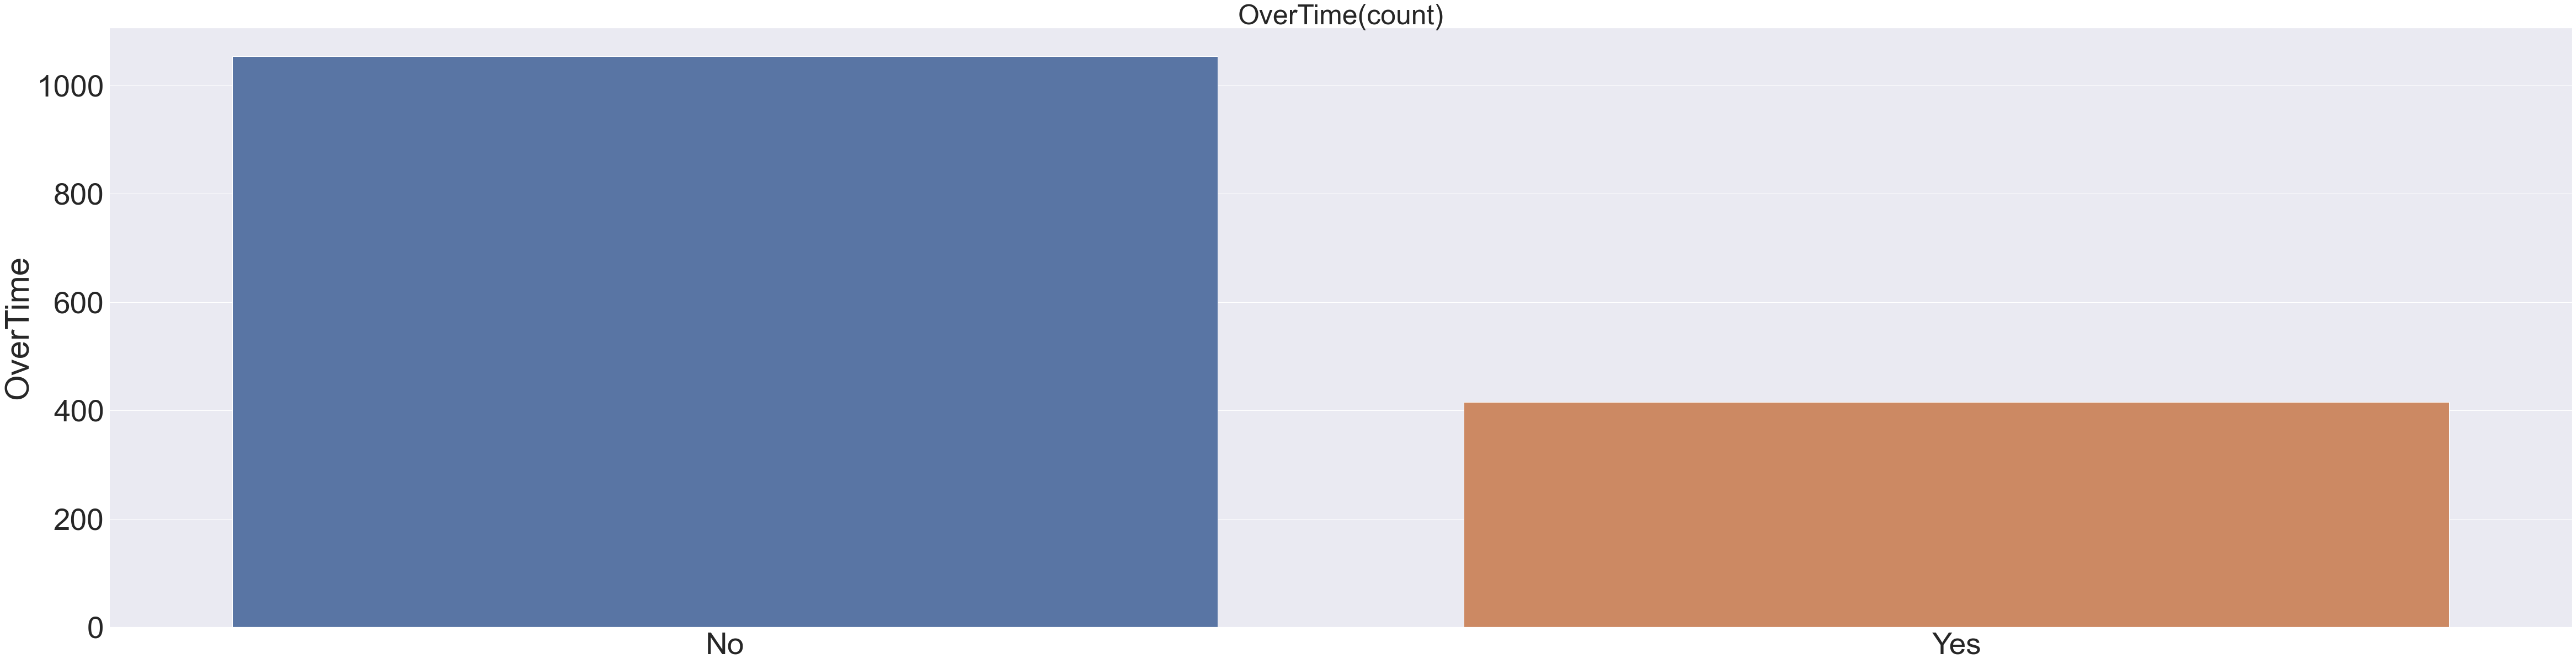

In [166]:
for i,col in enumerate(category_feature):
    vc_tmp = pd.DataFrame(data[col].value_counts())
    plt.figure(figsize=(80, 20), facecolor='white')
    sns.barplot(x= vc_tmp.index, y=vc_tmp[col])
    plt.title("%s(count)"%col, fontsize=50)
    plt.show()

#### 2. 범주형 변수 barplot - 비율

In [178]:
sns.set(font_scale = 5)

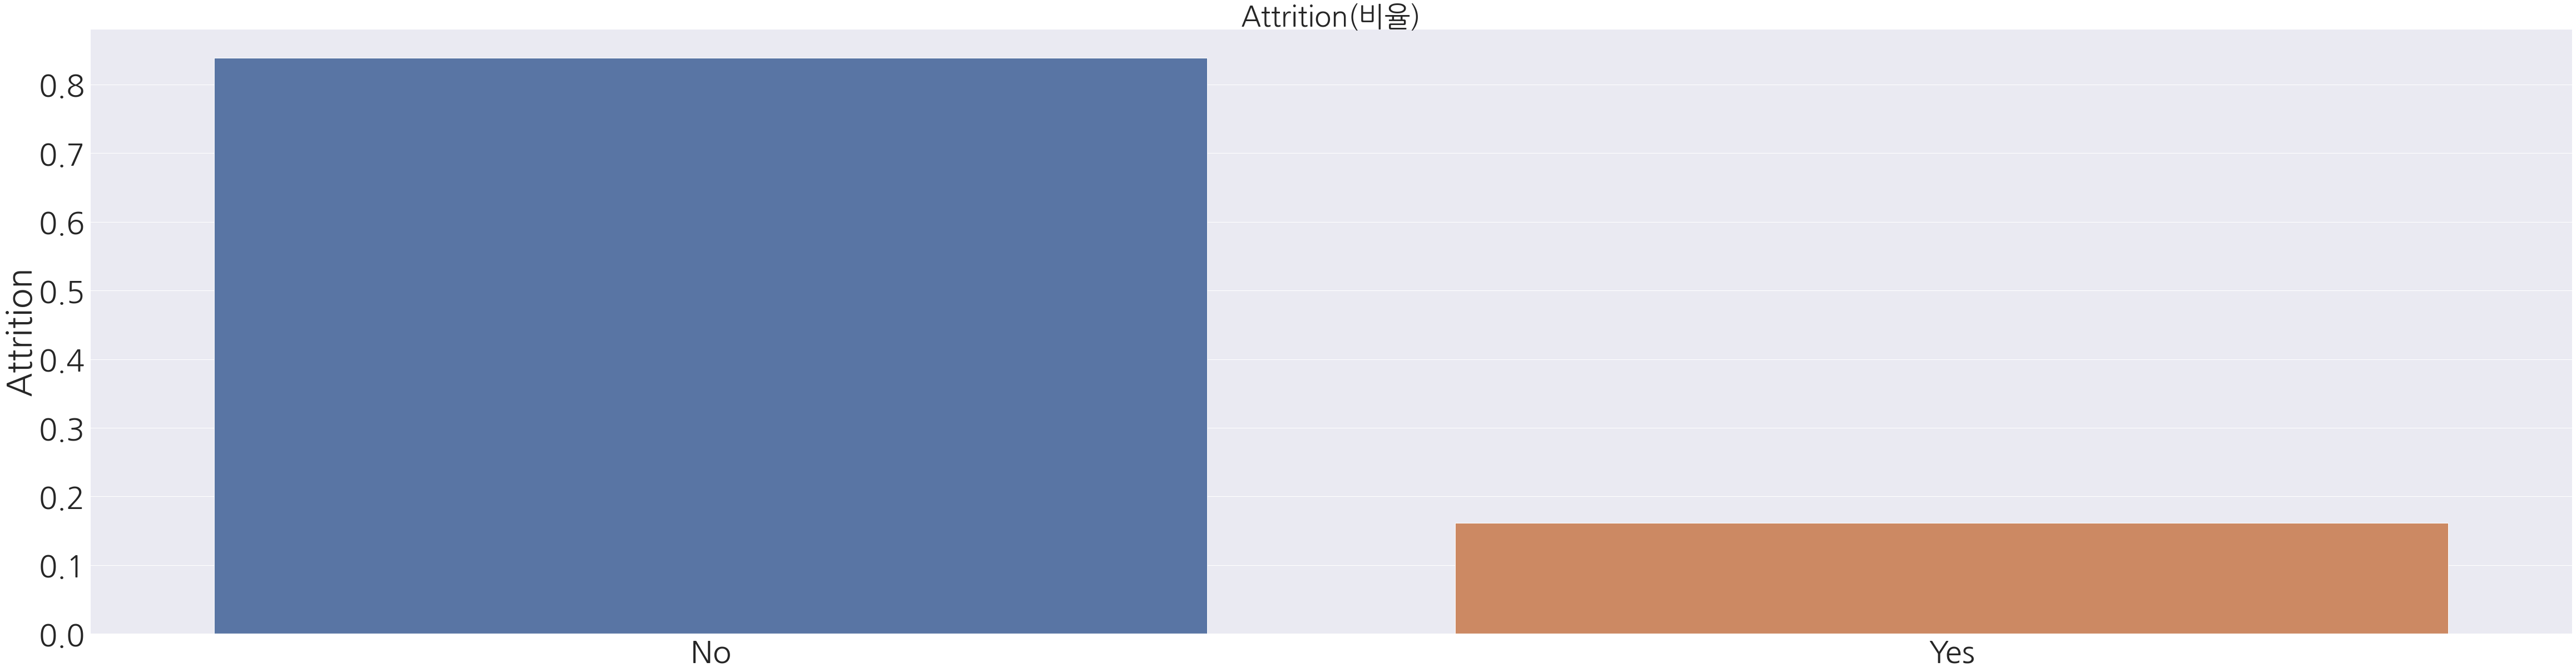

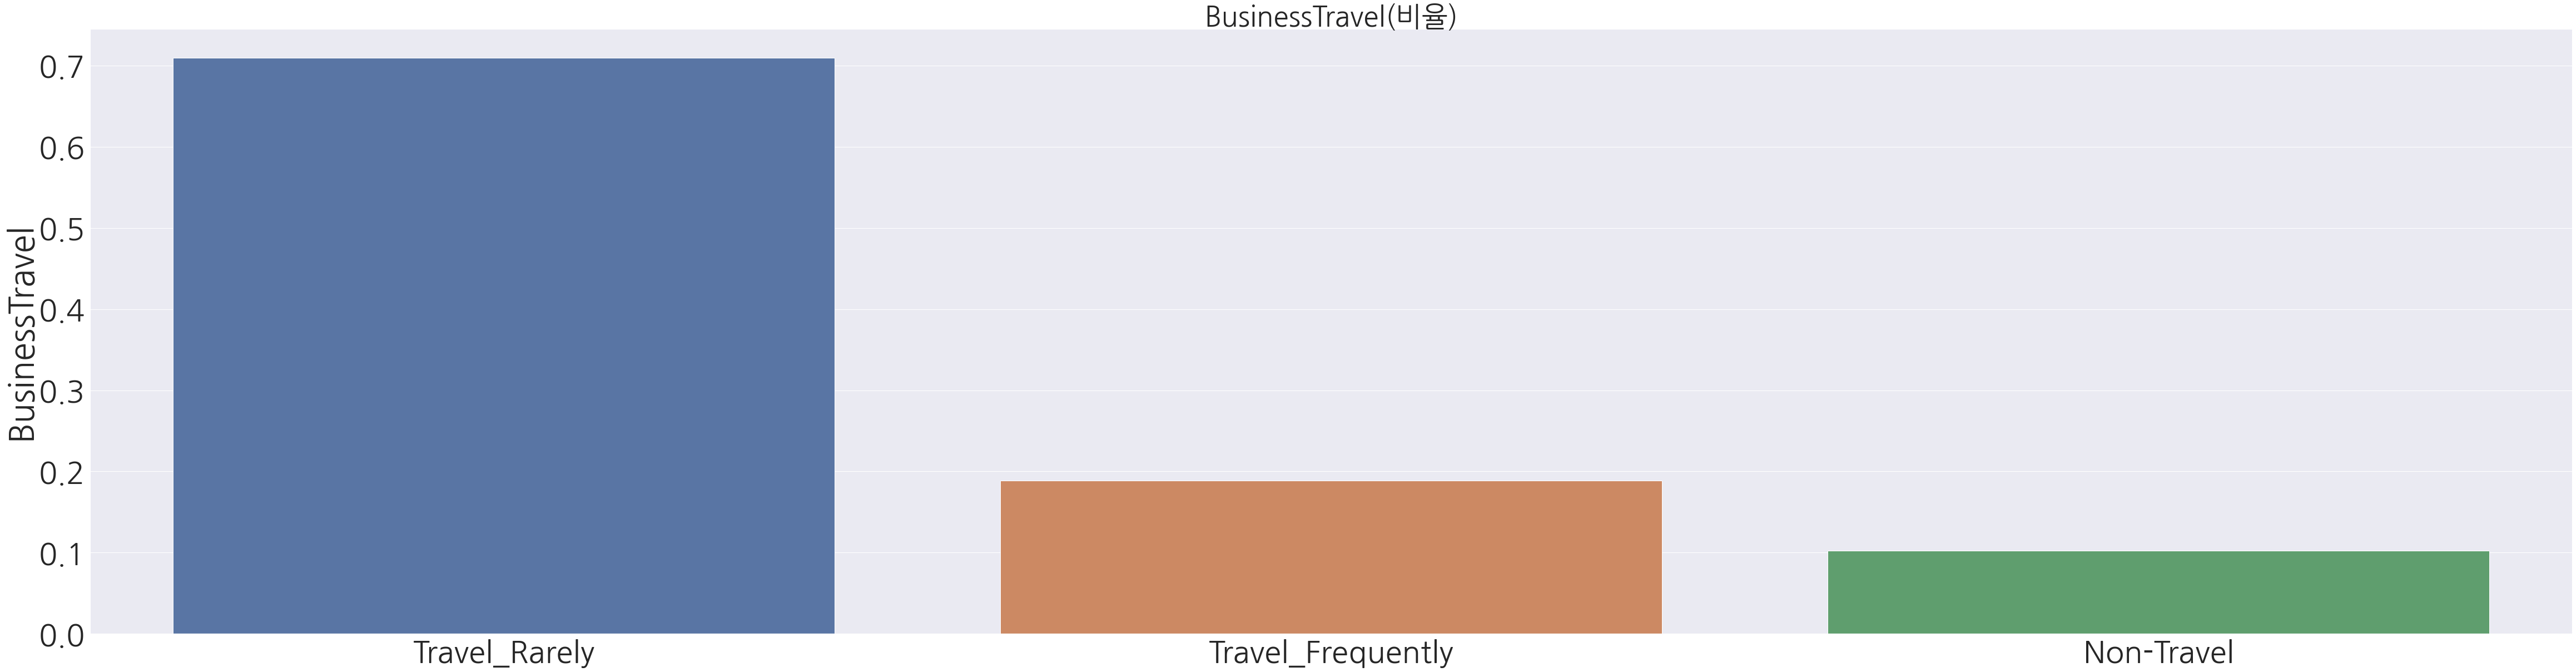

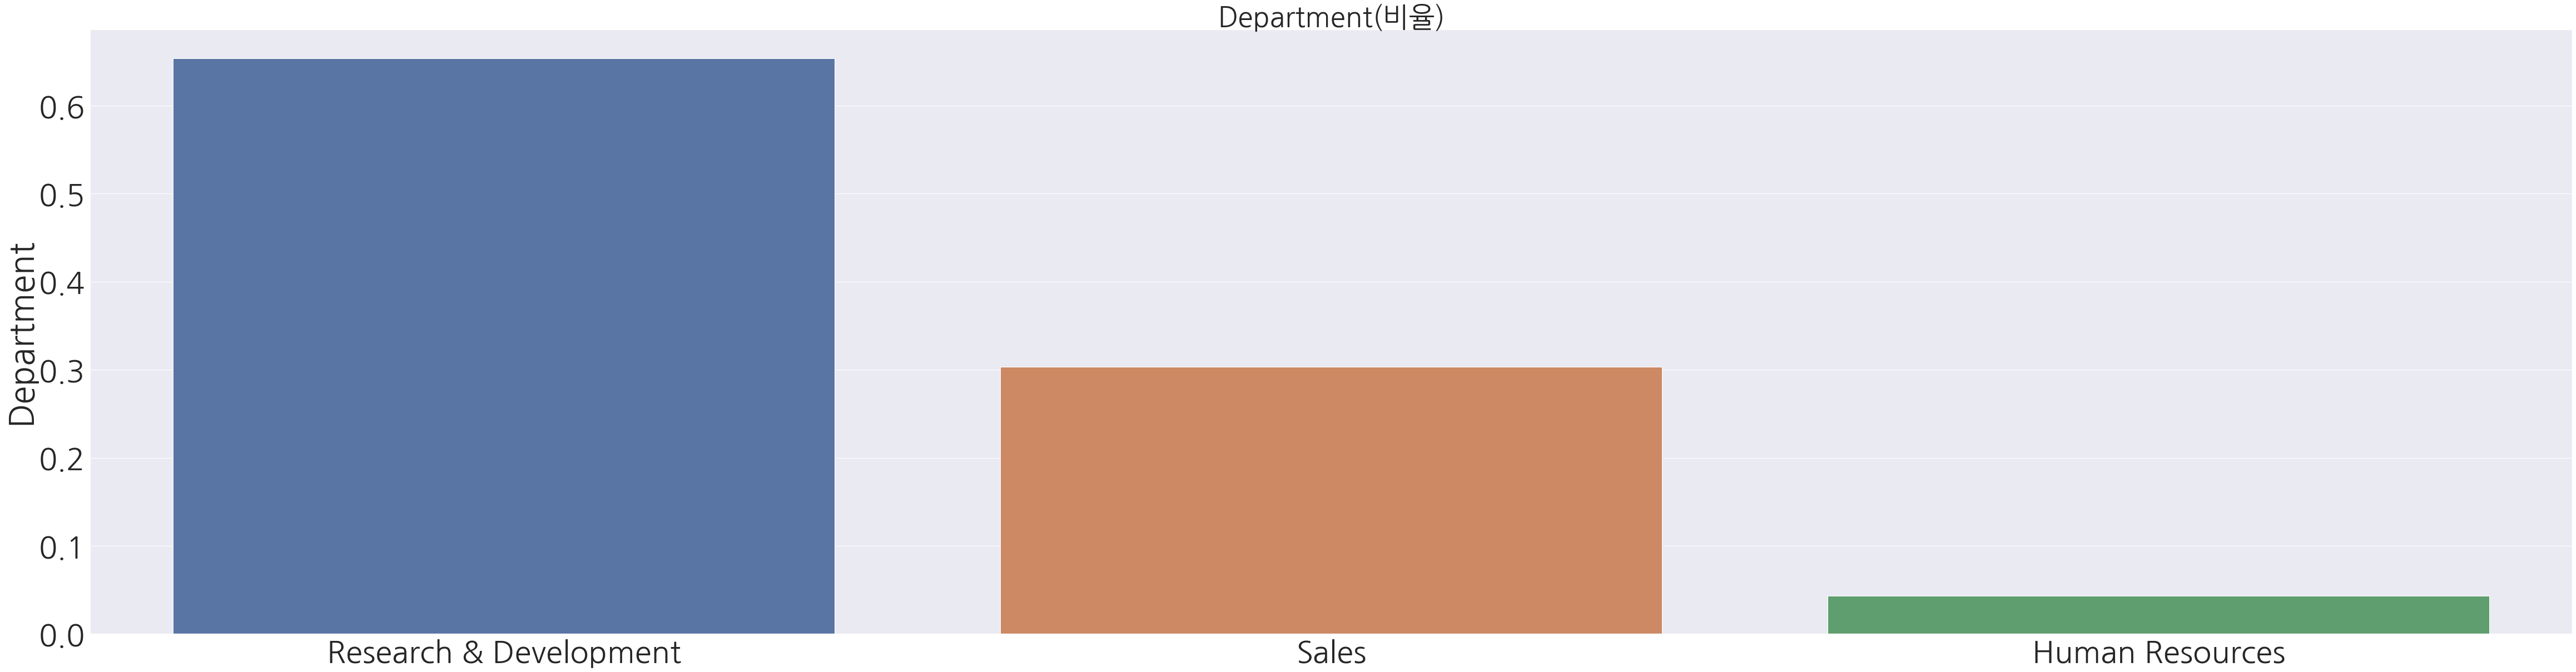

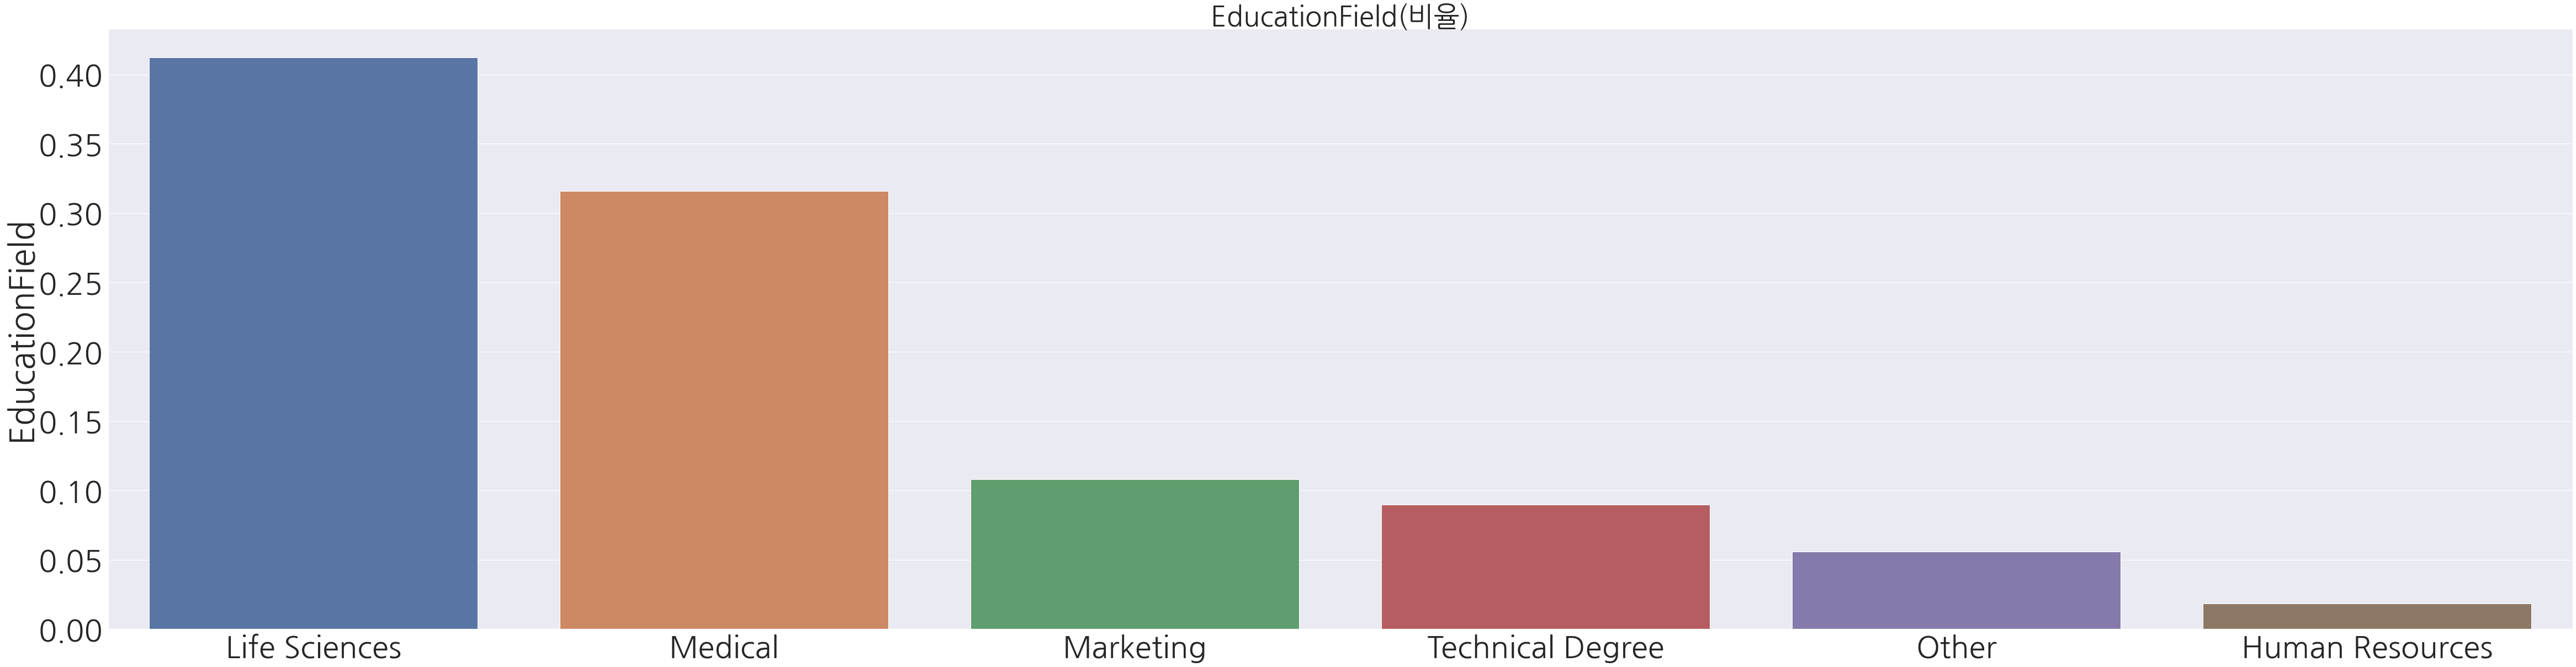

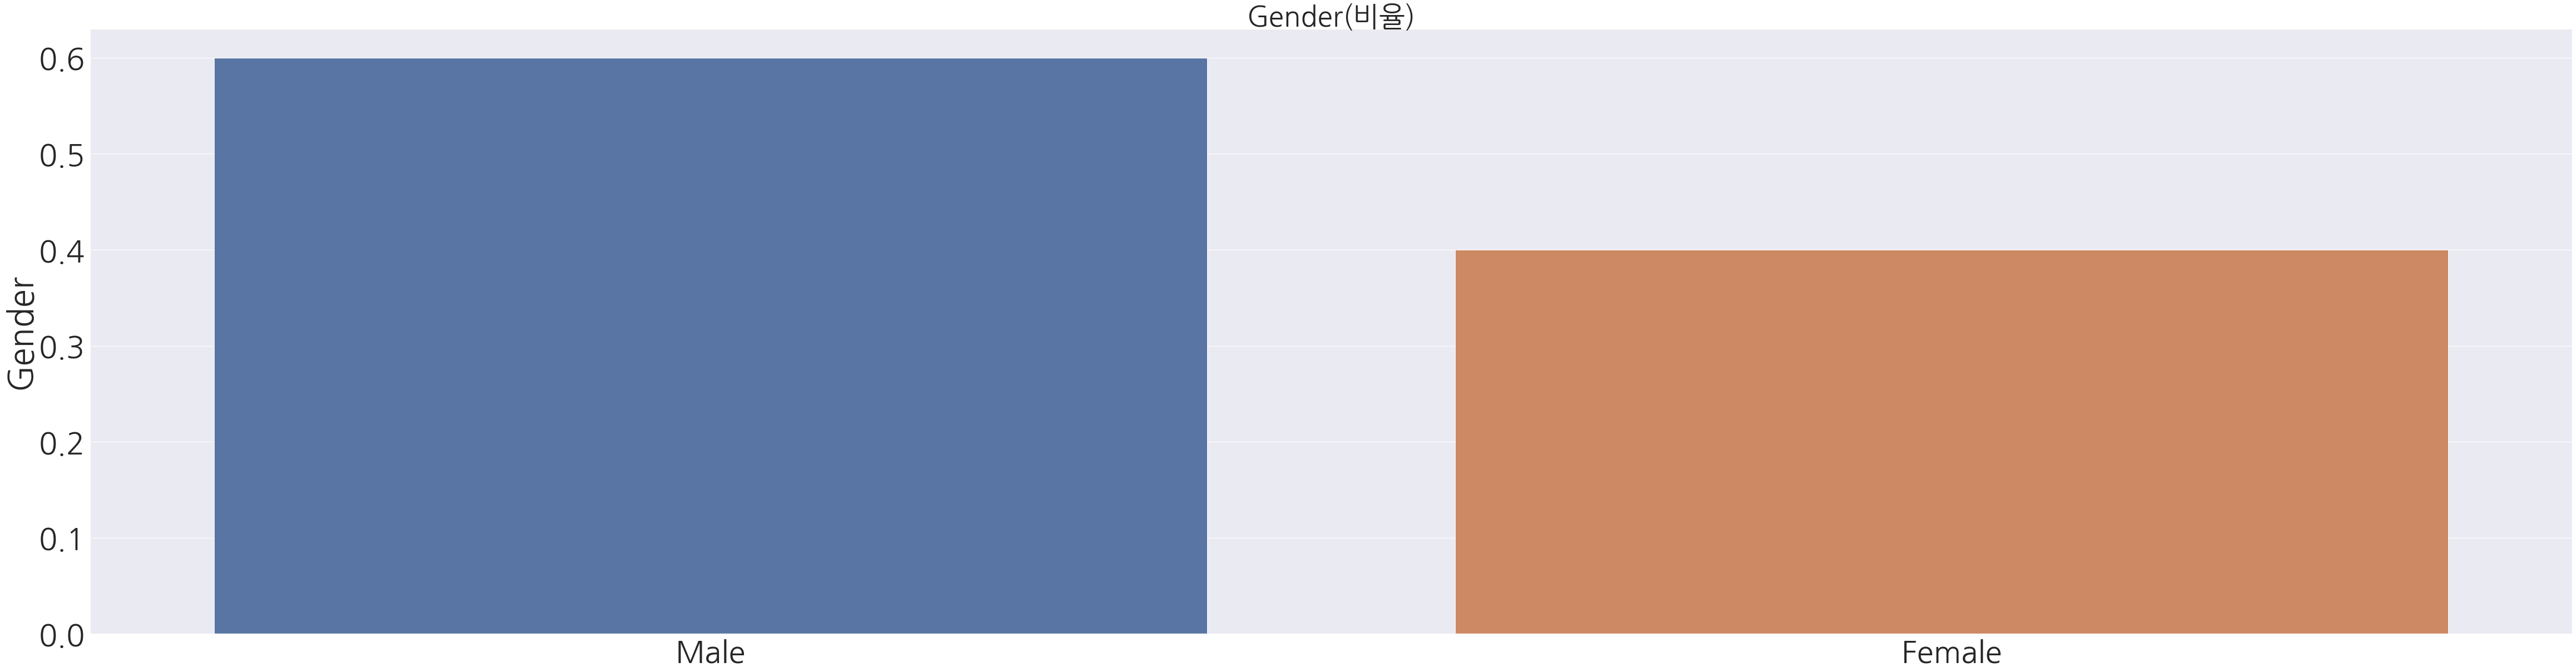

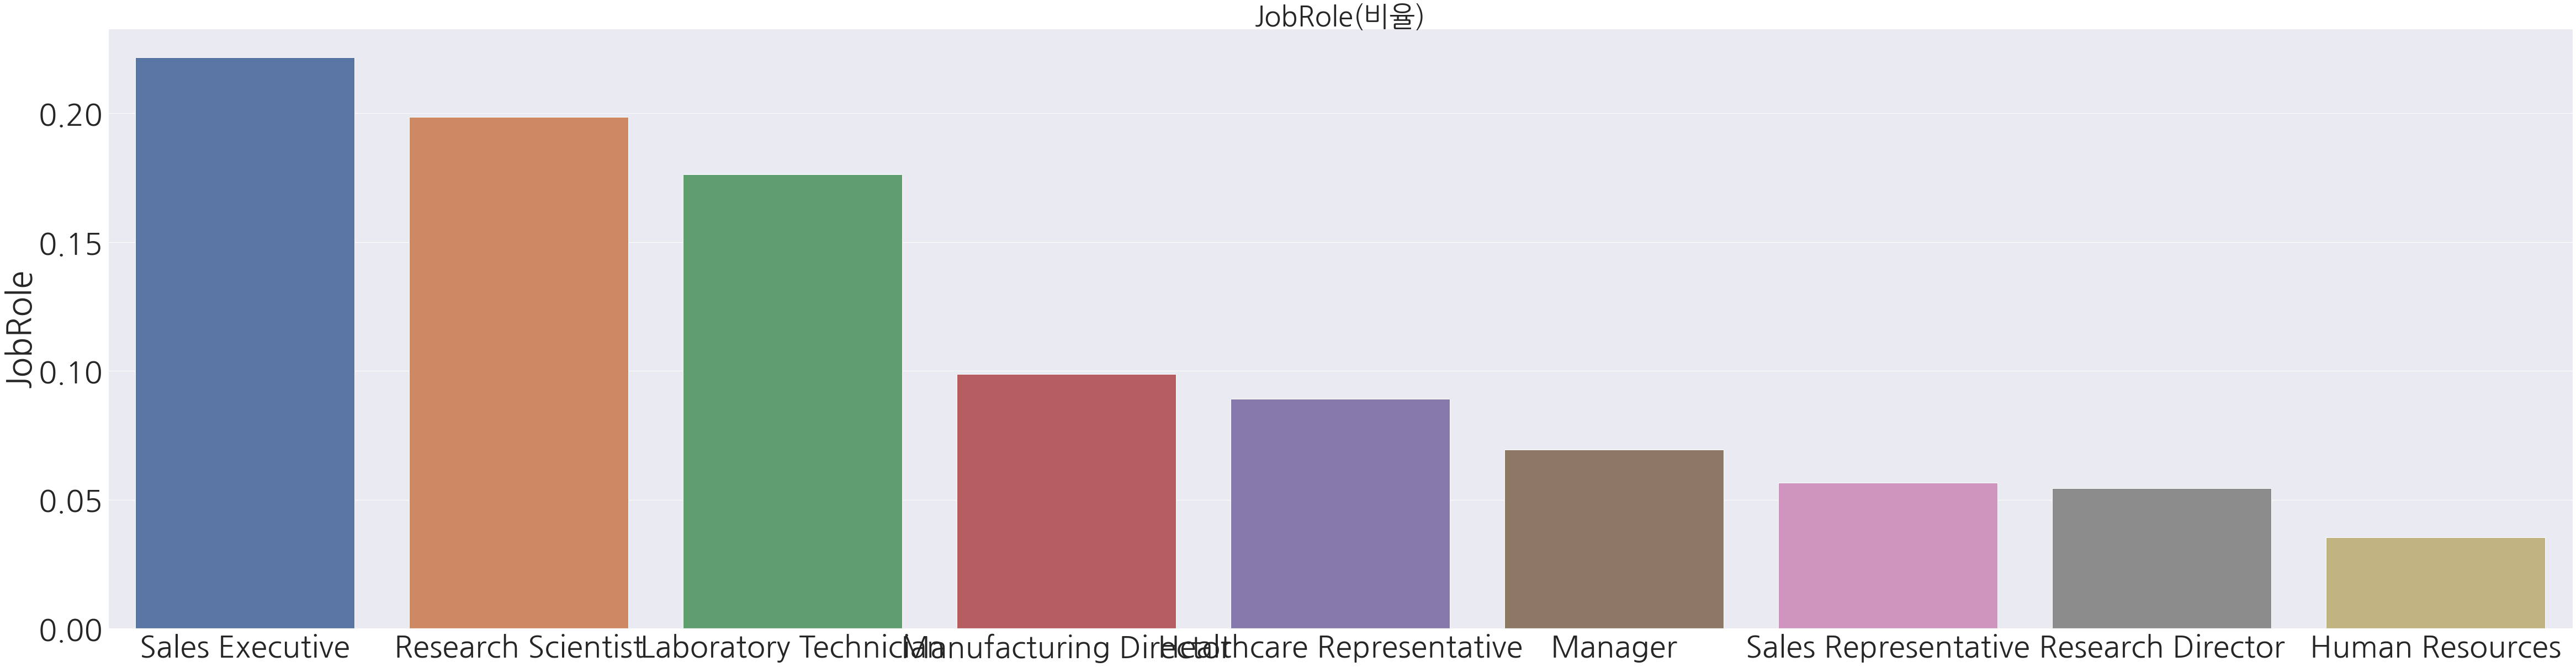

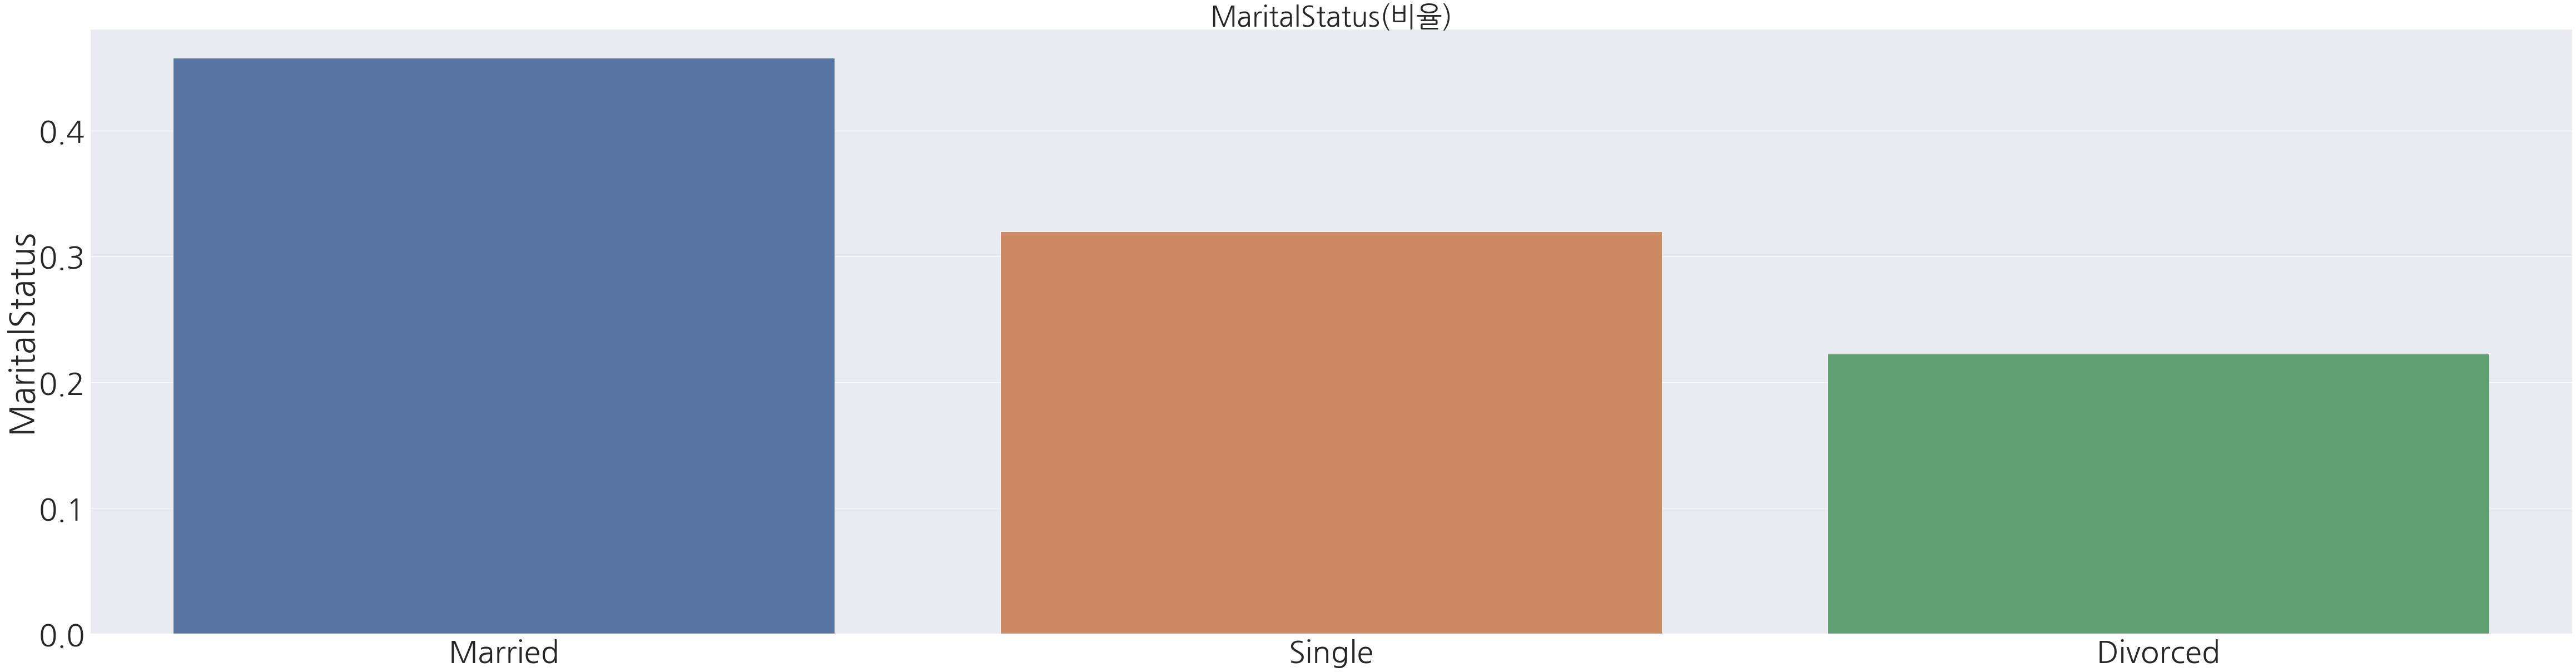

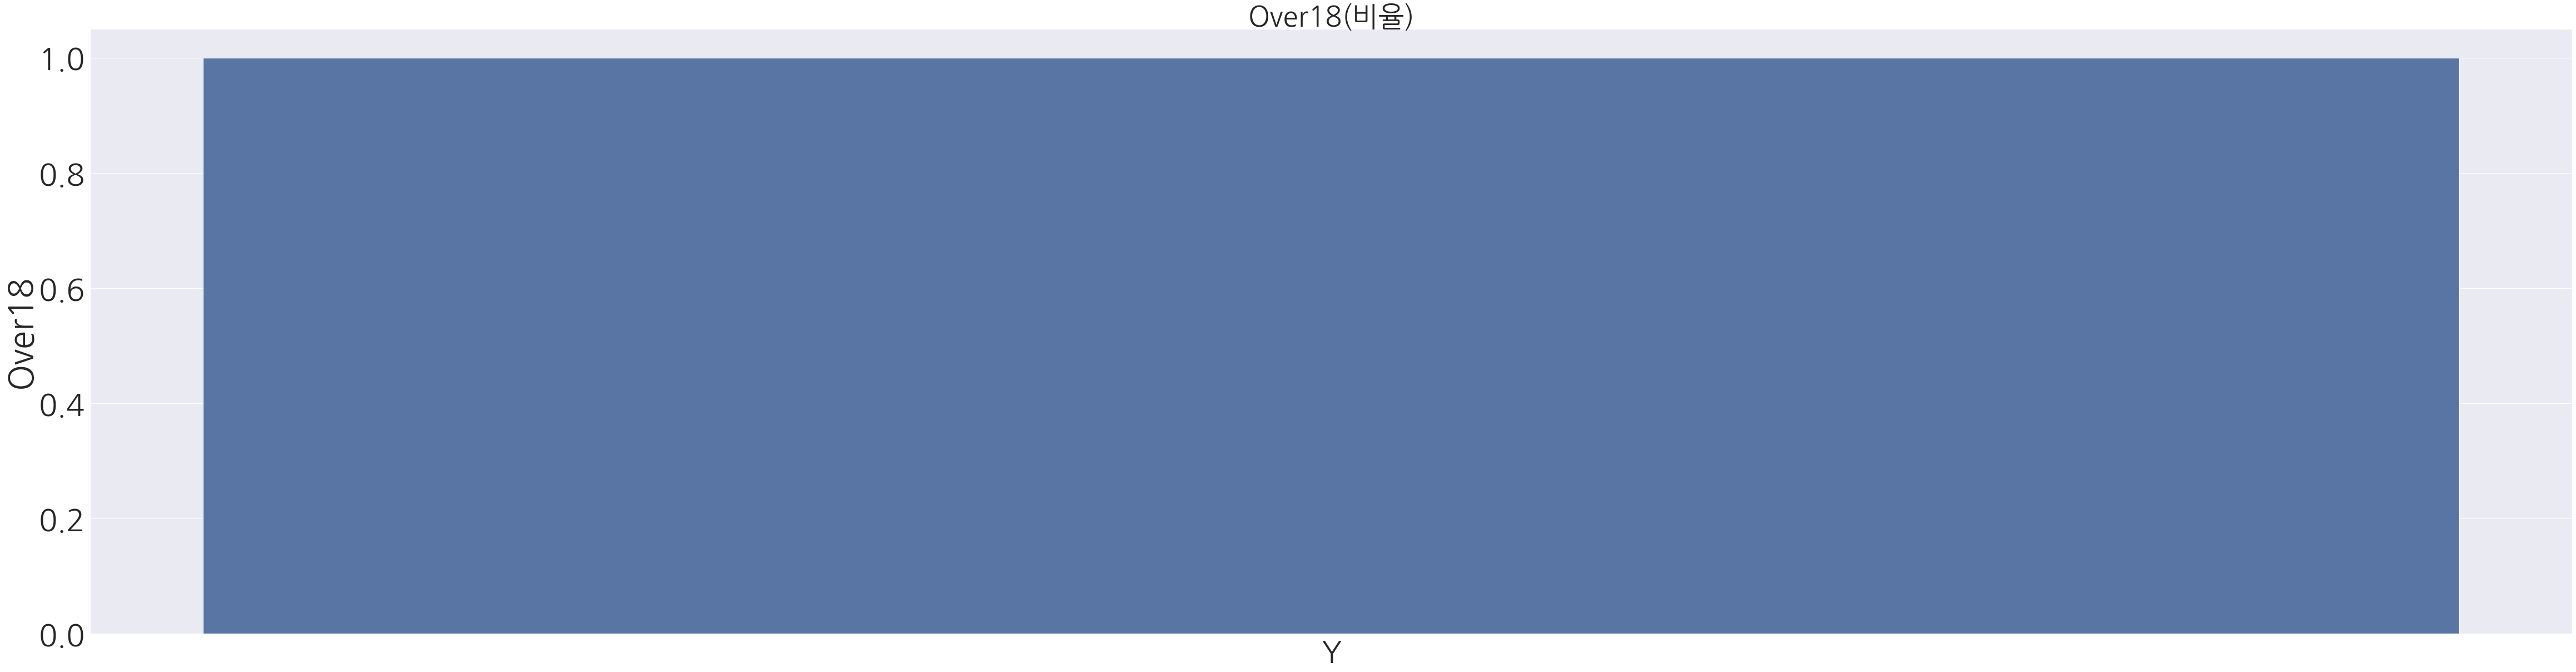

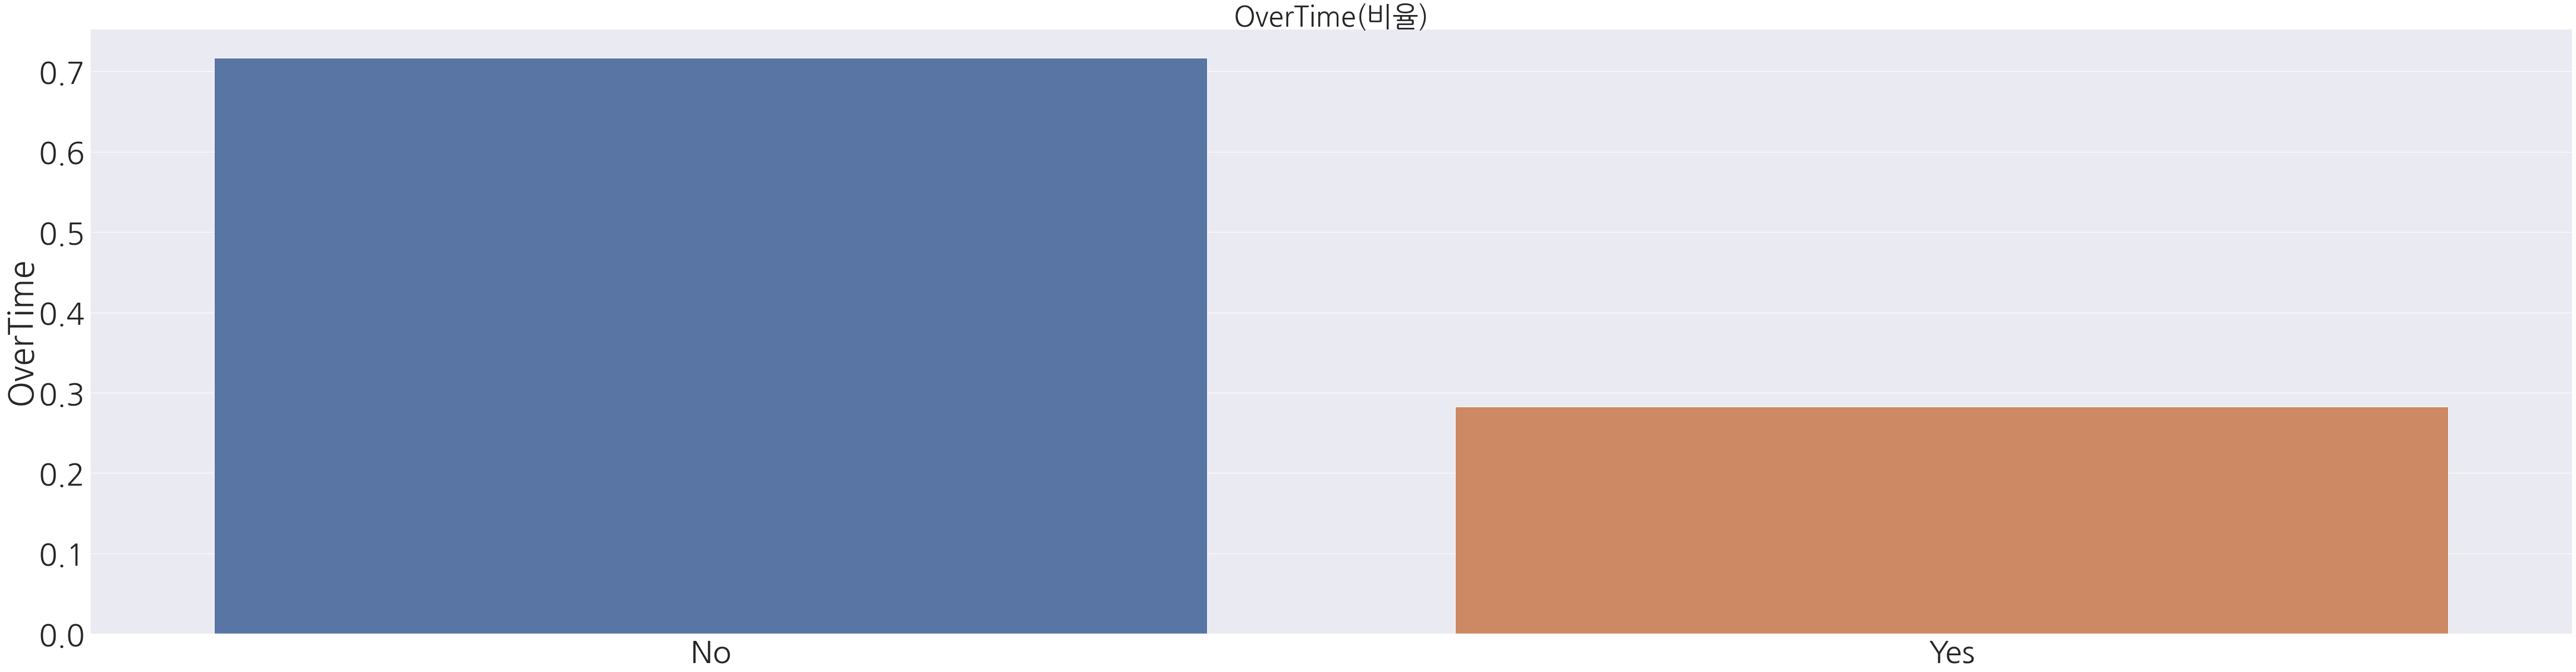

In [180]:
for i,col in enumerate(category_feature):
    vc_tmp = pd.DataFrame(data[col].value_counts())
    plt.figure(figsize=(80, 20), facecolor='white')
    sns.barplot(x= vc_tmp.index, y=vc_tmp[col]/sum(vc_tmp[col]))
    plt.title("%s(비율)"%col, fontsize=50)
    plt.show()

#### 3. 범주형 변수 piechart

In [172]:
sns.set()

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


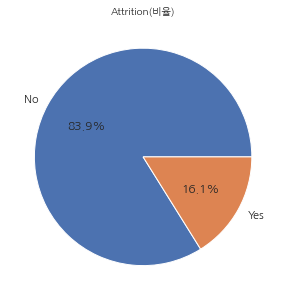

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


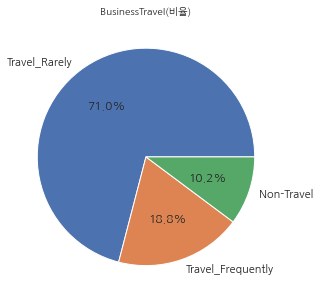

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


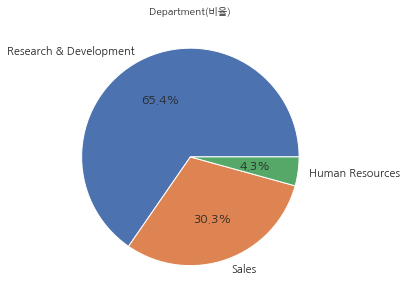

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


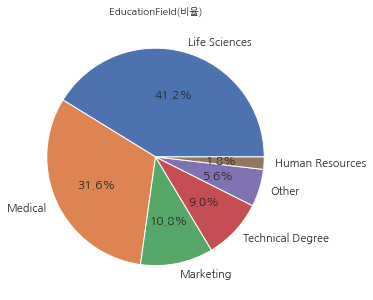

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


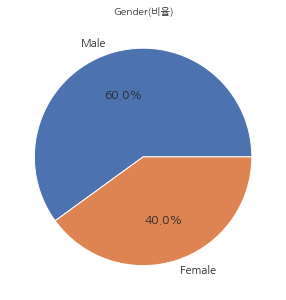

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


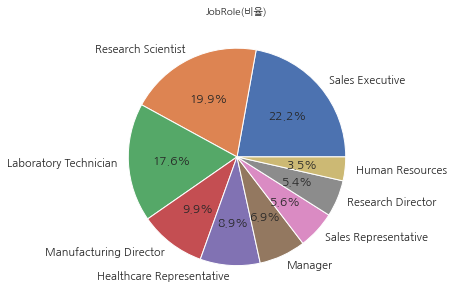

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


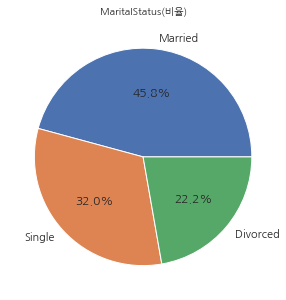

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


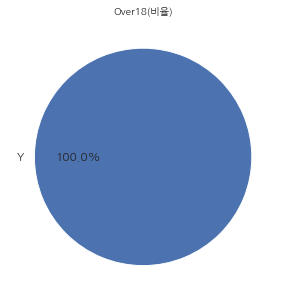

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


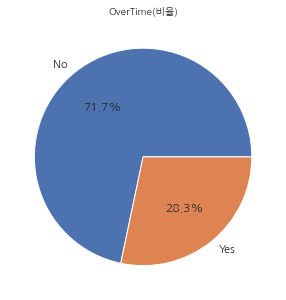

In [176]:
for i,col in enumerate(category_feature):
    vc_tmp = pd.DataFrame(data[col].value_counts())
    plt.figure(figsize=(5, 5), facecolor='white')
    plt.pie(vc_tmp, labels=vc_tmp.index, autopct='%.1f%%')
    plt.title("%s(비율)"%col, fontsize=10)
    plt.show()

# 2. 유의미한 시각화 5개 이상

### 1) Age
 : 나이<br>
type : int

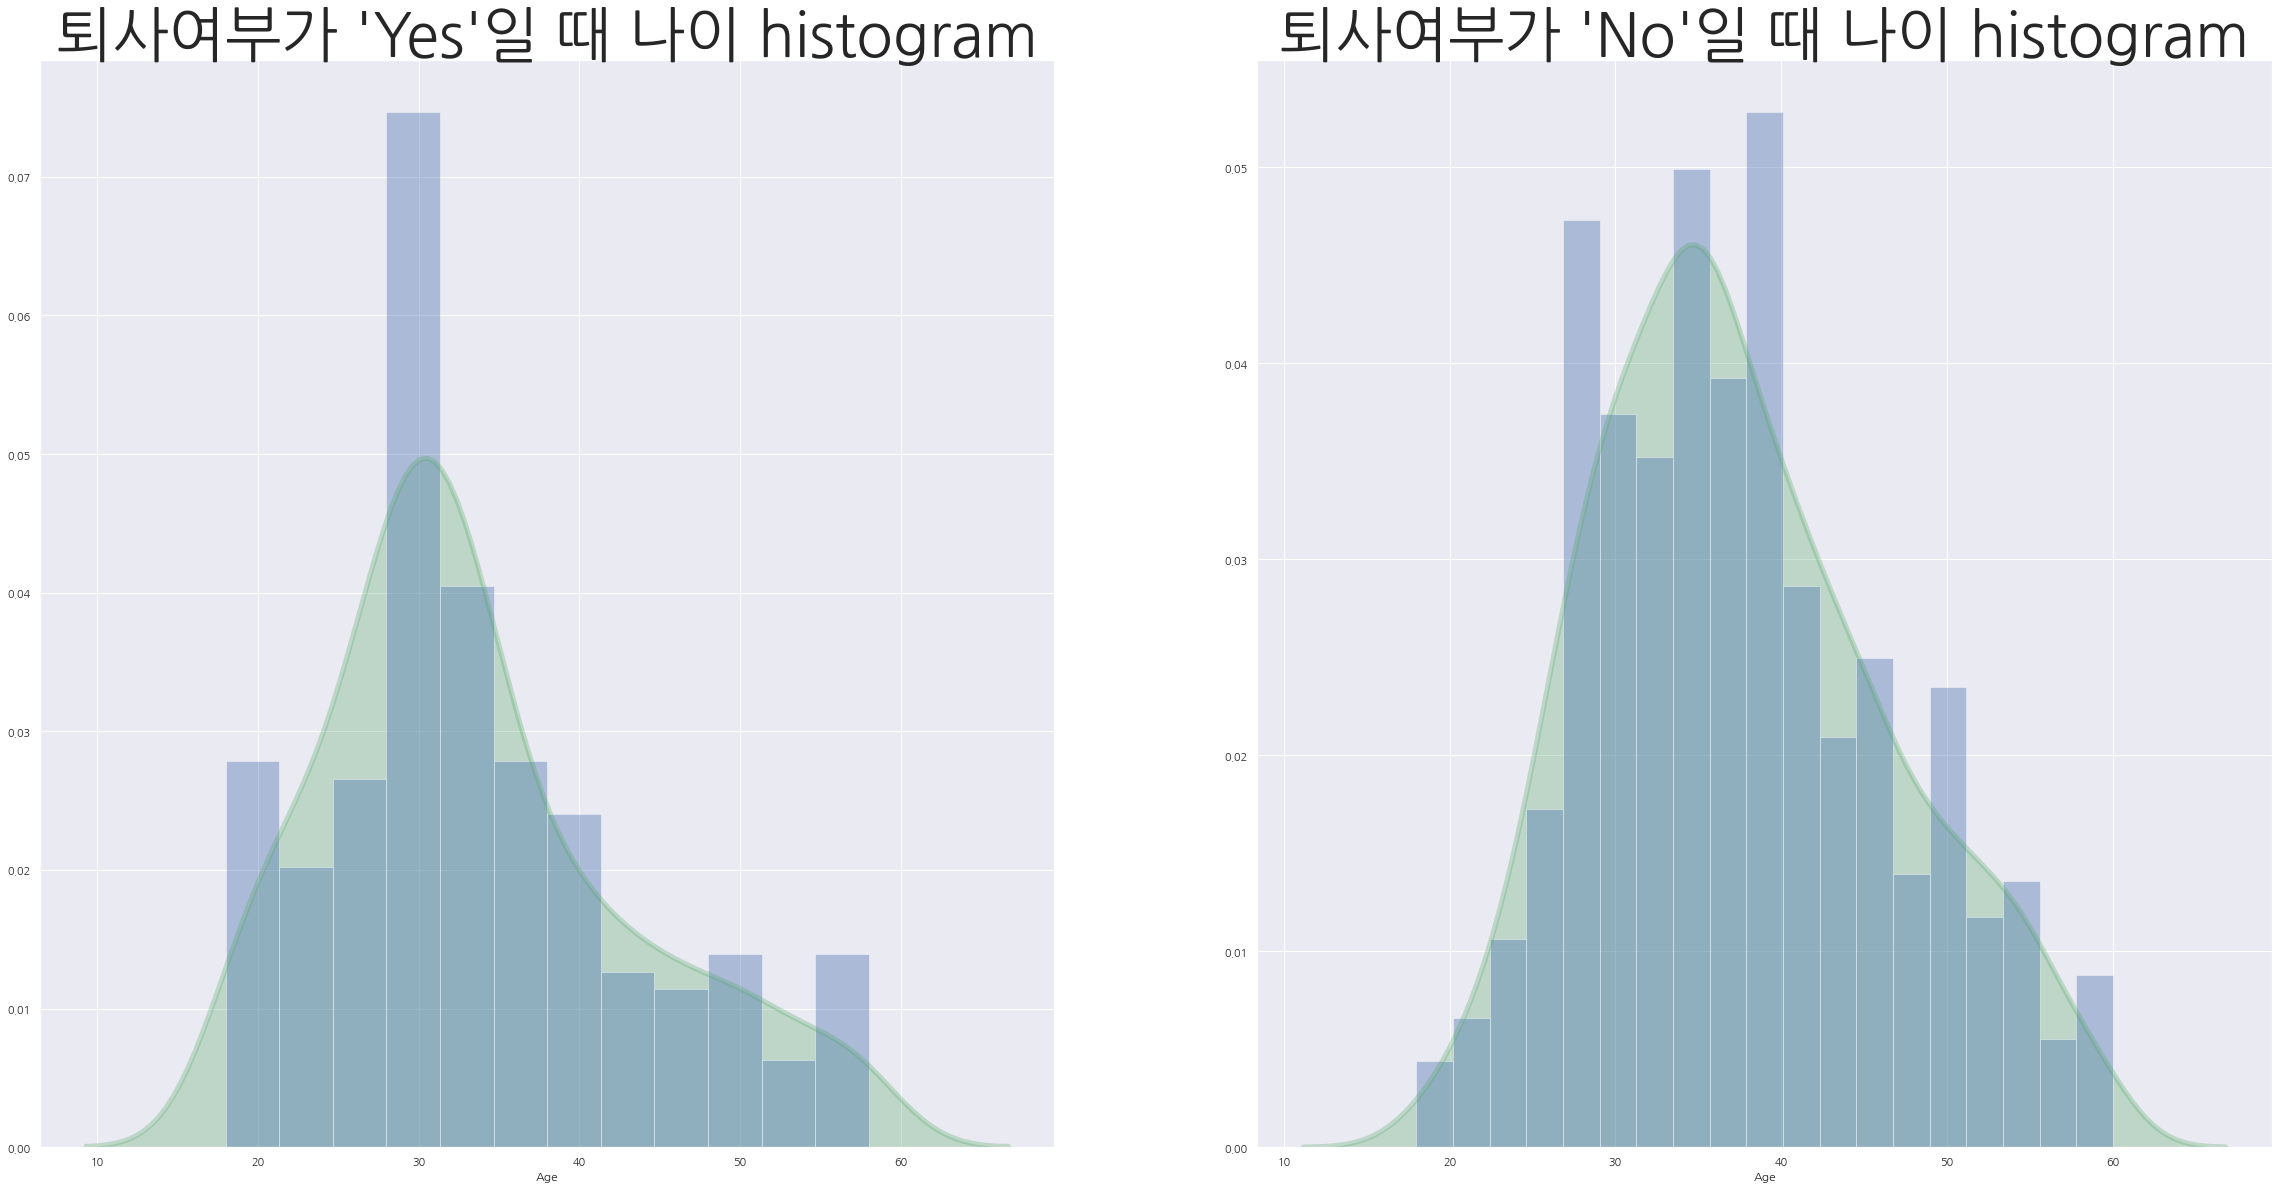

In [214]:
plt.figure(figsize=(40, 20), facecolor='white')

for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.distplot(data.loc[data['Attrition']==x,'Age'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("퇴사여부가 '%s'일 때 나이 histogram"%x, fontsize=60)

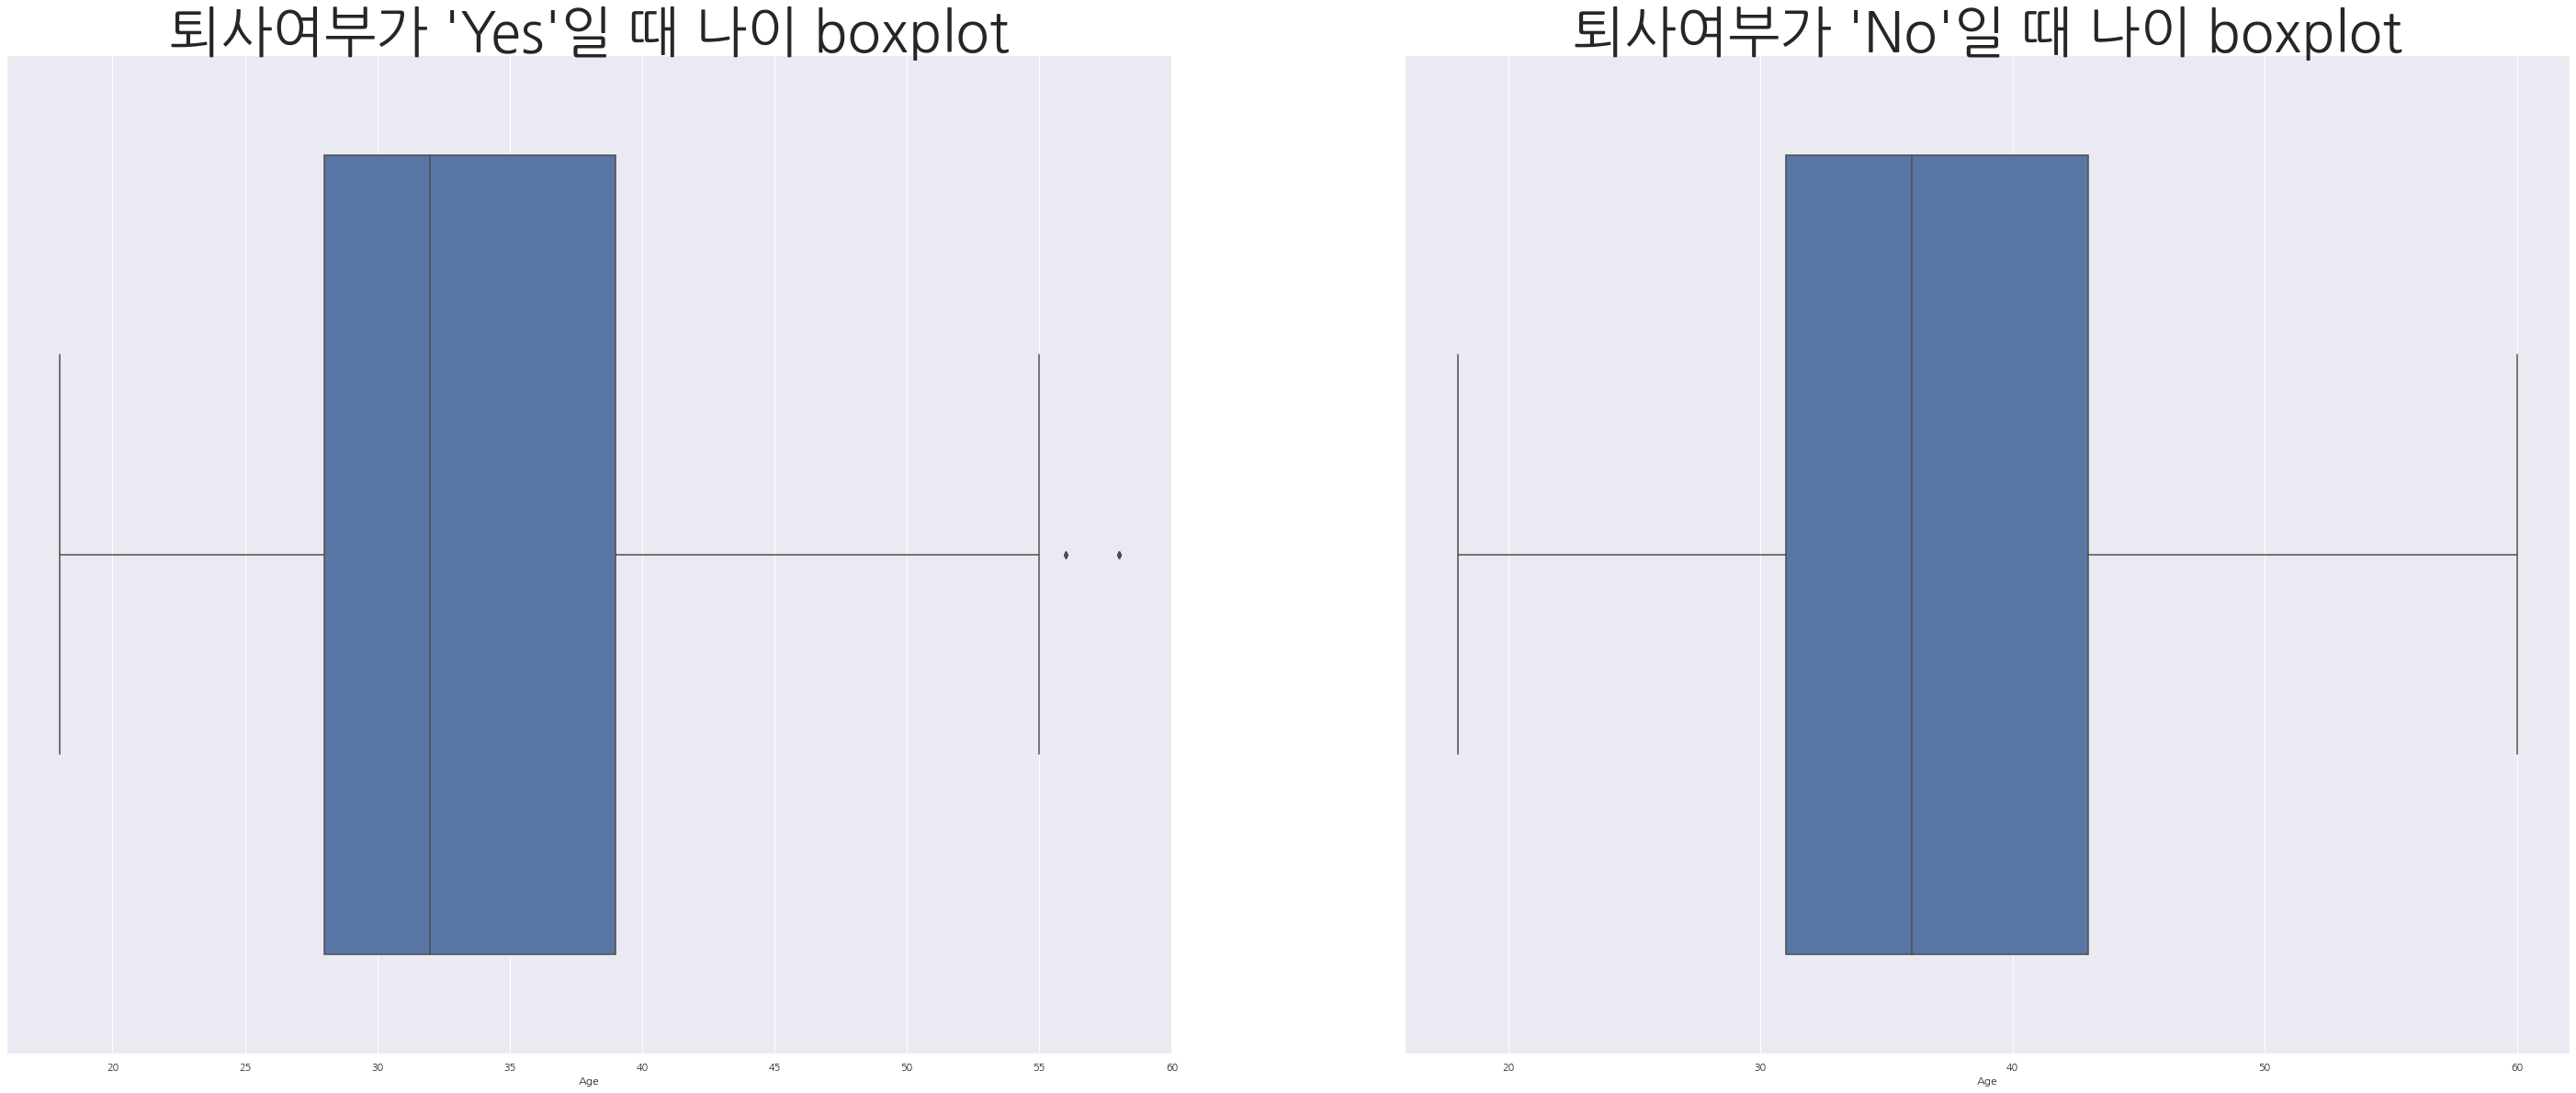

In [215]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.boxplot(data.loc[data['Attrition']==x,'Age'])
    plt.title("퇴사여부가 '%s'일 때 나이 boxplot"%x, fontsize=60)

In [128]:
for i, x in enumerate(['No', 'Yes']):
    print("퇴사여부가 '%s'일 때 나이 평균"%x, round(data.loc[data['Attrition']==x,'Age'].mean(),2))
    print("퇴사여부가 '%s'일 때 나이 중앙값"%x, data.loc[data['Attrition']==x,'Age'].median())
    print("퇴사여부가 '%s'일 때 나이 최빈값"%x, mode(data.loc[data['Attrition']==x,'Age']).mode[0])
    print('--------------------------------')

퇴사여부가 'No'일 때 나이 평균 37.56
퇴사여부가 'No'일 때 나이 중앙값 36.0
퇴사여부가 'No'일 때 나이 최빈값 34
--------------------------------
퇴사여부가 'Yes'일 때 나이 평균 33.61
퇴사여부가 'Yes'일 때 나이 중앙값 32.0
퇴사여부가 'Yes'일 때 나이 최빈값 29
--------------------------------


퇴사여부에 따른 나이 분포를 확인했을 때, <br>
퇴사여부가 'Yes'인 데이터(사람)의 나이는 퇴사여부가 'No'인 데이터(사람)의 나이보다<br> 상대적으로 어린 것을 확인할 수 있음. 

### 2) Attrition
 : 퇴사여부(**종속변수**)<br>
type : object(category)

Text(0.5, 1.0, '퇴사여부(count)')

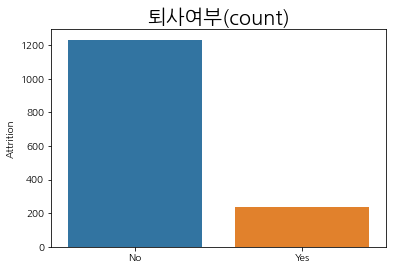

In [86]:
attrition_vc = pd.DataFrame(data['Attrition'].value_counts())
attrition_vc
sns.barplot(x= attrition_vc.index, y=attrition_vc['Attrition'])
plt.title("퇴사여부(count)", fontsize=20)

Text(0.5, 1.0, '퇴사여부(비율)')

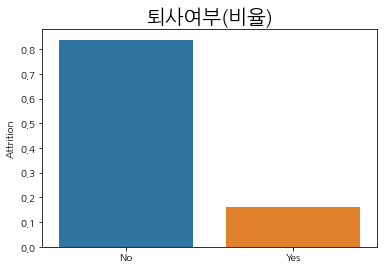

In [85]:
# 비율로 확인
sns.barplot(x= attrition_vc.index, y=attrition_vc['Attrition']/sum(attrition_vc['Attrition']))
plt.title("퇴사여부(비율)", fontsize=20)

In [68]:
attrition_vc

Attrition
No        1233
Yes        237

In [69]:
pd.DataFrame(attrition_vc['Attrition']/sum(attrition_vc['Attrition']))

Attrition
No    0.838776
Yes   0.161224

In [67]:
0.838776/0.161224

5.202550488760978

C:\Users\User\DataScience\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, '퇴사여부(비율)')

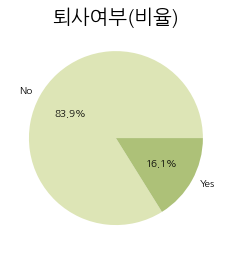

In [84]:
my_colours = ["#dde5b6", "#adc178", "#a98467", "#6c584c"]
plt.pie(attrition_vc, labels=attrition_vc.index, colors=my_colours, autopct='%.1f%%')
plt.title("퇴사여부(비율)", fontsize=20)

퇴사여부가 No인 데이터(사람)가 83.8776%, Yes인 데이터(사람)가 16.1224%로,<br>
약 **5배** 차이나는 것을 확인할 수 있음.

## 3) BusinessTravel
 : 출장의 빈도<br>
type : object(category)

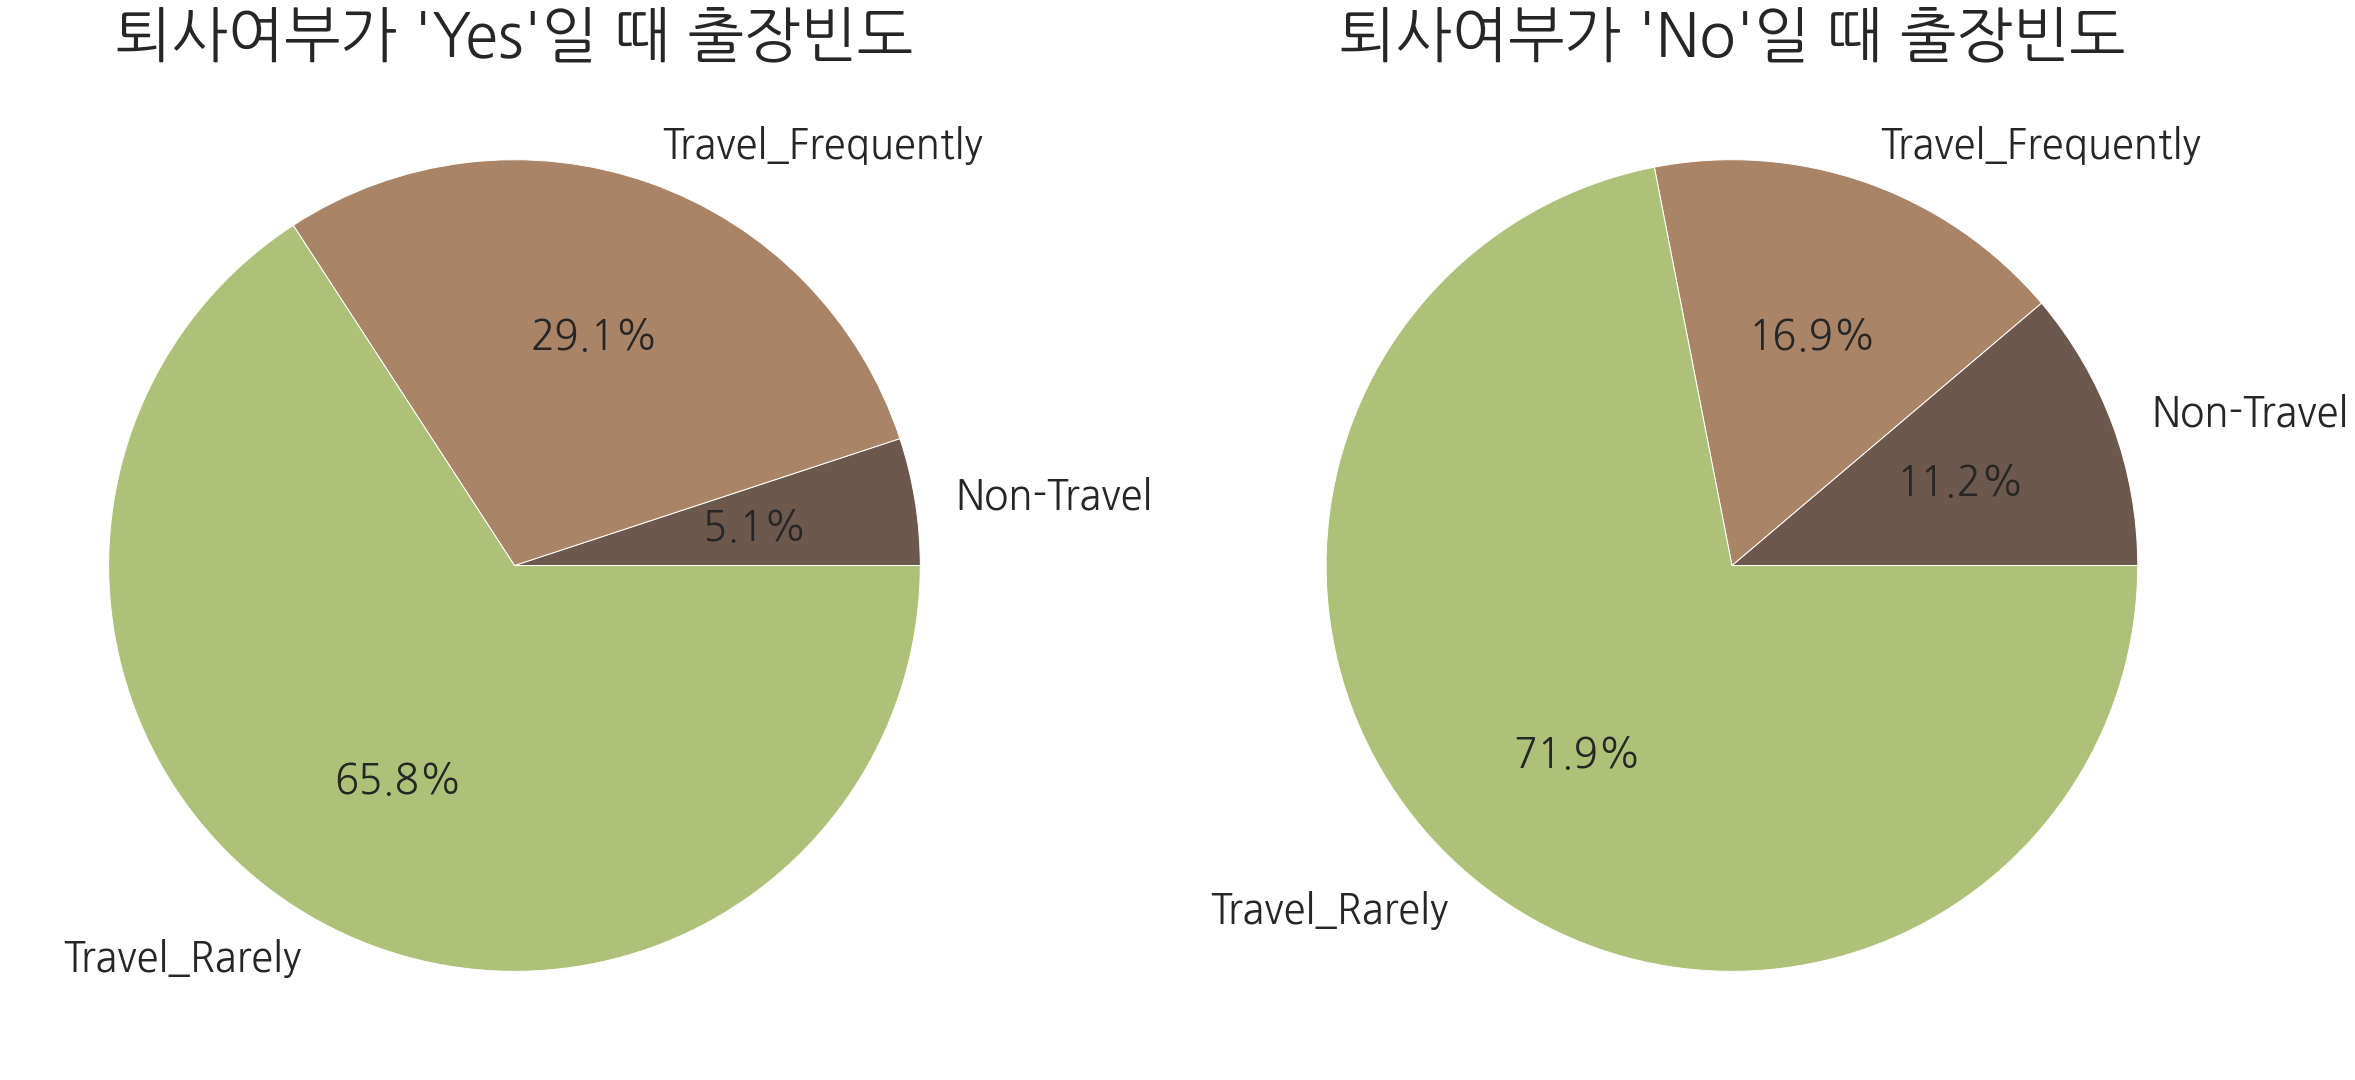

In [213]:
# target 변수와의 plot 확인
plt.figure(figsize=(40, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    BusinessTravel_tmp = pd.DataFrame(data[data['Attrition']==x].groupby('BusinessTravel')['BusinessTravel'].count())
    BusinessTravel_tmp.columns = ['cnt']
    BusinessTravel_tmp.reset_index(inplace=True)
    my_colours = ["#6c584c","#a98467", "#adc178","#dde5b6"]
    plt.pie(data = BusinessTravel_tmp, colors=my_colours, labels='BusinessTravel', x = 'cnt', autopct='%.1f%%', textprops={'fontsize': 40})
    plt.title("퇴사여부가 '%s'일 때 출장빈도"%x, fontsize=60)

퇴사여부(Attrition)이 Yes인 집단은 No인 집단보다 Travel_Frequently 비율이 높고, Travel_Rarely, Non-Travel 비율이 낮은 것을 확인할 수 있다.<br>
즉,출장을 자주 갈수록 퇴사가 Yes일 가능성이 있다라는 가설을 세울 수 있다.

## 4) DailyRate
 : 일 대비 급여의 수준<br>
type : int

In [153]:
sns.set(font_scale = 5)

C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\DataScience\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


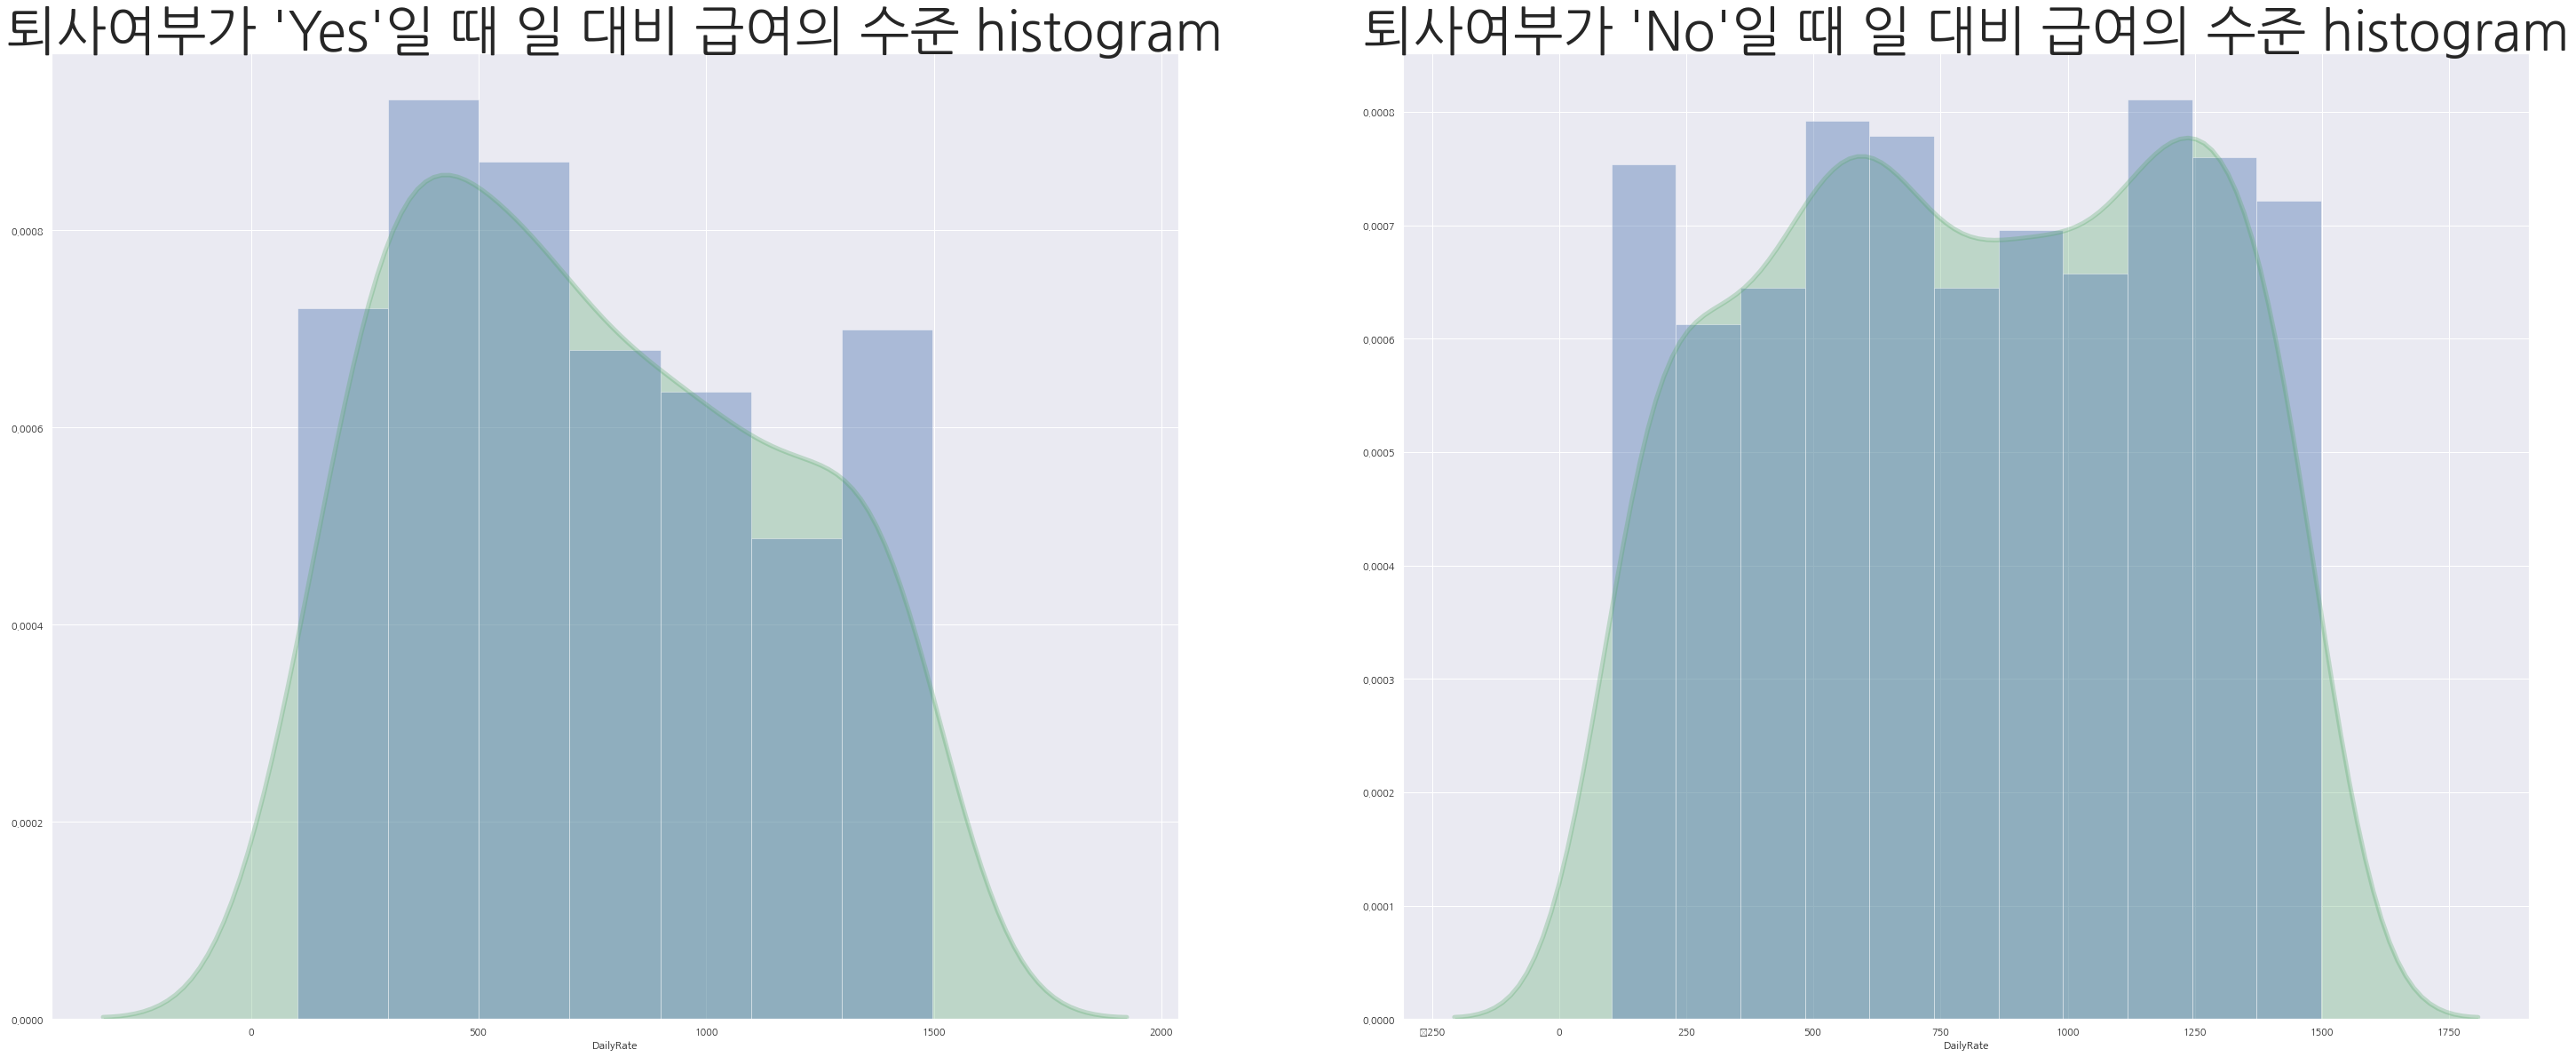

In [212]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.distplot(data.loc[data['Attrition']==x,'DailyRate'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("퇴사여부가 '%s'일 때 일 대비 급여의 수준 histogram"%x, fontsize=60)

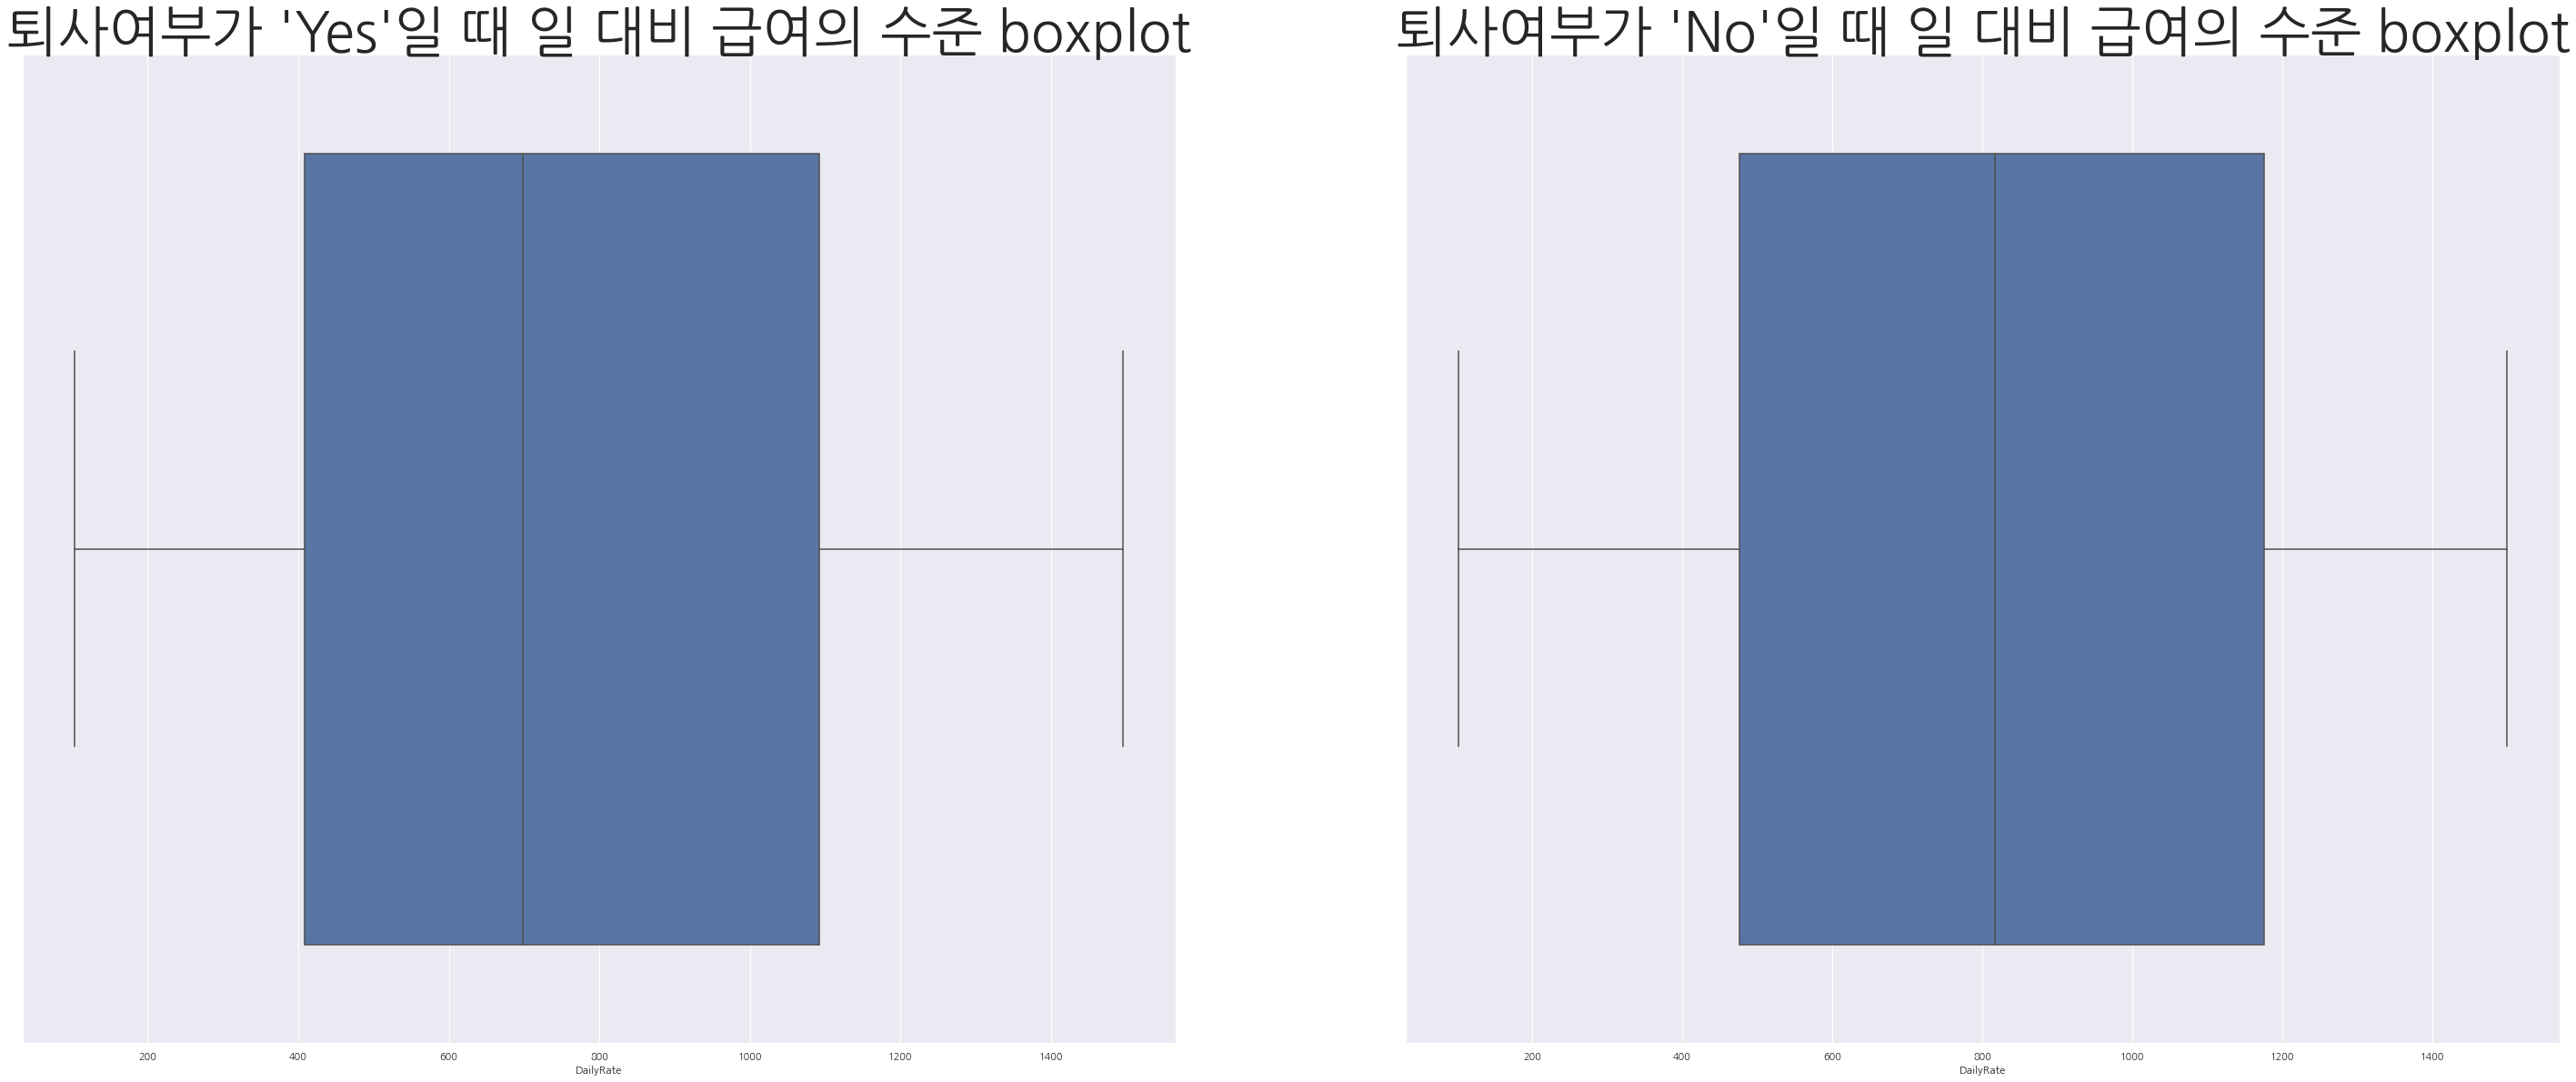

In [211]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.boxplot(data.loc[data['Attrition']==x,'DailyRate'])
    plt.title("퇴사여부가 '%s'일 때 일 대비 급여의 수준 boxplot"%x, fontsize=60)

In [158]:
for i, x in enumerate(['No', 'Yes']):
    print("퇴사여부가 '%s'일 때 일 대비 급여의 수준 평균"%x, round(data.loc[data['Attrition']==x,'DailyRate'].mean(),2))
    print("퇴사여부가 '%s'일 때 일 대비 급여의 수준 중앙값"%x, data.loc[data['Attrition']==x,'DailyRate'].median())
    print("퇴사여부가 '%s'일 때 일 대비 급여의 수준 최빈값"%x, mode(data.loc[data['Attrition']==x,'DailyRate']).mode[0])
    print('--------------------------------')

퇴사여부가 'No'일 때 일 대비 급여의 수준 평균 812.5
퇴사여부가 'No'일 때 일 대비 급여의 수준 중앙값 817.0
퇴사여부가 'No'일 때 일 대비 급여의 수준 최빈값 691
--------------------------------
퇴사여부가 'Yes'일 때 일 대비 급여의 수준 평균 750.36
퇴사여부가 'Yes'일 때 일 대비 급여의 수준 중앙값 699.0
퇴사여부가 'Yes'일 때 일 대비 급여의 수준 최빈값 240
--------------------------------


In [162]:
print(mode(data.loc[data['Attrition']=='No','DailyRate']))
print(mode(data.loc[data['Attrition']=='Yes','DailyRate']))

ModeResult(mode=array([691], dtype=int64), count=array([6]))
ModeResult(mode=array([240], dtype=int64), count=array([2]))


퇴사여부에 따른 일 대비 급여의 수준 분포를 확인했을 때, <br>
퇴사여부가 'Yes'인 데이터(사람)의 일 대비 급여의 수준은 퇴사여부가 'No'인 데이터(사람)보다<br> 상대적으로 적은 것을 확인할 수 있음. 
즉, 일 대비 급여 수준이 적을수록 퇴사가 Yes일 가능성이 있다라는 가설을 세울 수 있다.

## 5) EducationField
 : 전공<br>
type : object(category)

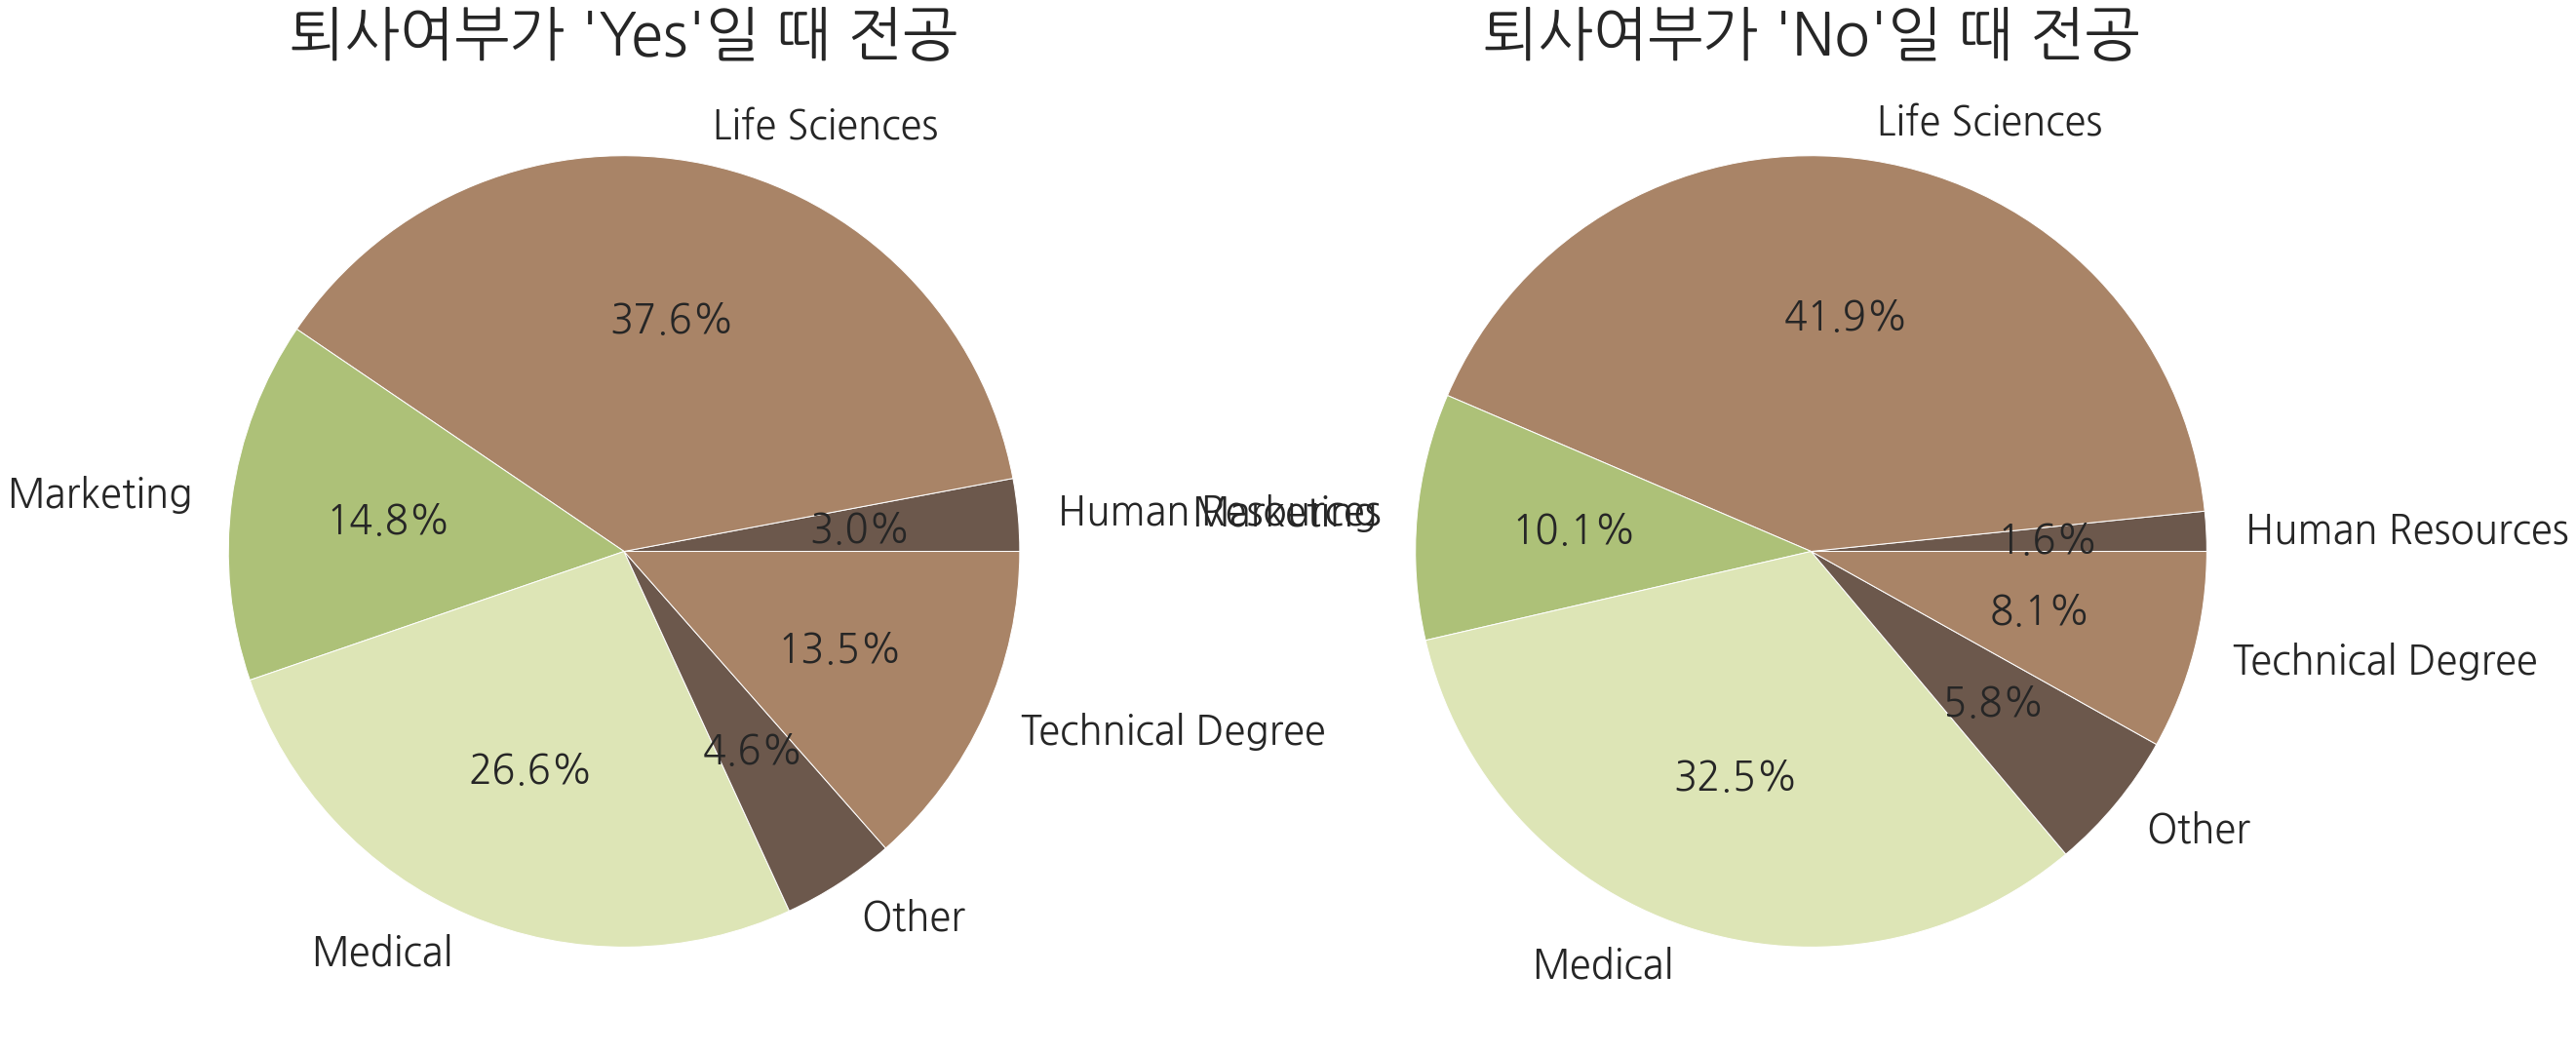

In [210]:
# target 변수와의 plot 확인
plt.figure(figsize=(40, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    EducationField_tmp = pd.DataFrame(data[data['Attrition']==x].groupby('EducationField')['EducationField'].count())
    EducationField_tmp.columns = ['cnt']
    EducationField_tmp.reset_index(inplace=True)
    my_colours = ["#6c584c","#a98467", "#adc178","#dde5b6"]
    plt.pie(data = EducationField_tmp, colors=my_colours, labels='EducationField', x = 'cnt', autopct='%.1f%%', textprops={'fontsize': 40})
    plt.title("퇴사여부가 '%s'일 때 전공"%x, fontsize=60)

퇴사여부(Attrition)이 Yes인 집단은 No인 집단보다 전공이 Technical Degree, Human Resources인 비율이 높고, Medical인 비율이 낮은 것을 확인할 수 있다.<br>
즉, 전공이 Technical Degree, Human Resources인 사람이 Medical인 사람보다 퇴사가 Yes일 가능성이 있다라는 가설을 세울 수 있다.

## 6) JobRole
 : 업무 종류<br>
type : object(category)

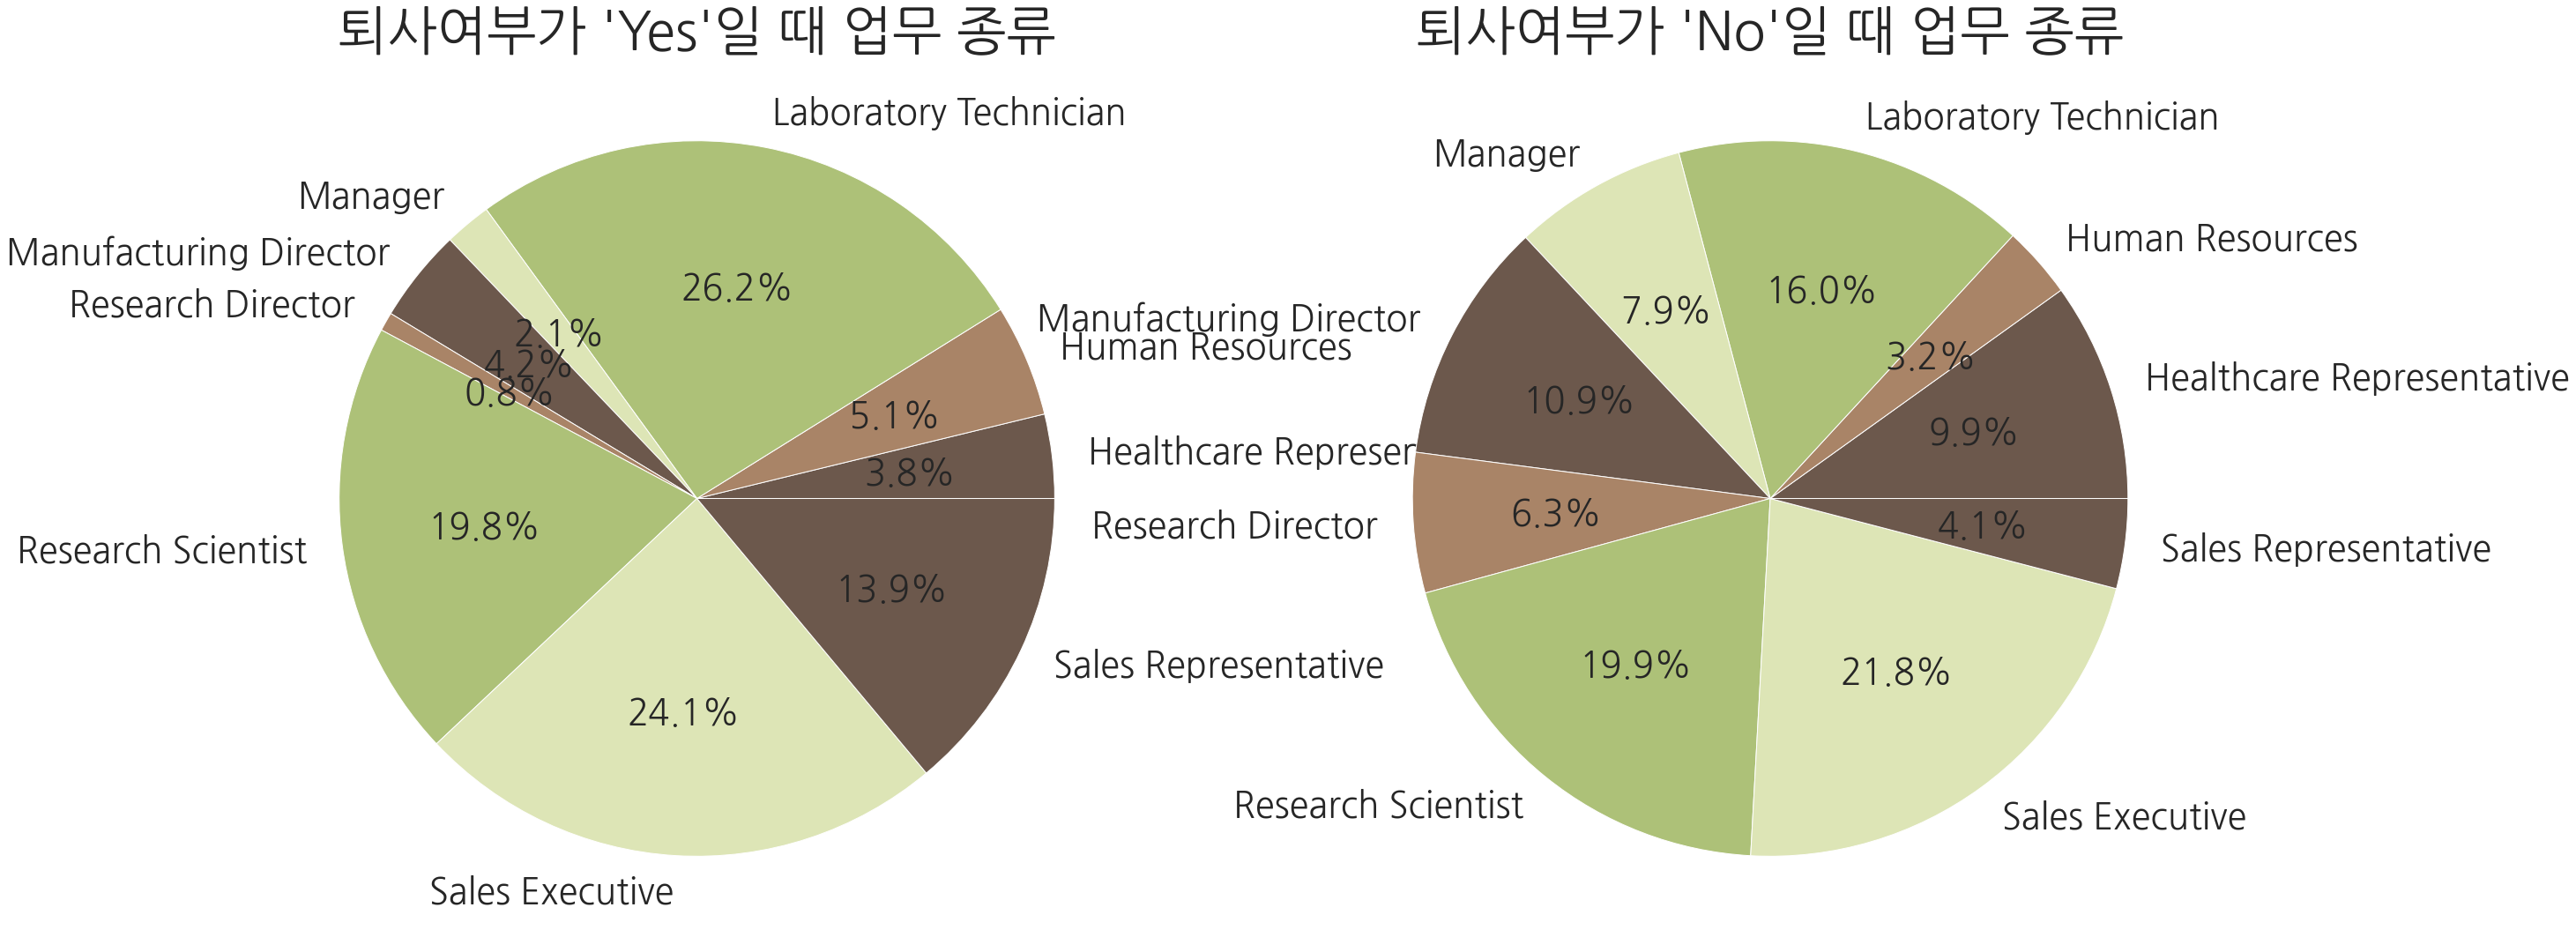

In [217]:
# target 변수와의 plot 확인
plt.figure(figsize=(40, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    JobRole_tmp = pd.DataFrame(data[data['Attrition']==x].groupby('JobRole')['JobRole'].count())
    JobRole_tmp.columns = ['cnt']
    JobRole_tmp.reset_index(inplace=True)
    my_colours = ["#6c584c","#a98467", "#adc178","#dde5b6"]
    plt.pie(data = JobRole_tmp, colors=my_colours, labels='JobRole', x = 'cnt', autopct='%.1f%%', textprops={'fontsize': 40})
    plt.title("퇴사여부가 '%s'일 때 업무 종류"%x, fontsize=60)

퇴사여부(Attrition)이 Yes인 집단은 No인 집단보다 업무종류가 Sales Representative, Laboratory Technician, Sales Executive인 비율이 높고, Manager, Manufacturing Director, Research Director, Healthcare Representative인 비율이 낮은 것을 확인할 수 있다.<br>
즉, 전공이 영업이나 실험기술자(Sales Representative, Laboratory Technician, Sales Executive)인 사람이 관리자(Manager, Manufacturing Director, Research Director, Healthcare Representative)인 사람보다 퇴사가 Yes일 가능성이 있다라는 가설을 세울 수 있다.

## 7) TotalWorkingYears
 : 경력 기간<br>
type : int

In [153]:
sns.set(font_scale = 5)

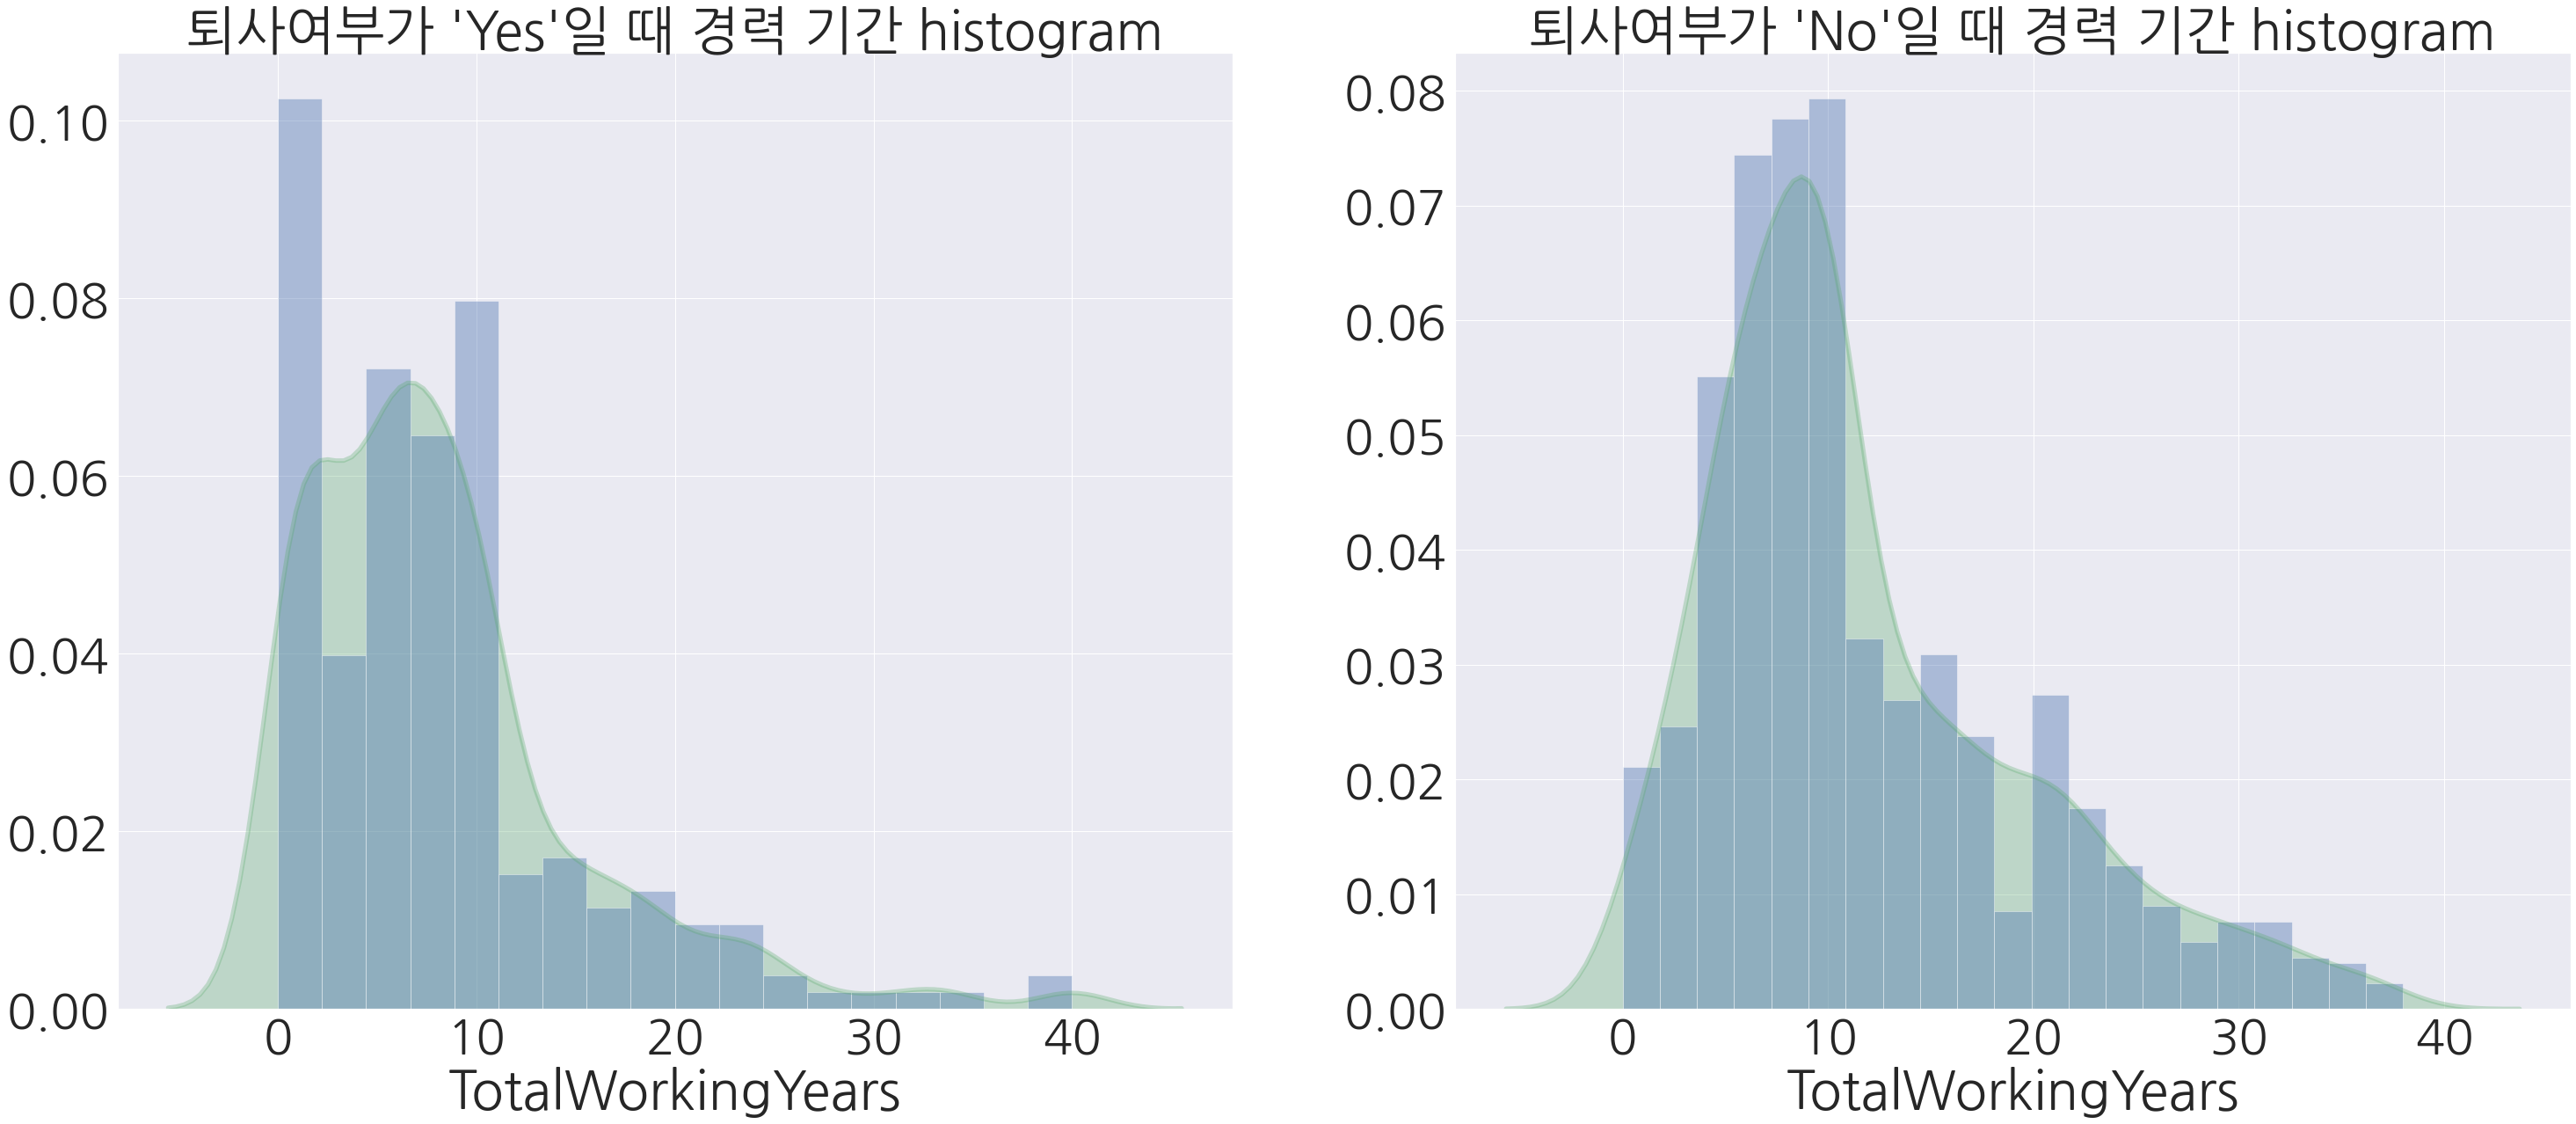

In [231]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.distplot(data.loc[data['Attrition']==x,'TotalWorkingYears'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("퇴사여부가 '%s'일 때 경력 기간 histogram"%x, fontsize=60)

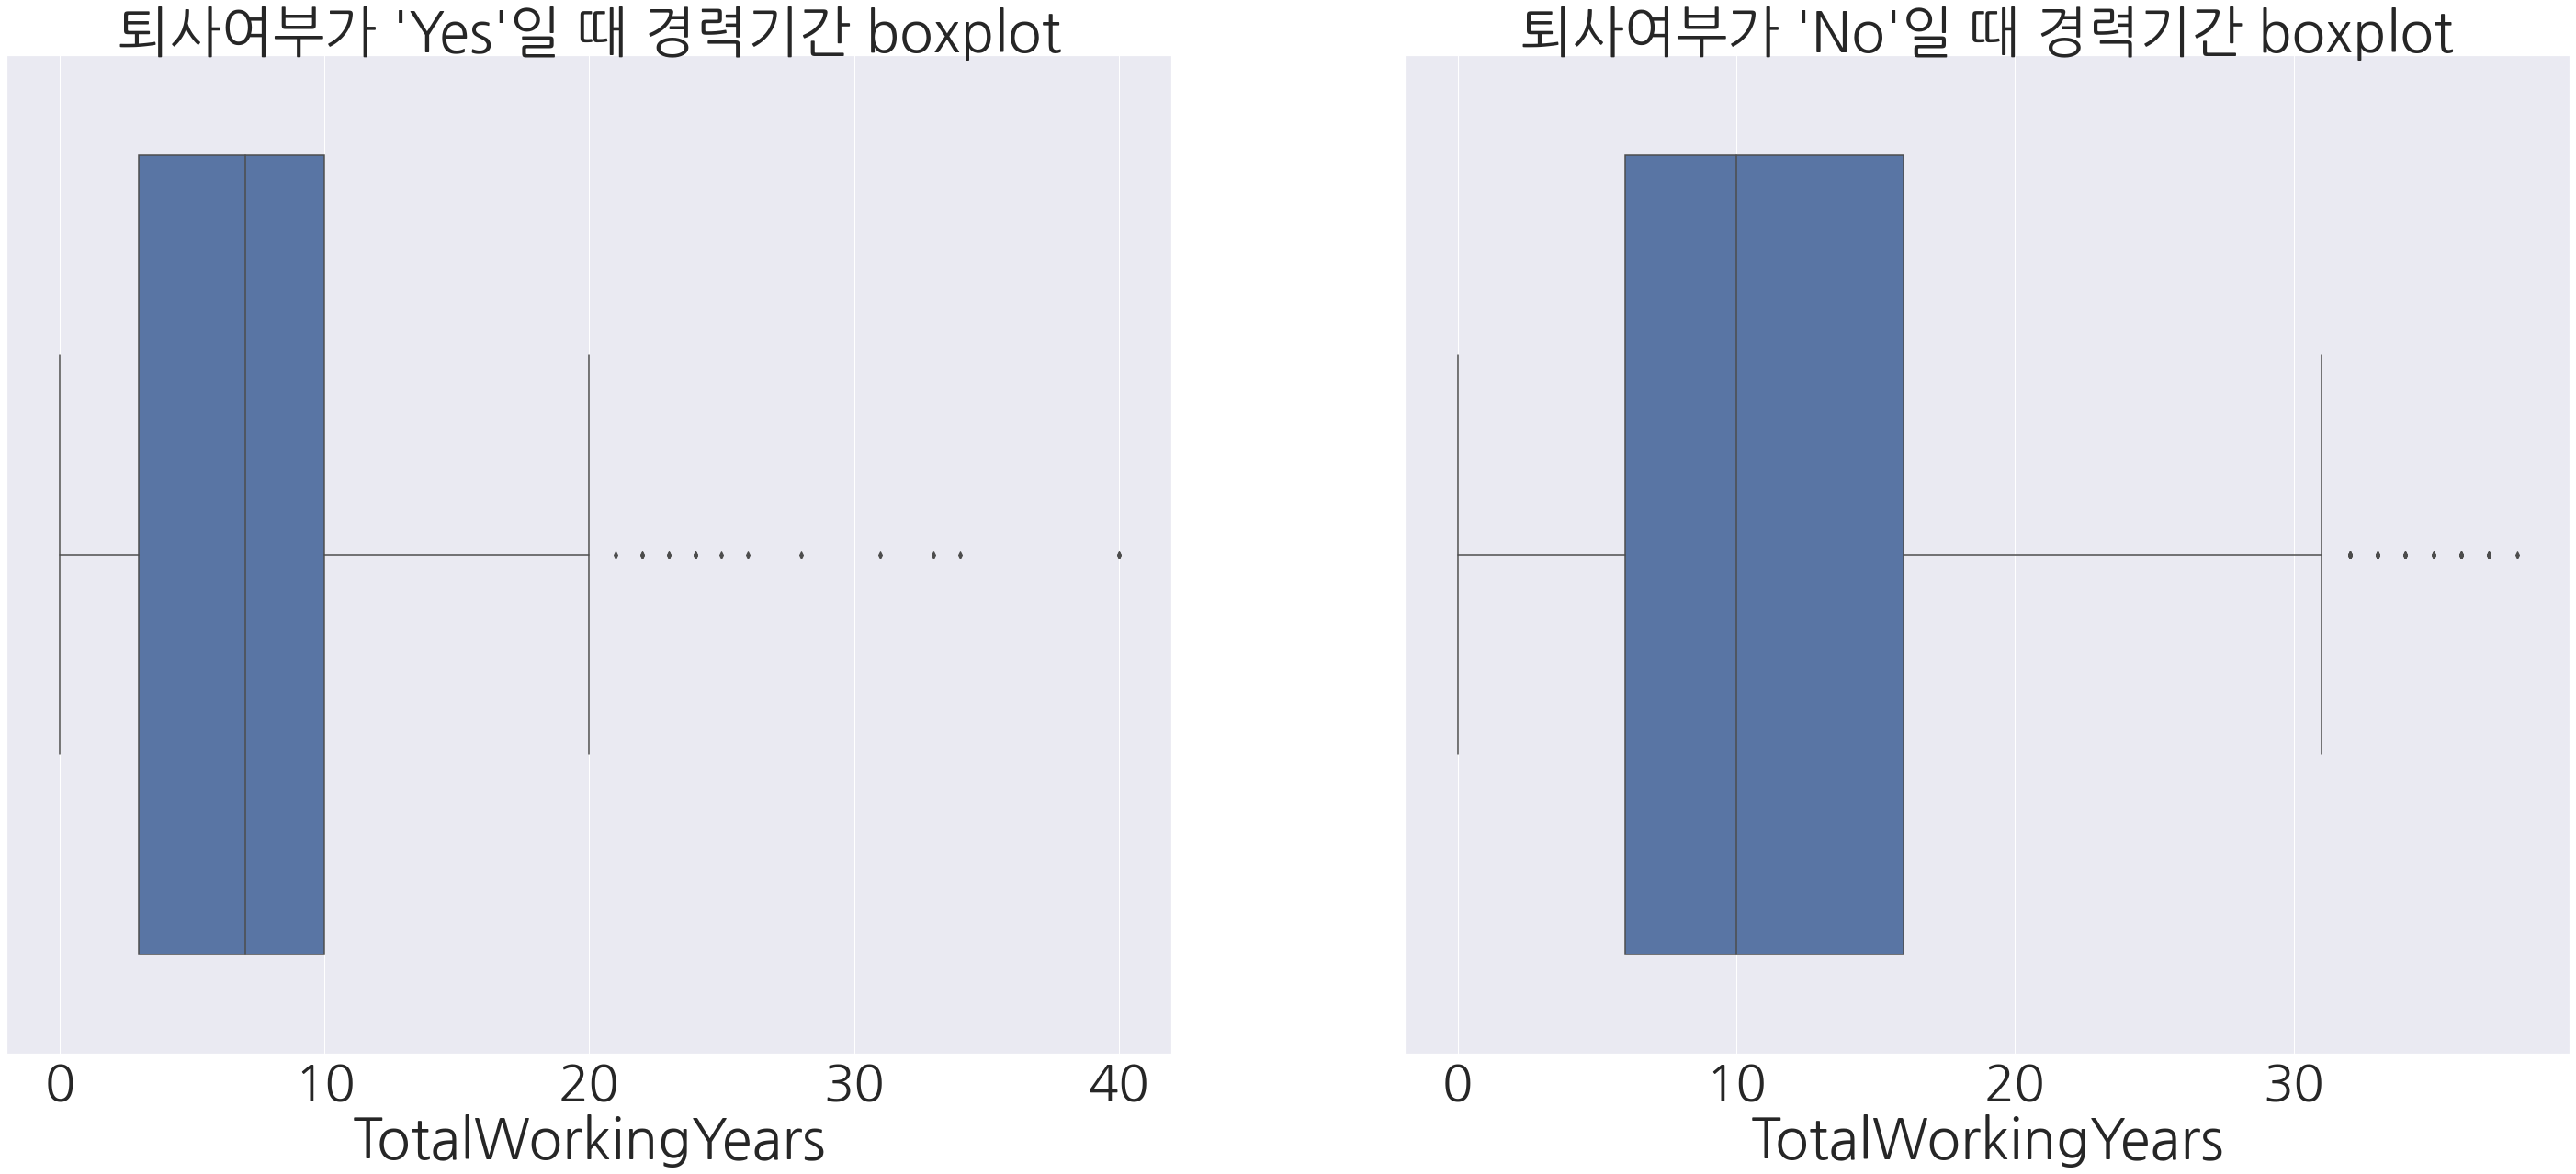

In [232]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.boxplot(data.loc[data['Attrition']==x,'TotalWorkingYears'])
    plt.title("퇴사여부가 '%s'일 때 경력기간 boxplot"%x, fontsize=60)

In [233]:
for i, x in enumerate(['Yes','No']):
    print("퇴사여부가 '%s'일 때 경력 기간 평균"%x, round(data.loc[data['Attrition']==x,'TotalWorkingYears'].mean(),2))
    print("퇴사여부가 '%s'일 때 경력 기간 중앙값"%x, data.loc[data['Attrition']==x,'TotalWorkingYears'].median())
    print("퇴사여부가 '%s'일 때 경력 기간 최빈값"%x, mode(data.loc[data['Attrition']==x,'TotalWorkingYears']).mode[0])
    print('--------------------------------')

퇴사여부가 'Yes'일 때 경력 기간 평균 8.24
퇴사여부가 'Yes'일 때 경력 기간 중앙값 7.0
퇴사여부가 'Yes'일 때 경력 기간 최빈값 1
--------------------------------
퇴사여부가 'No'일 때 경력 기간 평균 11.86
퇴사여부가 'No'일 때 경력 기간 중앙값 10.0
퇴사여부가 'No'일 때 경력 기간 최빈값 10
--------------------------------


In [223]:
print(mode(data.loc[data['Attrition']=='No','TotalWorkingYears']))
print(mode(data.loc[data['Attrition']=='Yes','TotalWorkingYears']))

ModeResult(mode=array([10], dtype=int64), count=array([177]))
ModeResult(mode=array([1], dtype=int64), count=array([40]))


퇴사여부에 따른 경력 기간 분포를 확인했을 때, <br>
퇴사여부가 'Yes'인 데이터(사람)의 경력 기간은 퇴사여부가 'No'인 데이터(사람)보다<br> 상대적으로 긴 것을 확인할 수 있음. 
게다가 경력 기간이 1년인 경우 퇴사여부가 Yes일 확률이 가장 높다는 것을 알 수 있다.<br>
즉, 경력 기간이 짧을수록 퇴사가 Yes일 가능성이 있다라는 가설을 세울 수 있다.

## 8) YearsAtCompany 
 : 근속 연수<br>
type : int

In [227]:
sns.set(font_scale = 5)

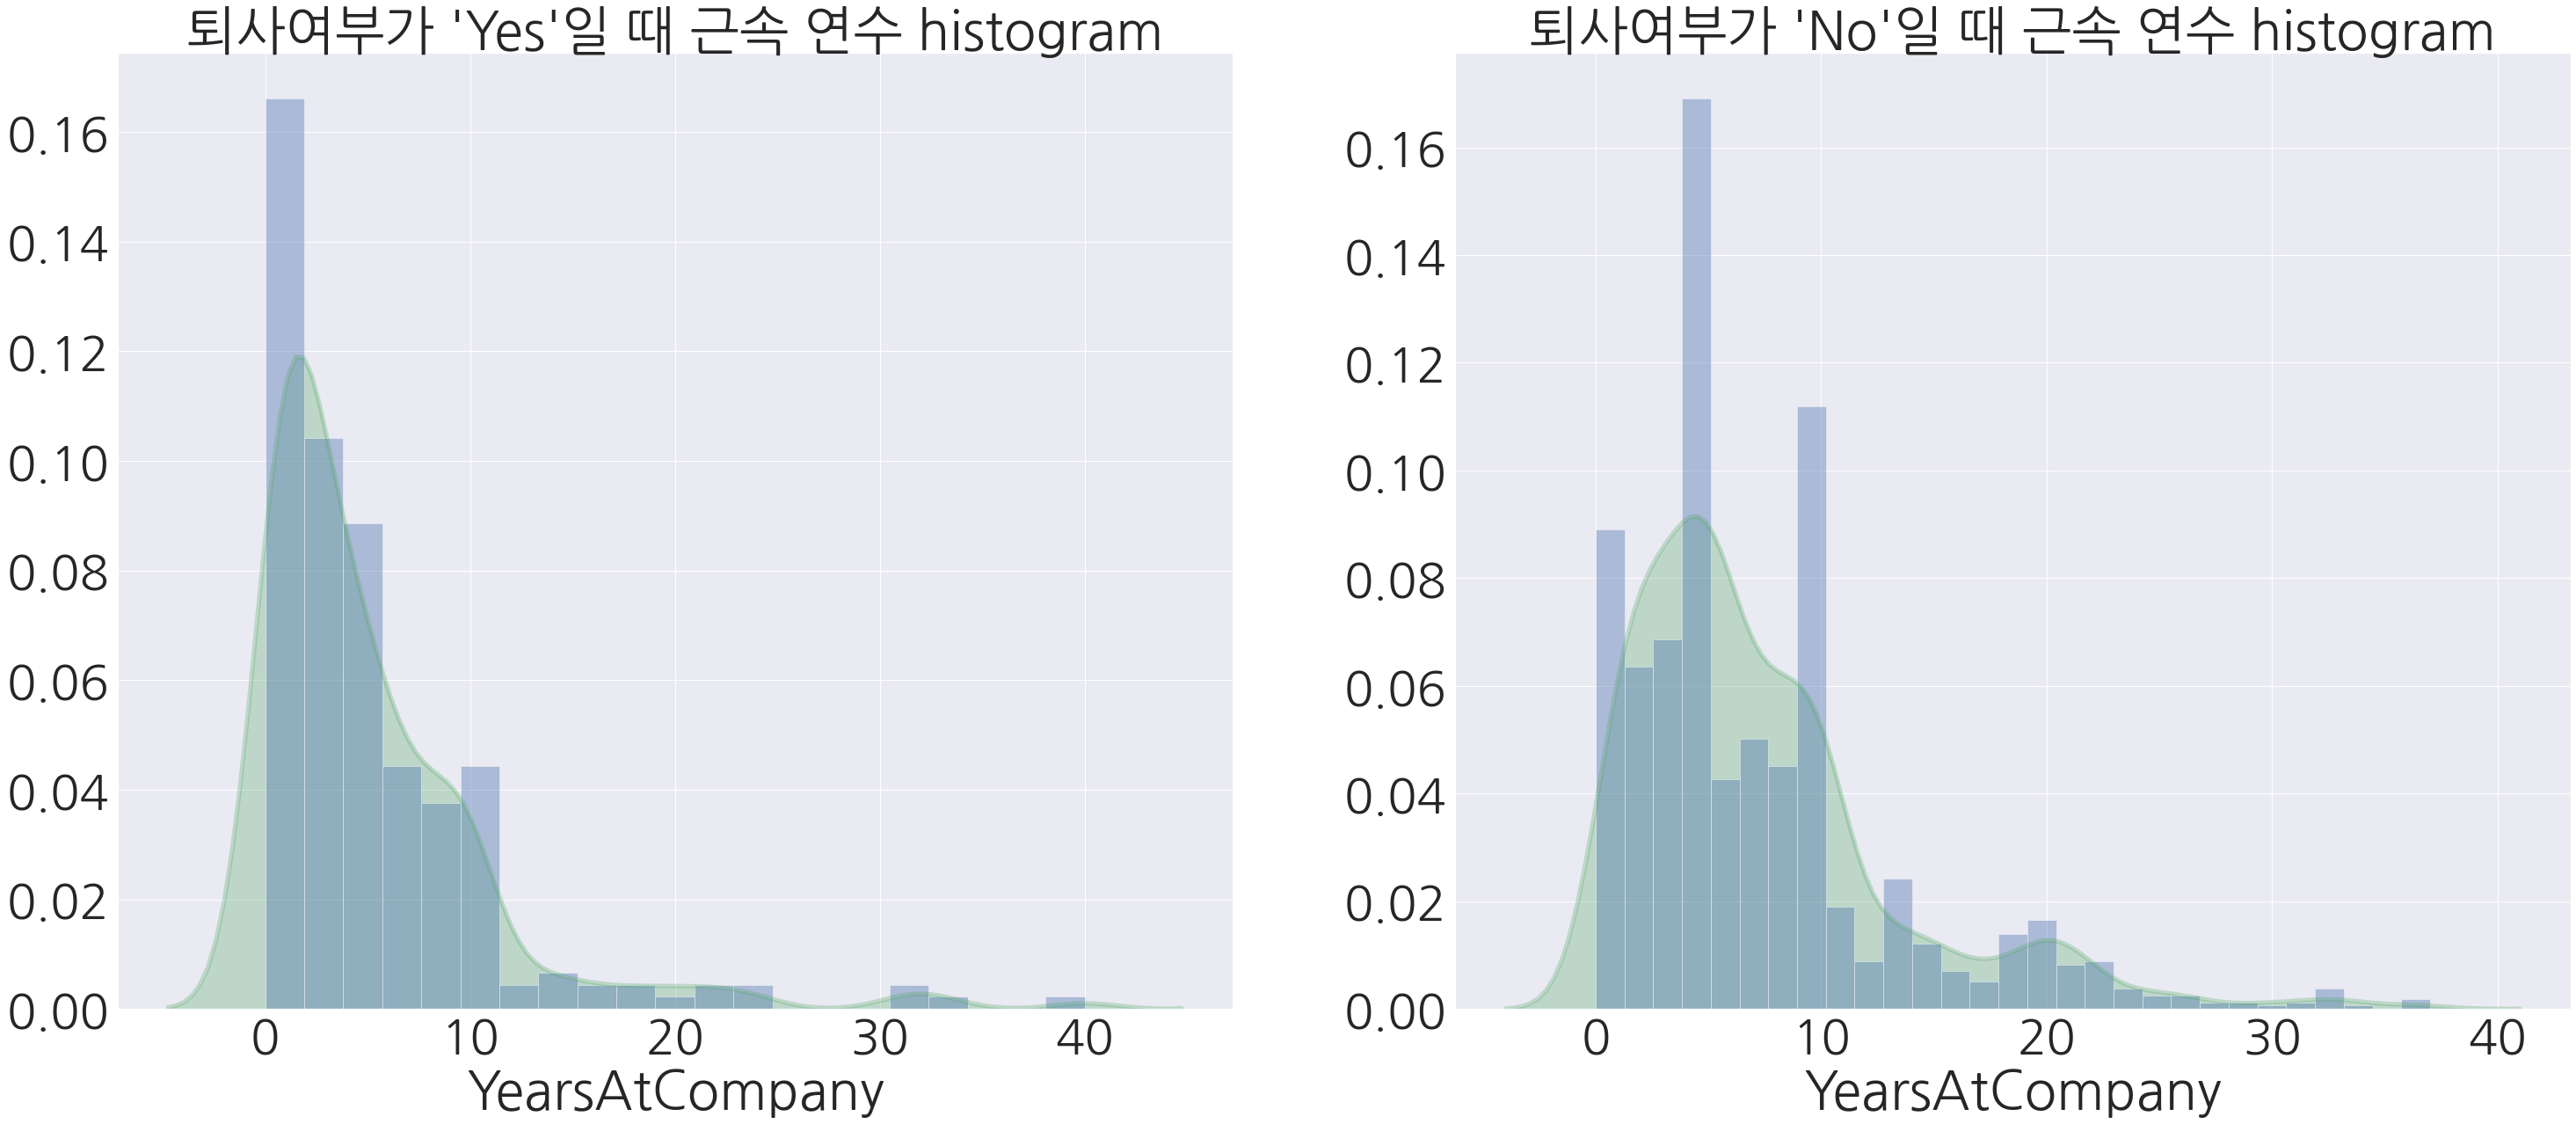

In [229]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.distplot(data.loc[data['Attrition']==x,'YearsAtCompany'], kde=True, kde_kws = {'color': 'g', 'alpha':0.3,
                                              'linewidth':5, 'shade':True})
    plt.title("퇴사여부가 '%s'일 때 근속 연수 histogram"%x, fontsize=60)

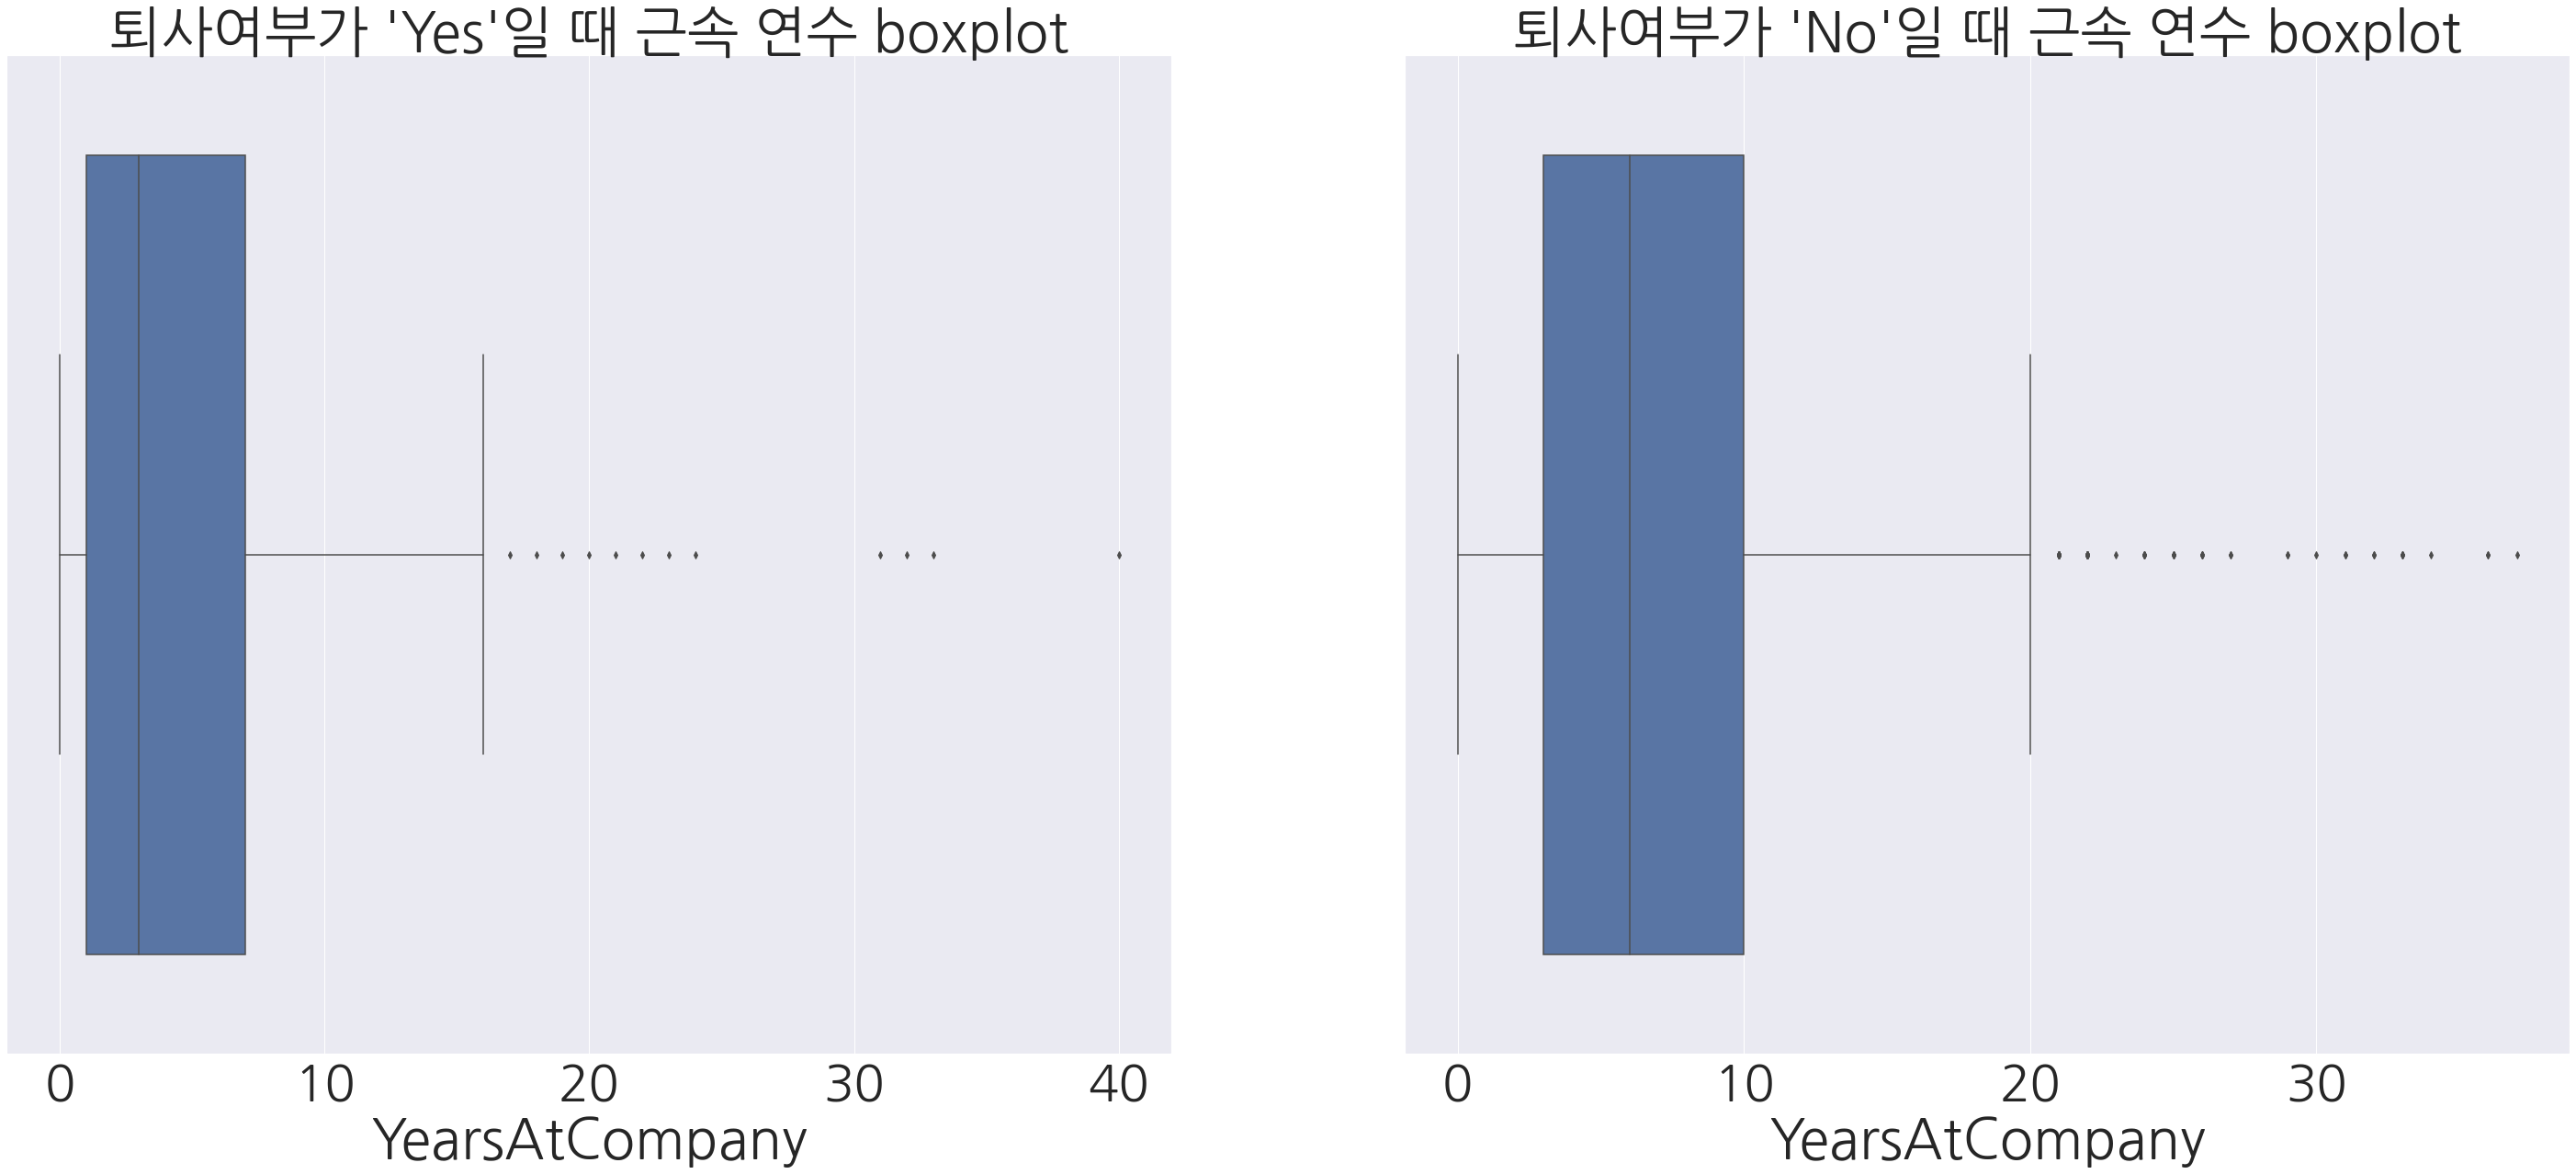

In [230]:
plt.figure(figsize=(50, 20), facecolor='white')
for i, x in enumerate(['Yes','No']):
    plt.subplot(1,2,i+1)
    sns.boxplot(data.loc[data['Attrition']==x,'YearsAtCompany'])
    plt.title("퇴사여부가 '%s'일 때 근속 연수 boxplot"%x, fontsize=60)

In [234]:
for i, x in enumerate(['Yes','No']):
    print("퇴사여부가 '%s'일 때 근속 연수 평균"%x, round(data.loc[data['Attrition']==x,'YearsAtCompany'].mean(),2))
    print("퇴사여부가 '%s'일 때 근속 연수 중앙값"%x, data.loc[data['Attrition']==x,'YearsAtCompany'].median())
    print("퇴사여부가 '%s'일 때 근속 연수 최빈값"%x, mode(data.loc[data['Attrition']==x,'YearsAtCompany']).mode[0])
    print('--------------------------------')

퇴사여부가 'Yes'일 때 근속 연수 평균 5.13
퇴사여부가 'Yes'일 때 근속 연수 중앙값 3.0
퇴사여부가 'Yes'일 때 근속 연수 최빈값 1
--------------------------------
퇴사여부가 'No'일 때 근속 연수 평균 7.37
퇴사여부가 'No'일 때 근속 연수 중앙값 6.0
퇴사여부가 'No'일 때 근속 연수 최빈값 5
--------------------------------


In [236]:
print(mode(data.loc[data['Attrition']=='Yes','YearsAtCompany']))
print(mode(data.loc[data['Attrition']=='No','YearsAtCompany']))

ModeResult(mode=array([1], dtype=int64), count=array([59]))
ModeResult(mode=array([5], dtype=int64), count=array([175]))


퇴사여부에 따른 근속 연수 분포를 확인했을 때, <br>
퇴사여부가 'Yes'인 데이터(사람)의 근속 연수는 퇴사여부가 'No'인 데이터(사람)보다<br> 상대적으로 긴 것을 확인할 수 있음. 
게다가 근속 연수가 1년인 경우 퇴사여부가 Yes일 확률이 가장 높다는 것을 알 수 있다.<br>
즉, 경력 기간과 마찬가지로 근속 연수가 짧을수록 퇴사가 Yes일 가능성이 있다라는 가설을 세울 수 있다.

# 3. 수치형 변수 간 상관관계 파악

In [187]:
df_corr = data[list(numerical_feature) + list(discrete_feature)].corr()
df_corr

Age  DailyRate  DistanceFromHome  HourlyRate  \
Age                       1.000000   0.010661         -0.001686    0.024287   
DailyRate                 0.010661   1.000000         -0.004985    0.023381   
DistanceFromHome         -0.001686  -0.004985          1.000000    0.031131   
HourlyRate                0.024287   0.023381          0.031131    1.000000   
MonthlyIncome             0.497855   0.007707         -0.017014   -0.015794   
MonthlyRate               0.028051  -0.032182          0.027473   -0.015297   
PercentSalaryHike         0.003634   0.022704          0.040235   -0.009062   
TotalWorkingYears         0.680381   0.014515          0.004628   -0.002334   
YearsAtCompany            0.311309  -0.034055          0.009508   -0.019582   
YearsInCurrentRole        0.212901   0.009932          0.018845   -0.024106   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   -0.026716   
YearsWithCurrManager      0.202089  -0.026363          0.014406   -0.020123   
JobSatisfaction          -0.004892   0.030571         -0.003669   -0.071335   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942   -0.008548   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075   -0.049857   
Education                 0.208034  -0.016806          0.021042    0.016775   
StockOptionLevel          0.037510   0.042143          0.044872    0.050263   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   -0.004607   
JobLevel                  0.509604   0.002966          0.005303   -0.027853   
StandardHours                  NaN        NaN               NaN         NaN   
EmployeeCount                  NaN        NaN               NaN         NaN   
JobInvolvement            0.029820   0.046135          0.008783    0.042861   
NumCompaniesWorked        0.299635   0.038153         -0.029251    0.022157   
RelationshipSatisfaction  0.053535   0.007846          0.006557    0.001330   

                          MonthlyIncome  MonthlyRate  PercentSalaryHike  \
Age                            0.497855     0.028051           0.003634   
DailyRate                      0.007707    -0.032182           0.022704   
DistanceFromHome              -0.017014     0.027473           0.040235   
HourlyRate                    -0.015794    -0.015297          -0.009062   
MonthlyIncome                  1.000000     0.034814          -0.027269   
MonthlyRate                    0.034814     1.000000          -0.006429   
PercentSalaryHike             -0.027269    -0.006429           1.000000   
TotalWorkingYears              0.772893     0.026442          -0.020608   
YearsAtCompany                 0.514285    -0.023655          -0.035991   
YearsInCurrentRole             0.363818    -0.012815          -0.001520   
YearsSinceLastPromotion        0.344978     0.001567          -0.022154   
YearsWithCurrManager           0.344079    -0.036746          -0.011985   
JobSatisfaction               -0.007157     0.000644           0.020002   
TrainingTimesLastYear         -0.021736     0.001467          -0.005221   
EnvironmentSatisfaction       -0.006259     0.037600          -0.031701   
Education                      0.094961    -0.026084          -0.011111   
StockOptionLevel               0.005408    -0.034323           0.007528   
WorkLifeBalance                0.030683     0.007963          -0.003280   
JobLevel                       0.950300     0.039563          -0.034730   
StandardHours                       NaN          NaN                NaN   
EmployeeCount                       NaN          NaN                NaN   
JobInvolvement                -0.015271    -0.016322          -0.017205   
NumCompaniesWorked             0.149515     0.017521          -0.010238   
RelationshipSatisfaction       0.025873    -0.004085          -0.040490   

                          TotalWorkingYears  YearsAtCompany  \
Age                                0.680381        0.311309   
DailyRate                          0.014515       -0.

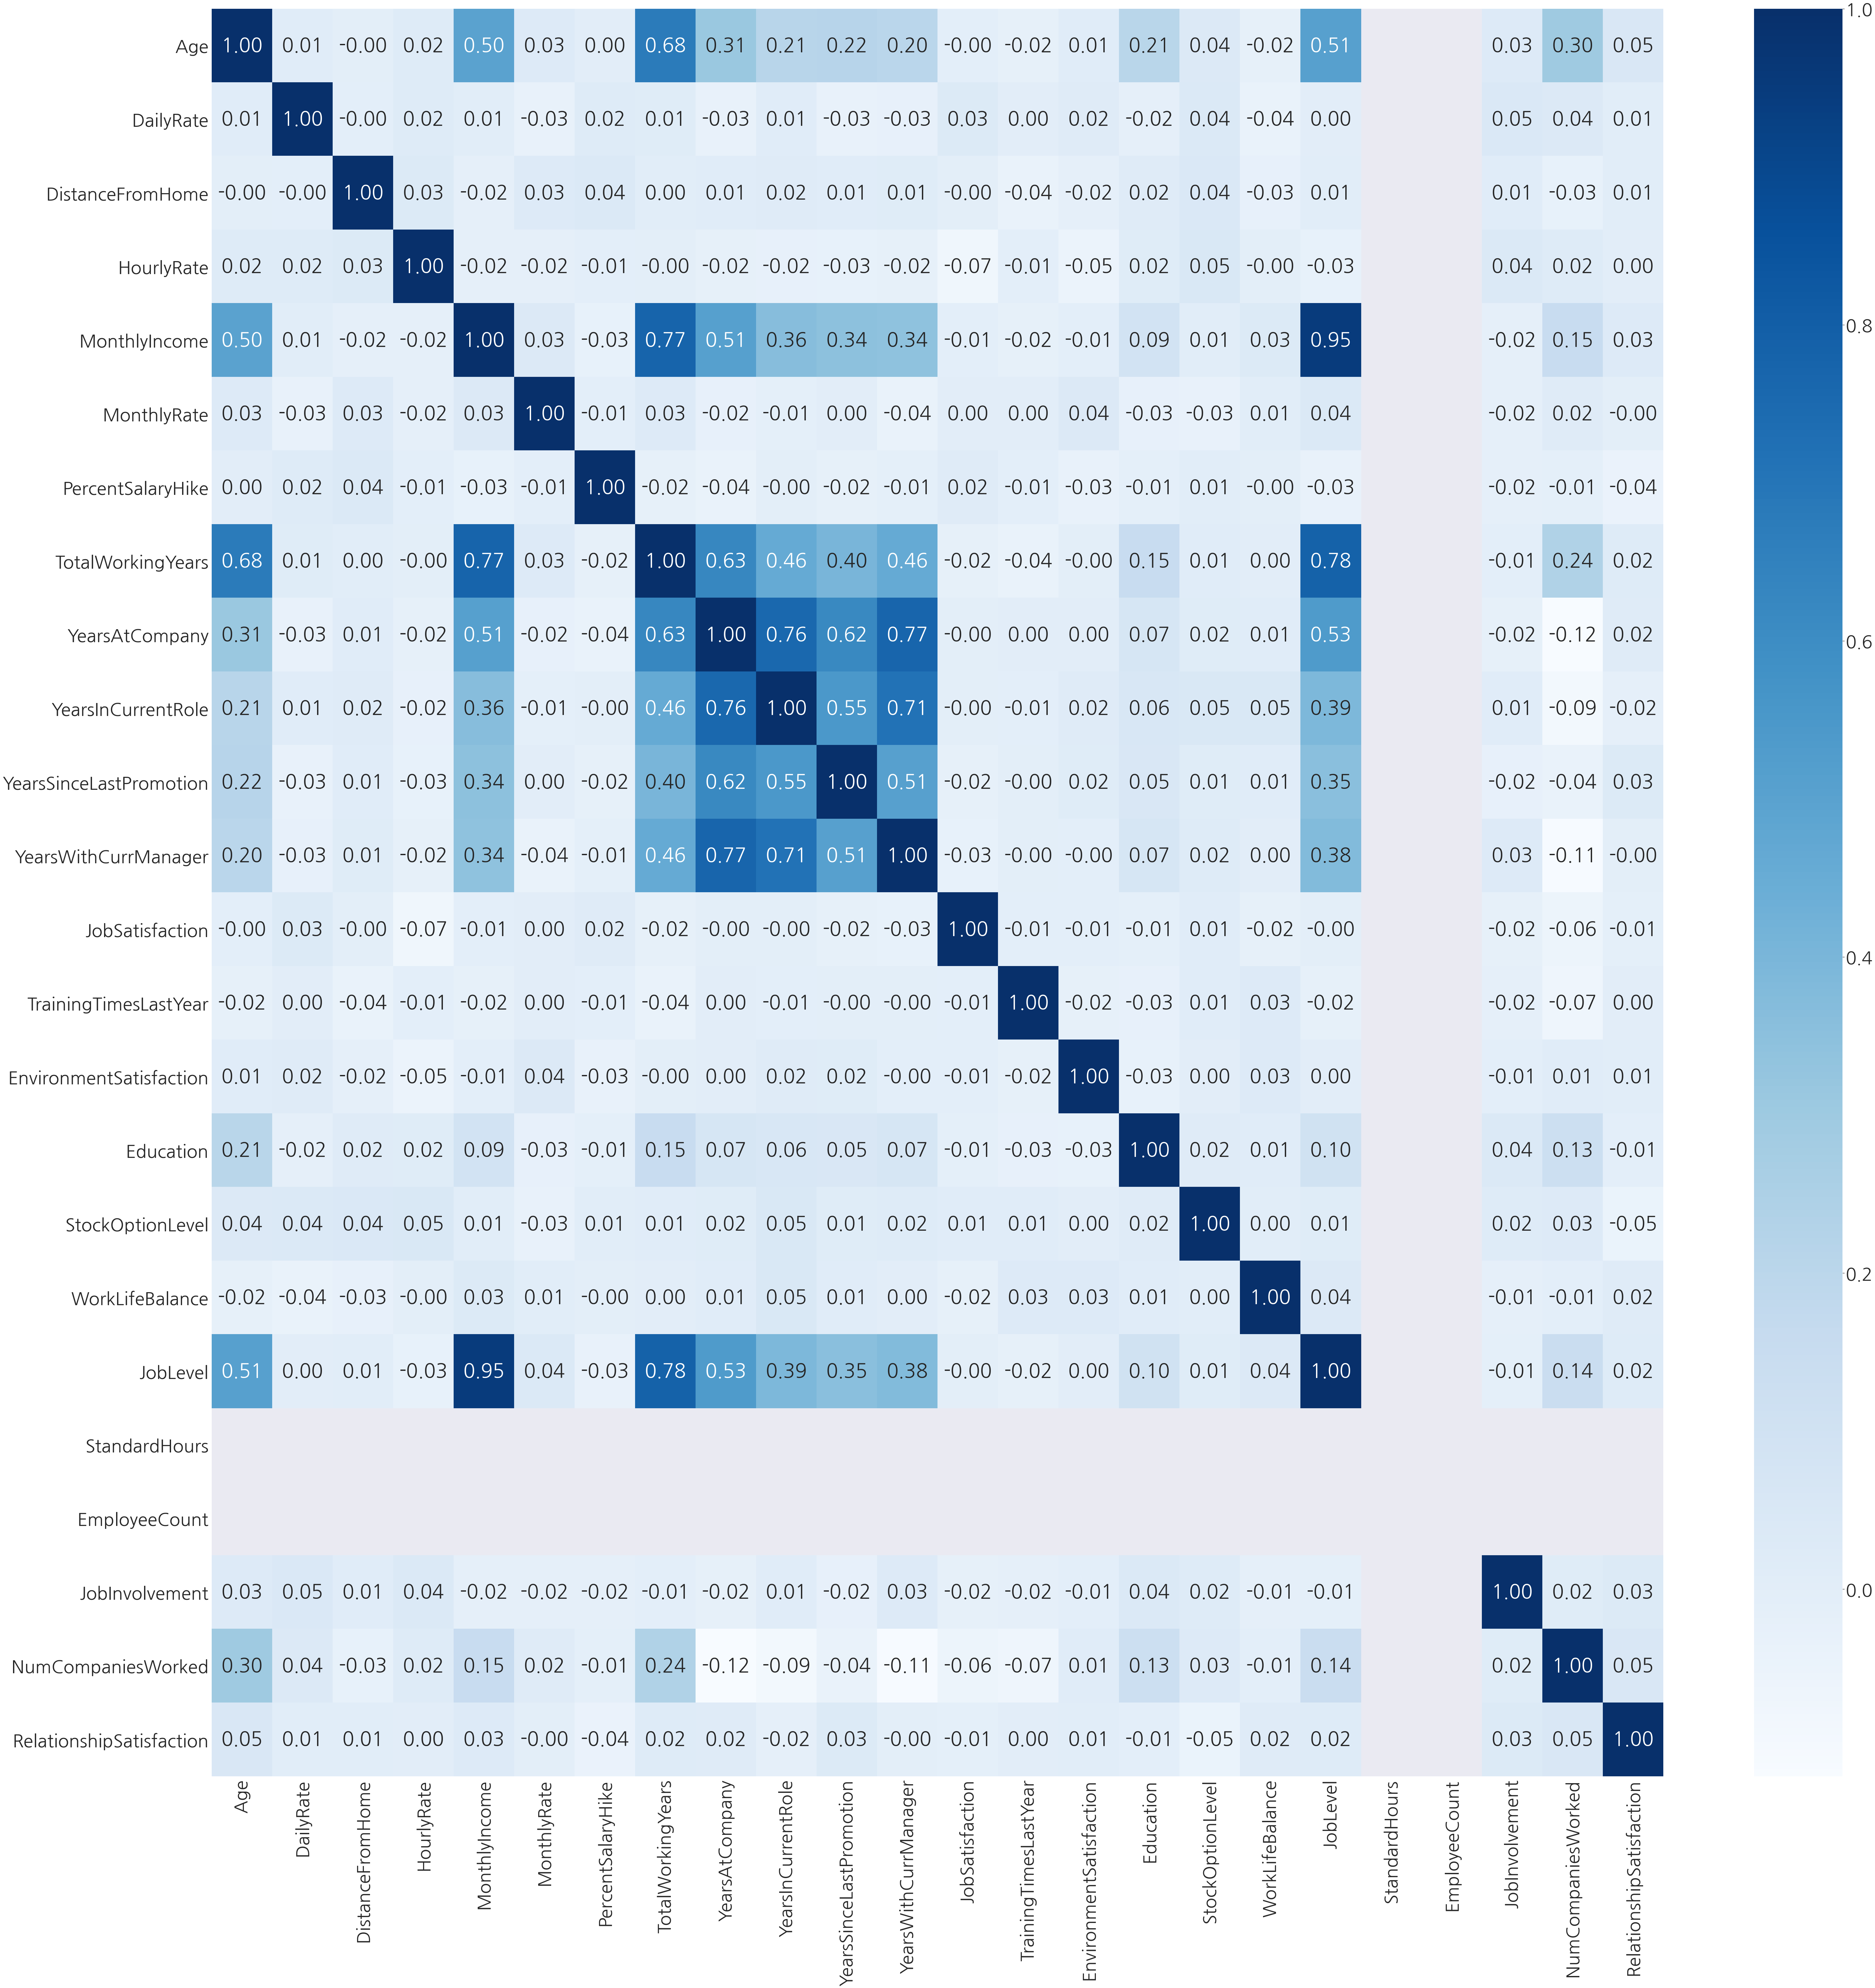

In [189]:
plt.figure(figsize=(100,100))
sns.heatmap(df_corr, annot=True, fmt=".2f",cmap="Blues")

상관계수가 0.7 이상인 변수를 상관관계가 높다고 판단하면 아래 쌍들이 상관관계가 높다고 판단됨.<br><br>
TotalWorkingYears(경력기간),MonthlyIncome(월소득)<br>
JobLevel(업무의 수준), MonthlyIncome(월소득)<br>
JobLevel(업무의 수준), TotalWorkingYears(경력기간)<br>
YearsCurrentRole(현재 역할의 년수), YearsAtCompany(근속연수)<br>
YearsWithCurrManager(현재 관리자와 함께 보낸 시간), YearsAtCompany(근속연수)<br>
YearsWithCurrManager(현재 관리자와 함께 보낸 시간),YearsCurrentRole(현재 역할의 년수)<br>


# 4. 파생변수 생성
상관관계가 높은 변수들을 처리하기 위해 파생변수를 만든다.


#### isChangedRole <br>
: YearsCurrentRole(현재 역할의 년수), YearsAtCompany(근속연수)의 파생변수<br>
현재 역할의 년수와 근속연수의 의미는 비슷하다.
이 둘에서 얻을 수 있는 정보는 둘의 값이 같은지 아닌지에 따라 
중간에 역할이 바뀌었는지, 아니면 현재 회사에 처음 입사한 역할과 계속 같은 일을 하는지를 알 수 있다. 
따라서 역할 변경 유무 카테고리형 변수를 파생변수로 생성하였다.

In [197]:
data[['YearsInCurrentRole','YearsAtCompany']]

YearsInCurrentRole  YearsAtCompany
0                      4               6
1                      7              10
2                      0               0
3                      7               8
4                      2               2
...                  ...             ...
1465                   2               5
1466                   7               7
1467                   2               6
1468                   6               9
1469                   3               4

[1470 rows x 2 columns]

In [199]:
data['isChangedRole'] = [ 1 if x == data.loc[i,'YearsAtCompany'] else 0 for i,x in enumerate(data['YearsInCurrentRole']) ]
data[['YearsInCurrentRole','YearsAtCompany','isChangedRole']]

YearsInCurrentRole  YearsAtCompany  isChangedRole
0                      4               6              0
1                      7              10              0
2                      0               0              1
3                      7               8              0
4                      2               2              1
...                  ...             ...            ...
1465                   2               5              0
1466                   7               7              1
1467                   2               6              0
1468                   6               9              0
1469                   3               4              0

[1470 rows x 3 columns]

In [201]:
data.loc[data['isChangedRole']==1,['YearsInCurrentRole','YearsAtCompany','isChangedRole']]

YearsInCurrentRole  YearsAtCompany  isChangedRole
2                      0               0              1
4                      2               2              1
5                      7               7              1
9                      7               7              1
13                     2               2              1
...                  ...             ...            ...
1429                   7               7              1
1436                   2               2              1
1442                   2               2              1
1455                   2               2              1
1466                   7               7              1

[237 rows x 3 columns]

In [203]:
sns.set()

Text(0.5, 1.0, 'isChangedRole(비율)')

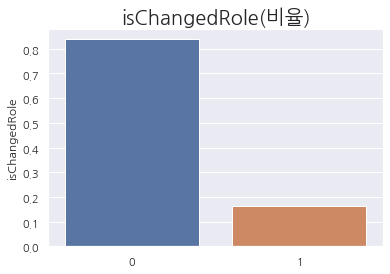

In [206]:
# 비율로 확인
isChangedRole_vc = pd.DataFrame(data['isChangedRole'].value_counts())
isChangedRole_vc
sns.barplot(x= isChangedRole_vc.index, y=isChangedRole_vc['isChangedRole']/sum(isChangedRole_vc['isChangedRole']))
plt.title("isChangedRole(비율)", fontsize=20)